# Design Choices Experiments

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import MaxNLocator, ScalarFormatter

def calculate_rewards(file_path):
    if os.path.exists(file_path):
        rewards_df = pd.read_csv(file_path)
        if len(rewards_df['Reward'])>0:
            mean_reward = rewards_df['Reward'].mean()
            last_reward = rewards_df['Reward'].iloc[-1]
        else:
            mean_reward, last_reward = -2000, -2000
    else:
        mean_reward, last_reward = -2000, -2000
    return mean_reward, last_reward


def process_dataframe(df, data_dir, prefix, mean_threshold):
    reward_data = df['index'].apply(
        lambda index: calculate_rewards(os.path.join(data_dir, f'{prefix}_{index}.csv'))
    ).apply(pd.Series)
    
    reward_data.columns = ['mean_reward', 'last_reward']
    df = pd.concat([df, reward_data], axis=1)
    df = df[df['mean_reward'] >= mean_threshold]
    return df


def process_file(file_path, data_dir, prefix, mean_threshold):
    df = pd.read_csv(file_path)
    if df.empty:
        raise ValueError("The CSV file is empty.")
    if 'index' not in df.columns:
        raise ValueError("index' column is missing from the CSV file.")

    def safe_calculate_rewards(index):
        file_path = os.path.join(data_dir, f'{prefix}_{index}.csv')
        try:
            return calculate_rewards(file_path)
        except Exception as e:
            print(f"Error for index {index}: {e}")
            return (None, None)
    
    rewards = df['index'].apply(safe_calculate_rewards)
    print("Rewards calculated:", rewards.head())

    rewards_df = rewards.apply(pd.Series)
    df[['mean_reward', 'last_reward']] = rewards_df

    
    df = df[df['mean_reward'] >= mean_threshold].sort_values(by='mean_reward', ascending=False)
    df['name'] = "Overall mean"

    quantiles = [0.99, 0.95, 0.9]
    quantile_dfs = []
    names = ["Top 1% mean", "Top 5% mean", "Top 10% mean"]
    for q, name in zip(quantiles, names):
        top_q = df['mean_reward'].quantile(q)
        quantile_df = df[df['mean_reward'] >= top_q]
        quantile_df['name'] = name
        quantile_dfs.append(quantile_df)

    return df, quantile_dfs

def plot_rewards(ax, data_frames, data_dir, prefix):
    for df in data_frames:
        rewards = []
        for index, row in df.iterrows():
            path = os.path.join(data_dir, f'{prefix}_{row["index"]}.csv')
            if not os.path.exists(path):
                print(f"File not found: {path}")
                continue
            rewards_df = pd.read_csv(path)
            rewards.append(rewards_df)
        if len(rewards) > 0:
            combined_df = pd.concat(rewards)
            average_reward = combined_df.groupby('Step')['Reward'].mean()
            rolling_average = average_reward.rolling(window=7).mean()

            ax.plot(rolling_average.index, rolling_average, label=f'{df["name"].values[0]}', linewidth=2)

    ax.grid(True)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True)) 
    ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style='sci', axis='x', scilimits=(4, 4))
    ax.xaxis.set_tick_params(labelsize=10)
    ax.xaxis.set_major_locator(MaxNLocator(prune='both'))  


## Experiment 1

### Experiment-1 : Percentile performance

Rewards calculated: 0    (212.20064821508194, 323.5277811686198)
1    (60.373459688166975, 72.53901799519856)
2    (41.982063955730865, 54.28042348225912)
3    (62.703237939946014, 59.02511978149414)
4     (36.13550410963531, 41.43121751149496)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_64013/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_64013/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_64013/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0    (-237.77101283603247, -107.38054656982422)
1    (-312.71544498867456, -325.41864522298175)
2      (-265.5937437216441, -168.4604975382487)
3     (-236.3115592930052, -134.01832834879556)
4     (-207.7988332145744, -207.86893717447916)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_64013/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_64013/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_64013/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0     (-403.8729952706231, -476.7222188313802)
1                (-461.62408743964306, -500.0)
2                (-446.14528168572315, -500.0)
3    (-402.48159998843545, -448.7777811686198)
4     (-385.5041944715711, -393.8333333333333)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_64013/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_64013/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_64013/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0    (41.70170075363583, 44.697608947753906)
1       (64.487221108135, 74.93162536621094)
2    (53.887179825041024, 61.05735397338867)
3    (41.441672987408104, 46.08416748046875)
4     (68.23051421825703, 87.15740712483723)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_64013/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_64013/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_64013/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0    (-20000.0, -20000.0)
1    (-20000.0, -20000.0)
2    (-20000.0, -20000.0)
3    (-20000.0, -20000.0)
4    (-20000.0, -20000.0)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_64013/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_64013/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_64013/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0    (-391.80431334177655, -385.73333231608075)
1                  (-396.8682674205664, -436.0)
2                 (-441.27862955729165, -500.0)
3      (-422.0705093807644, -430.3333333333333)
4     (-397.76852734883624, -405.2857157389323)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_64013/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_64013/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_64013/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

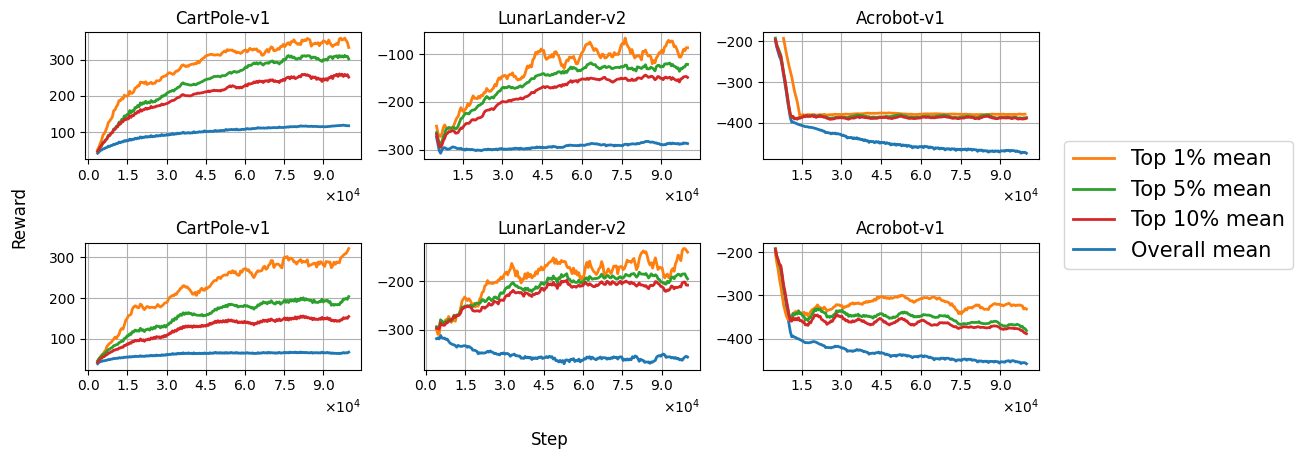

In [4]:

# Process and plot data
file_configs = [
    {'file': '../../data/elbe/cartpole/samples_cartpole_elbe_exp_1.csv', 'data_dir': '../../data/elbe/results/exp_1', 'prefix': 'rewards_random_elbe_cartpole', 'threshold': 0, 'title': 'CartPole-v1'},
    {'file': '../../data/elbe/lunar_lander/samples_lunar_elbe_exp_1.csv', 'data_dir': '../../data/elbe/results/exp_1', 'prefix': 'randsearch_lunar_elbe', 'threshold': -1000, 'title': 'LunarLander-v2'},
    {'file': '../../data/elbe/acrobot/samples_acrobot_elbe_exp_1.csv', 'data_dir': '../../data/elbe/results/exp_1', 'prefix': 'randsearch_acrobot_elbe', 'threshold': -500, 'title': 'Acrobot-v1'},
    {'file': '../../data/minmax/cartpole/samples_cartpole_saddle_exp_1.csv', 'data_dir': '../../data/minmax/results/exp_1', 'prefix': 'randsearch_saddle_cartpole', 'threshold': 0, 'title': 'CartPole-v1'},
    {'file': '../../data/minmax/lunar_lander/samples_lunar_saddle_exp_1.csv', 'data_dir': '../../data/minmax/results/exp_1', 'prefix': 'randsearch_saddle_lunar', 'threshold': -1000, 'title': 'LunarLander-v2'},
    {'file': '../../data/minmax/acrobot/samples_acro_saddle_exp_1.csv', 'data_dir': '../../data/minmax/results/exp_1', 'prefix': 'randsearch_saddle_acro', 'threshold': -500, 'title': 'Acrobot-v1'},
]

fig = plt.figure(figsize=(12, 6))  # Adjust figsize as needed
gs = GridSpec(3, 3, height_ratios=[1, 1, 1], width_ratios=[1, 1, 1])

ax_positions = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]
axes = [fig.add_subplot(gs[pos]) for pos in ax_positions]

all_handles = []
all_labels = []

for config, ax in zip(file_configs, axes):
    df, quantile_dfs = process_file(config['file'], config['data_dir'], config['prefix'], config['threshold'])
    plot_rewards(ax, [df] + quantile_dfs, config['data_dir'], config['prefix'])
    ax.set_title(config['title'])
    
    handles, labels = ax.get_legend_handles_labels()
    all_handles.extend(handles)
    all_labels.extend(labels)

# Set common labels
fig.text(0.43, 0.25, 'Step', ha='center', fontsize=12)
fig.text(-0.02, 0.63, 'Reward', va='center', rotation='vertical', fontsize=12)

# Create ordered legend
unique_labels = ["Top 1% mean", "Top 5% mean", "Top 10% mean", "Overall mean"]
unique_handles = [all_handles[all_labels.index(label)] for label in unique_labels if label in all_labels]

fig.legend(unique_handles, unique_labels, loc='center left', bbox_to_anchor=(0.85, 0.65), fontsize=15)

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust rect to make space for the legend
plt.show()


### Experiment-1: Frequency of parameter choices in top 10% configurations

In [448]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plots_dir = "plots"
os.makedirs(plots_dir, exist_ok=True)

data_frames = []

for config in file_configs:
    df = pd.read_csv(config['file'])
    df = process_dataframe(df, config['data_dir'], config['prefix'], config['threshold'])    
    threshold_value = df['mean_reward'].quantile(0.95)    
    df = df[df['mean_reward'] >= threshold_value]
    data_frames.append({'df': df, 'title': config['title']})

parameters = [
    'total_iterations', 'num_minibatches', 'update_epochs', 
    'alpha', 'policy_lr', 'q_lr', 'anneal_lr', 'q_optimizer', 
    'actor_optimizer', 'average_critics', 'parametrized_sampler',
    'beta'
]

def get_grid_size(parameter):
    if parameter in ['beta', 'parametrized_sampler','sampler_activation', 'sampler_num_hidden_layers', 'sampler_hidden_size', 'sampler_last_layer_std']:
        return 1, 4
    else:
        return 2, 4

# Compute unique values for each parameter across all dataframes
unique_values = {}
for parameter in parameters:
    unique_values[parameter] = sorted(
        pd.concat([df['df'][parameter] for df in data_frames if parameter in df['df'].columns])
        .dropna().unique()
    )

for parameter in parameters:
    rows, cols = get_grid_size(parameter)
    fig, axes = plt.subplots(rows, cols, figsize=(8, 6))

    if rows == 1:
        # Only process the last `cols` data frames
        data_frames_to_plot = data_frames[-(cols-1):]
    else:
        # Process all data frames
        data_frames_to_plot = data_frames

    order = unique_values[parameter]
    all_elbe = []
    all_saddle = []

    for i, data in enumerate(data_frames_to_plot):    
        df = data['df']

        if parameter not in df.columns:
            continue

        if df[parameter].dtype == bool:
            df[parameter] = df[parameter].astype(str)
            order = sorted(df[parameter].unique())
        
        ax = axes[i // (cols-1), i % (cols-1)] if rows > 1 else axes[i % (cols-1)]
        sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
        if rows > 1:
            if i <3:
                all_elbe.append(df[parameter].dropna().reset_index(drop=True))
            else:
                all_saddle.append(df[parameter].dropna().reset_index(drop=True))
        else:
            all_saddle.append(df[parameter].dropna().reset_index(drop=True))

        if rows == 1 or i < cols-1:
            ax.set_title(data['title'])
        
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.tick_params(axis='x', rotation=90)
        
        if i // (cols-1) != rows - 1:
            ax.set_xticklabels([])

    if rows > 1:
        all_elbe = pd.concat(all_elbe)
        ax = axes[0, -1]
        sns.countplot(ax=ax, x=all_elbe, order=order, stat='proportion', legend=False, palette='viridis')
        ax.tick_params(axis='x', rotation=90)
        ax.set_xlabel('')
        ax.set_ylabel('')

    all_saddle = pd.concat(all_saddle)
    ax = axes[-1] if rows == 1 else axes[-1, -1]
    sns.countplot(ax=ax, x=all_saddle,order=order, stat='proportion', legend=False, palette='viridis')
    ax.tick_params(axis='x', rotation=90)
    ax.set_xlabel('')
    ax.set_ylabel('')

    if rows == 1:
        axes[3].set_title('All')
    else:
        axes[0, -1].set_title('All')
        axes[0, -1].set_xticklabels([])

    plt.subplots_adjust(bottom=0.2, wspace=0.4)  
    plt.text(0.5, 0.05, f"{parameter}", ha='center', va='center', transform=fig.transFigure, fontsize=12)  # Text at the bottom center
    plot_filename = os.path.join(plots_dir, f"experiment_1_distribution_plot_{parameter}.png")
    plt.savefig(plot_filename)
    plt.close()


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/717224279.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/717224279.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/717224279.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False`

### Experiment-1: 95th percentile of mean_rewards

In [449]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plots_dir = "plots"
os.makedirs(plots_dir, exist_ok=True)

data_frames = []

for config in file_configs:
    df = pd.read_csv(config['file'])
    df = process_dataframe(df, config['data_dir'], config['prefix'], config['threshold'])
    data_frames.append({'df': df, 'dir': config['data_dir'], 'prefix': config['prefix'], 'title': config['title']})

parameters = [
    'total_iterations', 'num_minibatches', 'update_epochs', 
    'alpha', 'policy_lr', 'q_lr', 'anneal_lr', 'q_optimizer', 
    'actor_optimizer', 'average_critics', 'parametrized_sampler',
    'beta'
]

def get_grid_size(parameter):
    if parameter in ['beta', 'parametrized_sampler','sampler_activation', 'sampler_num_hidden_layers', 'sampler_hidden_size', 'sampler_last_layer_std']:
        return 1, 3
    else:
        return 2, 3

# Compute unique values for each parameter across all dataframes
unique_values = {}
for parameter in parameters:
    unique_values[parameter] = sorted(
        pd.concat([df['df'][parameter] for df in data_frames if parameter in df['df'].columns])
        .dropna().unique()
    )


for parameter in parameters:
    rows, cols = get_grid_size(parameter)
    fig, axes = plt.subplots(rows, cols, figsize=(6, 6))

    if rows == 1:
        data_frames_to_plot = data_frames[-(cols):]
    else:
        data_frames_to_plot = data_frames

    order = unique_values[parameter]
    all_elbe = []
    all_saddle = []
    
    for i, data in enumerate(data_frames_to_plot):
        df = data['df']

        if parameter not in df.columns:
            continue

        if df[parameter].dtype == bool:
            df[parameter] = df[parameter].astype(str)
        ax = axes[i // cols, i % (cols)] if rows > 1 else axes[i % (cols)]

        parameter_percentile = df.groupby(parameter)['mean_reward'].quantile(0.95).reset_index()
        sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
        ax.tick_params(axis='x', rotation=90)

        ax.set_xlabel('')
        ax.set_ylabel('')
        if i // (cols) != rows-1:
            ax.set_xticklabels([])

        if rows == 1 or i < cols:
            ax.set_title(data['title'])
            
    if rows == 1:
        axes[1].set_xlabel(parameter, fontsize=12)
    else:
        axes[1, 1].set_xlabel(parameter, fontsize=12)

    plt.tight_layout()
    plot_filename = os.path.join(plots_dir, f"experiment_1_95th_percentile_{parameter}.png")
    plt.savefig(plot_filename)
    plt.close()


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2952171228.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2952171228.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2952171228.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.

### Experiment-1: Conditional 95th percentile

In [454]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plots_dir = "plots"
os.makedirs(plots_dir, exist_ok=True)

data_frames = []

for config in file_configs:
    df = pd.read_csv(config['file'])
    df = process_dataframe(df, config['data_dir'], config['prefix'], config['threshold'])
    data_frames.append({'df': df, 'dir': config['data_dir'], 'prefix': config['prefix'], 'title': config['title']})

parameters = [
    'total_iterations', 'num_minibatches', 'update_epochs', 
    'alpha', 'policy_lr', 'q_lr', 'anneal_lr', 'q_optimizer', 
    'actor_optimizer', 'average_critics', 'parametrized_sampler',
    'beta'
]

def get_grid_size(parameter):
    if parameter in ['beta', 'parametrized_sampler','sampler_activation', 'sampler_num_hidden_layers', 'sampler_hidden_size', 'sampler_last_layer_std']:
        return 1, 3
    else:
        return 2, 3

# Compute unique values for each parameter across all dataframes
unique_values = {}
for parameter in parameters:
    unique_values[parameter] = sorted(
        pd.concat([df['df'][parameter] for df in data_frames if parameter in df['df'].columns])
        .dropna().unique()
    )


for parameter in parameters:
    rows, cols = get_grid_size(parameter)
    fig, axes = plt.subplots(rows, cols, figsize=(6, 6))

    if rows == 1:
        data_frames_to_plot = data_frames[-(cols):]
    else:
        data_frames_to_plot = data_frames

    order = unique_values[parameter]
    all_elbe = []
    all_saddle = []
    
    for i, data in enumerate(data_frames_to_plot):
        df = data['df']

        if parameter not in df.columns:
            print(f"Parameter {parameter} not in dataframe")
            continue

        if df[parameter].dtype == bool and parameter != 'parametrized_sampler':
            df[parameter] = df[parameter].astype(str)
        if 'parametrized_sampler' in df.columns:
            df = df[df['parametrized_sampler'] == False]
        ax = axes[i // cols, i % (cols)] if rows > 1 else axes[i % (cols)]

        parameter_percentile = df.groupby(parameter)['mean_reward'].quantile(0.95).reset_index()
        sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
        ax.tick_params(axis='x', rotation=90)

        ax.set_xlabel('')
        ax.set_ylabel('')
        if i // (cols) != rows-1:
            ax.set_xticklabels([])

        if rows == 1 or i < cols:
            ax.set_title(data['title'])
            
    if rows == 1:
        axes[1].set_xlabel(parameter, fontsize=12)
    else:
        axes[1, 1].set_xlabel(parameter, fontsize=12)

    plt.tight_layout()
    plot_filename = os.path.join(plots_dir, f"experiment_1_95th_percentile_{parameter}_param_False.png")
    plt.savefig(plot_filename)
    plt.close()

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2719677708.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2719677708.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2719677708.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.

### Experiment-1: Parameter Distributions

In [403]:
data_frames = []

for config in file_configs:
    df = pd.read_csv(config['file'])
    df = process_dataframe(df, config['data_dir'], config['prefix'], config['threshold'])
    data_frames.append({'df': df, 'dir': config['data_dir'], 'prefix': config['prefix'], 'title': config['title']})

# Parameters to plot
parameters = [
    'total_iterations', 'num_minibatches', 'update_epochs', 
    'alpha', 'policy_lr', 'q_lr', 'anneal_lr', 'q_optimizer', 
    'actor_optimizer', 'average_critics', 'parametrized_sampler',
    'beta'
]

def get_grid_size(parameter):
    if parameter in ['parametrized_sampler','sampler_activation', 'sampler_num_hidden_layers', 'sampler_hidden_size', 'sampler_last_layer_std', 'beta']:
        return 1, 3 
    else:
        return 2, 3

for parameter in parameters:
    rows, cols = get_grid_size(parameter)
    fig, axes = plt.subplots(rows, cols, figsize=(6, 6))
    norm_dfs = []

    if rows == 1:
        data_frames_to_plot = data_frames[-cols:]
    else:
        data_frames_to_plot = data_frames

    for i, data in enumerate(data_frames_to_plot):
        df = data['df']
        if parameter not in df.columns:
            continue
        
        parameter_values = sorted(df[parameter].unique())
        if df[parameter].dtype == bool:
            df[parameter] = df[parameter].astype(str)
            parameter_values = sorted(df[parameter].unique())

        all_reward_distributions = []

        for value in parameter_values:
            subset_df = df[df[parameter] == value]

            reward_distributions = []

            for index, row in subset_df.iterrows():
                csv_path = os.path.join(data['dir'], f'{data["prefix"]}_{row["index"]}.csv')
                if os.path.exists(csv_path):
                    rewards = pd.read_csv(csv_path)
                    reward_distributions.append(rewards['Reward'].values.flatten())
                else:
                    print(f"File not found: {csv_path}")

            reward_distributions = [item for sublist in reward_distributions for item in sublist]
            all_reward_distributions.append(reward_distributions)
        
        all_reward_distributions_normalized = []

        if rows == 1:
            ax = axes[i % cols]
        else:
            ax = axes[i // cols, i % cols]

        box_plot = sns.boxplot(data=pd.DataFrame(all_reward_distributions, index=parameter_values).T.dropna(), ax=ax, palette='viridis', showfliers=False, boxprops=dict(edgecolor='none'))
        
        if rows == 1 or i < cols:
            ax.set_title(data['title'])
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.xaxis.set_tick_params(rotation=90)
    
    if rows == 1:
        axes[1].set_xlabel(parameter, fontsize=12)
    else:
        axes[1, 1].set_xlabel(parameter, fontsize=12)

    fig.text(0.5, -0.04, parameter, ha='center', fontsize=12)
    plt.xticks(rotation=90)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plot_filename = os.path.join(plots_dir, f"experiment_1_boxplot_{parameter}.png")
    plt.savefig(plot_filename)
    plt.close()

### Best Runs

In [404]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Consolidated function to calculate mean and last reward from a CSV file
fig = plt.figure(figsize=(32, 10))  # Adjust figsize as needed
gs = GridSpec(3, 3, height_ratios=[1, 1, 1], width_ratios=[1, 1, 1])

ax_positions = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]
axes = [fig.add_subplot(gs[pos]) for pos in ax_positions]

all_handles = []
all_labels = []

for config, ax in zip(file_configs, axes):
    df, _ = process_file(config['file'], config['data_dir'], config['prefix'], config['threshold'])
    # Identify the top 5 configurations based on the highest mean rewards
    top_5_runs = df.nlargest(5, 'last_reward')

    # Initialize the plot
    plt.figure(figsize=(8, 4))

    # Iterate through each of the top 5 configurations and plot their reward curves
    for _, row in top_5_runs.iterrows():
        path = os.path.join('./' + config['data_dir'], f"{config['prefix']}_{row['index']}.csv")
        if not os.path.exists(path):
            print(f"File not found: {path}")
            continue
        rewards_df = pd.read_csv(path)
        
        # Calculate average reward and rolling average reward
        average_reward = rewards_df.groupby('Step')['Reward'].mean()
        rolling_average = average_reward.rolling(window=5).mean()
        
        # Plot the reward curves
        ax.plot(rolling_average.index, rolling_average, label=f'Index {row["index"]} -Reward {row["last_reward"]:.2f}', linewidth=2)
        ax.set_title(config['title'])
        ax.grid(True)
        ax.legend()
fig.text(0.43, 0.25, 'Step', ha='center', fontsize=12)
fig.text(0.04, 0.63, 'Reward', va='center', rotation='vertical', fontsize=12)

plt.show()


Rewards calculated: 0    (212.20064821508194, 323.5277811686198)
1    (60.373459688166975, 72.53901799519856)
2    (41.982063955730865, 54.28042348225912)
3    (62.703237939946014, 59.02511978149414)
4     (36.13550410963531, 41.43121751149496)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0    (-237.77101283603247, -107.38054656982422)
1    (-312.71544498867456, -325.41864522298175)
2      (-265.5937437216441, -168.4604975382487)
3     (-236.3115592930052, -134.01832834879556)
4     (-207.7988332145744, -207.86893717447916)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0     (-403.8729952706231, -476.7222188313802)
1                (-461.62408743964306, -500.0)
2                (-446.14528168572315, -500.0)
3    (-402.48159998843545, -448.7777811686198)
4     (-385.5041944715711, -393.8333333333333)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0    (41.70170075363583, 44.697608947753906)
1       (64.487221108135, 74.93162536621094)
2    (53.887179825041024, 61.05735397338867)
3    (41.441672987408104, 46.08416748046875)
4     (68.23051421825703, 87.15740712483723)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0    (-20000.0, -20000.0)
1    (-20000.0, -20000.0)
2    (-20000.0, -20000.0)
3    (-20000.0, -20000.0)
4    (-20000.0, -20000.0)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0    (-391.80431334177655, -385.73333231608075)
1                  (-396.8682674205664, -436.0)
2                 (-441.27862955729165, -500.0)
3      (-422.0705093807644, -430.3333333333333)
4     (-397.76852734883624, -405.2857157389323)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

## Experiment 2

### Experiment-2 : Percentile performance

Rewards calculated: 0    (125.62288331740942, 174.59999974568686)
1                              (-2000, -2000)
2    (20.933508582808013, 19.926406542460125)
3     (47.87528741461598, 44.377991358439125)
4      (70.08305094955313, 66.14141337076823)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0    (-228.76213777679763, -223.61372884114584)
1    (-181.23144486679655, -156.86221822102866)
2     (-307.56667710661475, -287.9695180257161)
3      (-372.3221502140215, -345.4140268961589)
4      (-495.6299973845072, -551.7626037597656)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0                (-443.85515002927923, -500.0)
1                 (-441.1320221113122, -500.0)
2                 (-437.6610859462193, -476.0)
3    (-290.73201531834076, -290.1428578694661)
4                 (-483.3184614915114, -500.0)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0    (62.88433312799176, 53.372222900390625)
1      (54.7177580173199, 65.83501688639323)
2    (155.25567800896798, 226.1217943827311)
3       (74.03600489380014, 55.211532274882)
4                             (-2000, -2000)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0    (-280.05994296073914, -315.7909901936849)
1     (-292.9851359261407, -308.9221928914388)
2     (-360.9876232147217, -351.6851094563802)
3     (-572.9621821509468, -533.9304656982422)
4                               (-2000, -2000)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0    (-412.05749660068085, -483.4000040690104)
1                  (-413.071420457628, -430.5)
2    (-378.19569969177246, -348.8008677164714)
3    (-422.35636700524225, -436.8333333333333)
4                 (-349.8662684758504, -415.5)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

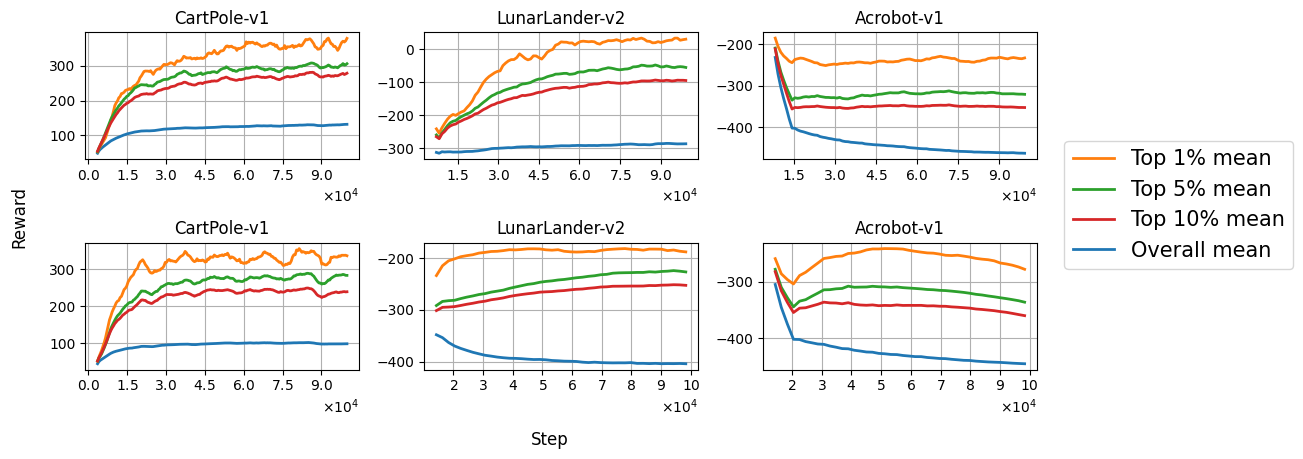

In [405]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Process and plot data
file_configs = [
    {'file': './data_2/samples_cartpole_elbe_exp_2.csv', 'data_dir': 'data_samples_cartpole_elbe_exp_2', 'prefix': 'randsearch_samples_cartpole_elbe_exp_2', 'threshold': 0, 'title': 'CartPole-v1'},
    {'file': './data_2/samples_lunar_elbe_exp_2.csv', 'data_dir': 'data_samples_lunar_elbe_exp_2', 'prefix': 'randsearch_samples_lunar_elbe_exp_2', 'threshold': -1000, 'title': 'LunarLander-v2'},
    {'file': './data_2/samples_acro_elbe_exp_2.csv', 'data_dir': 'data_samples_acro_elbe_exp_2', 'prefix': 'randsearch_samples_acro_elbe_exp_2', 'threshold': -500, 'title': 'Acrobot-v1'},
    {'file': './data_2/samples_cartpole_saddle_exp_2.csv', 'data_dir': 'data_samples_cartpole_saddle_exp_2', 'prefix': 'randsearch_samples_cartpole_saddle_exp_2', 'threshold': 0, 'title': 'CartPole-v1'},
    {'file': './data_2/samples_lunar_saddle_exp_2.csv', 'data_dir': 'data_samples_lunar_saddle_exp_2', 'prefix': 'randsearch_samples_lunar_saddle_exp_2', 'threshold': -1000, 'title': 'LunarLander-v2'},
    {'file': './data_2/samples_acro_saddle_exp_2.csv', 'data_dir': 'data_samples_acro_saddle_exp_2', 'prefix': 'randsearch_samples_acro_saddle_exp_2', 'threshold': -500, 'title': 'Acrobot-v1'},

]

fig = plt.figure(figsize=(12, 6))  # Adjust figsize as needed
gs = GridSpec(3, 3, height_ratios=[1, 1, 1], width_ratios=[1, 1, 1])

ax_positions = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]
axes = [fig.add_subplot(gs[pos]) for pos in ax_positions]

all_handles = []
all_labels = []

for config, ax in zip(file_configs, axes):
    df, quantile_dfs = process_file(config['file'], config['data_dir'], config['prefix'], config['threshold'])
    plot_rewards(ax, [df] + quantile_dfs, config['data_dir'], config['prefix'])
    ax.set_title(config['title'])
    
    handles, labels = ax.get_legend_handles_labels()
    all_handles.extend(handles)
    all_labels.extend(labels)

# Set common labels
fig.text(0.43, 0.25, 'Step', ha='center', fontsize=12)
fig.text(-0.02, 0.63, 'Reward', va='center', rotation='vertical', fontsize=12)

# Create ordered legend
unique_labels = ["Top 1% mean", "Top 5% mean", "Top 10% mean", "Overall mean"]
unique_handles = [all_handles[all_labels.index(label)] for label in unique_labels if label in all_labels]

fig.legend(unique_handles, unique_labels, loc='center left', bbox_to_anchor=(0.85, 0.65), fontsize=15)

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust rect to make space for the legend
plt.show()

### Experiment-2: Frequency of parameter choices in top 10% configurations

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/82430694.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/82430694.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/82430694.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` fo

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/82430694.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/82430694.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/82430694.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` fo

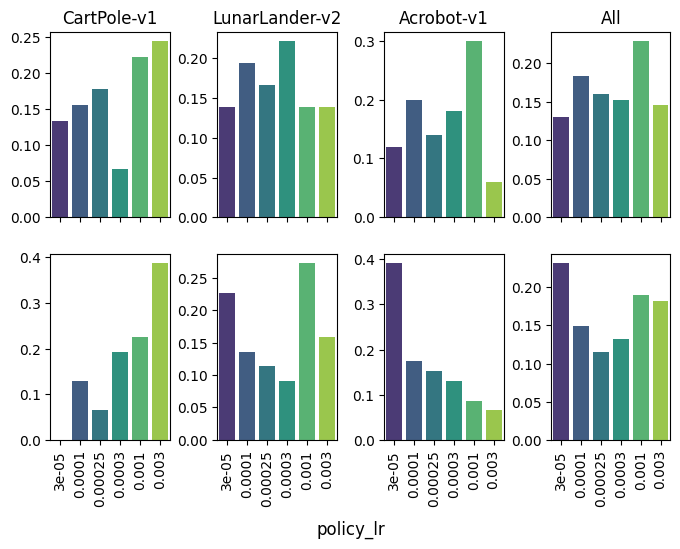

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/82430694.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/82430694.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/82430694.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` fo

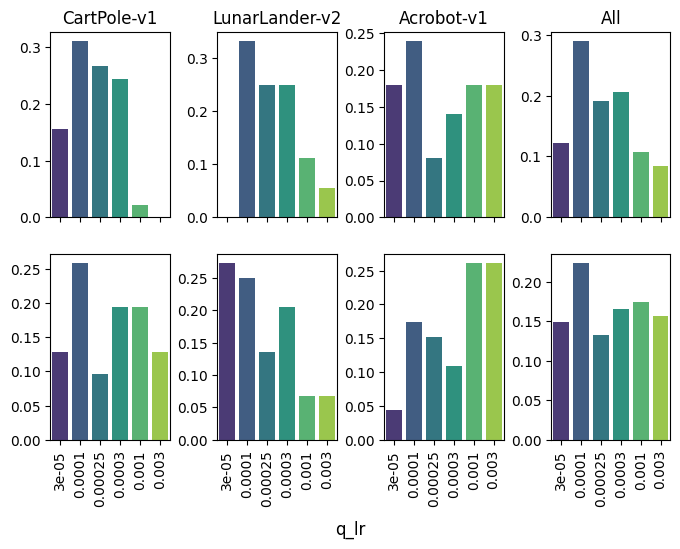

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/82430694.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/82430694.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/82430694.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` fo

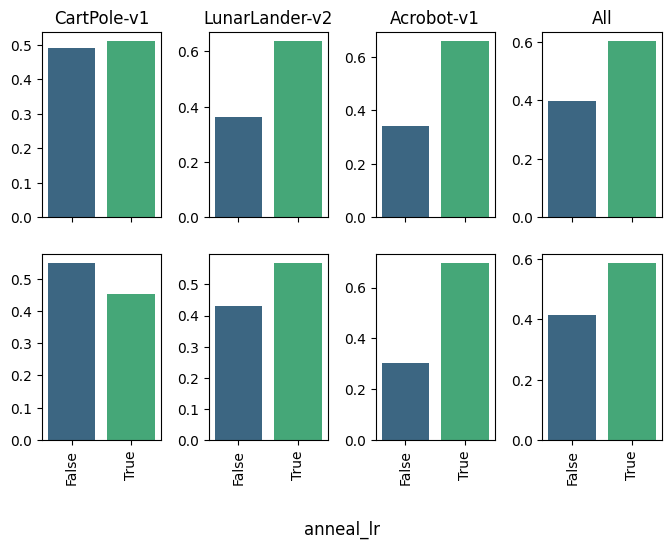

36    False
64    False
68    False
80     True
88    False
Name: average_critics, dtype: bool
77     False
89     False
105     True
124    False
205     True
Name: average_critics, dtype: bool
3      True
67    False
71    False
85     True
96    False
Name: average_critics, dtype: bool
5       True
24      True
41     False
70     False
167     True
Name: average_critics, dtype: bool
0      False
28      True
72     False
101     True
139    False
Name: average_critics, dtype: bool
11      True
65     False
82      True
95     False
114    False
Name: average_critics, dtype: bool


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/82430694.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/82430694.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/82430694.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` fo

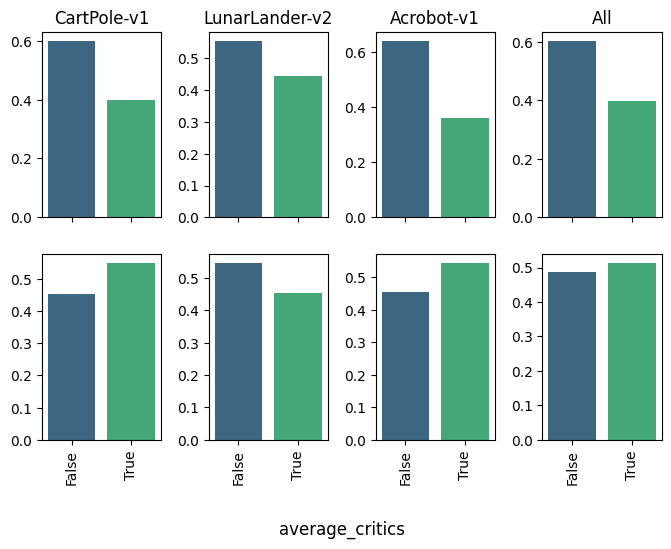

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/82430694.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/82430694.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/82430694.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` fo

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/82430694.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/82430694.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/82430694.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` fo

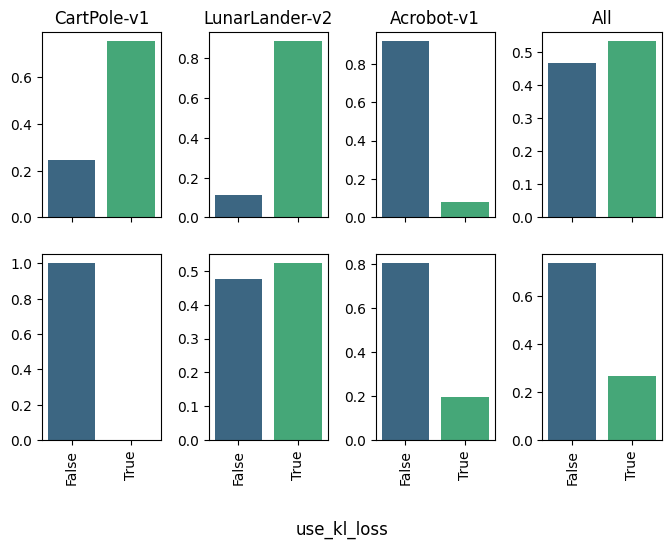

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/82430694.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/82430694.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/82430694.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` fo

In [406]:
data_frames = []

for config in file_configs:
    df = pd.read_csv(config['file'])
    df = process_dataframe(df, config['data_dir'], config['prefix'], config['threshold'])    
    threshold_value = df['mean_reward'].quantile(0.95)    
    df = df[df['mean_reward'] >= threshold_value]
    data_frames.append({'df': df, 'title': config['title']})

# Parameters to plot
parameters = [
    'alpha', 'policy_lr', 'q_lr', 'anneal_lr', 
    'average_critics', 'parametrized_sampler',
    'use_kl_loss', 'beta'
]

def get_grid_size(parameter):
    if parameter in ['beta', 'parametrized_sampler','sampler_activation', 'sampler_num_hidden_layers', 'sampler_hidden_size', 'sampler_last_layer_std']:
        return 1, 4
    else:
        return 2, 4

# Compute unique values for each parameter across all dataframes
unique_values = {}
for parameter in parameters:
    unique_values[parameter] = sorted(
        pd.concat([df['df'][parameter] for df in data_frames if parameter in df['df'].columns])
        .dropna().unique()
    )

for parameter in parameters:
    rows, cols = get_grid_size(parameter)
    fig, axes = plt.subplots(rows, cols, figsize=(8, 6))

    if rows == 1:
        data_frames_to_plot = data_frames[-(cols-1):]
    else:
        data_frames_to_plot = data_frames

    order = unique_values[parameter]
    all_elbe = []
    all_saddle = []
    
    for i, data in enumerate(data_frames_to_plot):    
        df = data['df']

        # if df[parameter].dtype == bool:
        #     df[parameter] = df[parameter].astype(str)
        if parameter not in df.columns:
            print(f"Parameter {parameter} not found")
            continue
            
        if parameter == 'average_critics':
            print(df[parameter].head())
        

            
        ax = axes[i // (cols-1), i % (cols-1)] if rows > 1 else axes[i % (cols-1)]
        df[parameter] = pd.Categorical(df[parameter], categories=order)
        sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
        if rows > 1:
            if i <3:
                all_elbe.append(df[parameter].dropna().reset_index(drop=True))
            else:
                all_saddle.append(df[parameter].dropna().reset_index(drop=True))
        else:
            all_saddle.append(df[parameter].dropna().reset_index(drop=True))

        if rows == 1 or i < cols-1:
            ax.set_title(data['title'])
        
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.tick_params(axis='x', rotation=90)
        
        if i // (cols-1) != rows - 1:
            ax.set_xticklabels([])

    if rows > 1:
        all_elbe = pd.concat(all_elbe)
        ax = axes[0, -1]
        sns.countplot(ax=ax, x=all_elbe, order=order, stat='proportion', legend=False, palette='viridis')
        ax.tick_params(axis='x', rotation=90)
        ax.set_xlabel('')
        ax.set_ylabel('')

    all_saddle = pd.concat(all_saddle)
    ax = axes[-1] if rows == 1 else axes[-1, -1]
    sns.countplot(ax=ax, x=all_saddle,order=order, stat='proportion', legend=False, palette='viridis')
    ax.tick_params(axis='x', rotation=90)
    ax.set_xlabel('')
    ax.set_ylabel('')

    if rows == 1:
        axes[3].set_title('All')
    else:
        axes[0, -1].set_title('All')
        axes[0, -1].set_xticklabels([])

    plt.subplots_adjust(bottom=0.2, wspace=0.4)  
    plt.text(0.5, 0.05, f"{parameter}", ha='center', va='center', transform=fig.transFigure, fontsize=12)  # Text at the bottom center
    plot_filename = os.path.join(plots_dir, f"experiment_2_distribution_plot_{parameter}.png")
    plt.savefig(plot_filename)
    plt.show()
    plt.close()

### Experiment-2: 95th percentile of mean_rewards

In [407]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plots_dir = "plots"
os.makedirs(plots_dir, exist_ok=True)

data_frames = []

for config in file_configs:
    df = pd.read_csv(config['file'])
    df = process_dataframe(df, config['data_dir'], config['prefix'], config['threshold'])
    data_frames.append({'df': df, 'dir': config['data_dir'], 'prefix': config['prefix'], 'title': config['title']})

parameters = [
    'alpha', 'policy_lr', 'q_lr', 'anneal_lr', 
    'average_critics', 'parametrized_sampler',
    'use_kl_loss', 'beta'
]

def get_grid_size(parameter):
    if parameter in ['beta', 'parametrized_sampler','sampler_activation', 'sampler_num_hidden_layers', 'sampler_hidden_size', 'sampler_last_layer_std']:
        return 1, 3
    else:
        return 2, 3

unique_values = {}
for parameter in parameters:
    unique_values[parameter] = sorted(
        pd.concat([df['df'][parameter] for df in data_frames if parameter in df['df'].columns])
        .dropna().unique()
    )

for parameter in parameters:
    rows, cols = get_grid_size(parameter)
    fig, axes = plt.subplots(rows, cols, figsize=(6, 6))

    if rows == 1:
        data_frames_to_plot = data_frames[-(cols):]
    else:
        data_frames_to_plot = data_frames

    order = unique_values[parameter]
    all_elbe = []
    all_saddle = []
    
    for i, data in enumerate(data_frames_to_plot):
        df = data['df']

        if parameter not in df.columns:
            continue
        
        if df[parameter].dtype == bool:
            df[parameter] = df[parameter].astype(str)
        ax = axes[i // cols, i % (cols)] if rows > 1 else axes[i % (cols)]

        parameter_percentile = df.groupby(parameter)['mean_reward'].quantile(0.95).reset_index()
        sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
        ax.tick_params(axis='x', rotation=90)

        ax.set_xlabel('')
        ax.set_ylabel('')
        if i // (cols) != rows-1:
            ax.set_xticklabels([])

        if rows == 1 or i < cols:
            ax.set_title(data['title'])
            
    if rows == 1:
        axes[1].set_xlabel(parameter, fontsize=12)
    else:
        axes[1, 1].set_xlabel(parameter, fontsize=12)

    plt.tight_layout()
    plot_filename = os.path.join(plots_dir, f"experiment_2_95th_percentile_{parameter}.png")
    plt.savefig(plot_filename)
    plt.close()


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2022623206.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2022623206.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2022623206.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.

### Experiment-2: Conditional 95th percentile

In [408]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plots_dir = "plots"
os.makedirs(plots_dir, exist_ok=True)

data_frames = []

for config in file_configs:
    df = pd.read_csv(config['file'])
    df = process_dataframe(df, config['data_dir'], config['prefix'], config['threshold'])
    data_frames.append({'df': df, 'dir': config['data_dir'], 'prefix': config['prefix'], 'title': config['title']})

parameters = [
    'alpha', 'policy_lr', 'q_lr', 'anneal_lr', 
    'average_critics', 'parametrized_sampler',
    'use_kl_loss', 'beta'
]

def get_grid_size(parameter):
    if parameter in ['beta', 'parametrized_sampler','sampler_activation', 'sampler_num_hidden_layers', 'sampler_hidden_size', 'sampler_last_layer_std']:
        return 1, 3
    else:
        return 2, 3

unique_values = {}
for parameter in parameters:
    unique_values[parameter] = sorted(
        pd.concat([df['df'][parameter] for df in data_frames if parameter in df['df'].columns])
        .dropna().unique()
    )


for parameter in parameters:
    rows, cols = get_grid_size(parameter)
    fig, axes = plt.subplots(rows, cols, figsize=(6, 6))

    if rows == 1:
        data_frames_to_plot = data_frames[-(cols):]
    else:
        data_frames_to_plot = data_frames

    order = unique_values[parameter]
    all_elbe = []
    all_saddle = []
    
    for i, data in enumerate(data_frames_to_plot):
        df = data['df']

        if parameter not in df.columns:
            continue
        if df[parameter].dtype == bool and parameter != 'use_kl_loss':
            df[parameter] = df[parameter].astype(str)

        df = df[df['use_kl_loss'] == True]
 
        ax = axes[i // cols, i % (cols)] if rows > 1 else axes[i % (cols)]

        parameter_percentile = df.groupby(parameter)['mean_reward'].quantile(0.95).reset_index()
        sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
        ax.tick_params(axis='x', rotation=90)

        ax.set_xlabel('')
        ax.set_ylabel('')
        if i // (cols) != rows-1:
            ax.set_xticklabels([])

        if rows == 1 or i < cols:
            ax.set_title(data['title'])
            
    if rows == 1:
        axes[1].set_xlabel(parameter, fontsize=12)
    else:
        axes[1, 1].set_xlabel(parameter, fontsize=12)
    
    plt.tight_layout()
    plot_filename = os.path.join(plots_dir, f"experiment_2_95th_percentile_{parameter}_kl_True.png")
    plt.savefig(plot_filename)
    plt.close()


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2968471673.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2968471673.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2968471673.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.

In [409]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plots_dir = "plots"
os.makedirs(plots_dir, exist_ok=True)

data_frames = []

for config in file_configs:
    df = pd.read_csv(config['file'])
    df = process_dataframe(df, config['data_dir'], config['prefix'], config['threshold'])
    data_frames.append({'df': df, 'dir': config['data_dir'], 'prefix': config['prefix'], 'title': config['title']})

parameters = [
    'alpha', 'policy_lr', 'q_lr', 'anneal_lr', 
    'average_critics', 'parametrized_sampler',
    'use_kl_loss', 'beta'
]

def get_grid_size(parameter):
    if parameter in ['beta', 'parametrized_sampler','sampler_activation', 'sampler_num_hidden_layers', 'sampler_hidden_size', 'sampler_last_layer_std']:
        return 1, 3
    else:
        return 2, 3

unique_values = {}
for parameter in parameters:
    unique_values[parameter] = sorted(
        pd.concat([df['df'][parameter] for df in data_frames if parameter in df['df'].columns])
        .dropna().unique()
    )


for parameter in parameters:
    rows, cols = get_grid_size(parameter)
    fig, axes = plt.subplots(rows, cols, figsize=(6, 6))

    if rows == 1:
        data_frames_to_plot = data_frames[-(cols):]
    else:
        data_frames_to_plot = data_frames

    order = unique_values[parameter]
    all_elbe = []
    all_saddle = []
    
    for i, data in enumerate(data_frames_to_plot):
        df = data['df']

        if parameter not in df.columns:
            continue
        if df[parameter].dtype == bool and parameter != 'use_kl_loss':
            df[parameter] = df[parameter].astype(str)

        df = df[df['use_kl_loss'] == False]
 
        ax = axes[i // cols, i % (cols)] if rows > 1 else axes[i % (cols)]

        parameter_percentile = df.groupby(parameter)['mean_reward'].quantile(0.95).reset_index()
        sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
        ax.tick_params(axis='x', rotation=90)

        ax.set_xlabel('')
        ax.set_ylabel('')
        if i // (cols) != rows-1:
            ax.set_xticklabels([])

        if rows == 1 or i < cols:
            ax.set_title(data['title'])
            
    if rows == 1:
        axes[1].set_xlabel(parameter, fontsize=12)
    else:
        axes[1, 1].set_xlabel(parameter, fontsize=12)
    
    plt.tight_layout()
    plot_filename = os.path.join(plots_dir, f"experiment_2_95th_percentile_{parameter}_kl_False.png")
    plt.savefig(plot_filename)
    plt.close()


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/3723611856.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/3723611856.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/3723611856.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.

In [410]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plots_dir = "plots"
os.makedirs(plots_dir, exist_ok=True)

data_frames = []

for config in file_configs:
    df = pd.read_csv(config['file'])
    df = process_dataframe(df, config['data_dir'], config['prefix'], config['threshold'])
    data_frames.append({'df': df, 'dir': config['data_dir'], 'prefix': config['prefix'], 'title': config['title']})

parameters = [
    'alpha', 'policy_lr', 'q_lr', 'anneal_lr', 
    'average_critics', 'parametrized_sampler',
    'use_kl_loss', 'beta'
]

def get_grid_size(parameter):
    if parameter in ['beta', 'parametrized_sampler','sampler_activation', 'sampler_num_hidden_layers', 'sampler_hidden_size', 'sampler_last_layer_std']:
        return 1, 3
    else:
        return 2, 3

unique_values = {}
for parameter in parameters:
    unique_values[parameter] = sorted(
        pd.concat([df['df'][parameter] for df in data_frames if parameter in df['df'].columns])
        .dropna().unique()
    )


for parameter in parameters:
    rows, cols = get_grid_size(parameter)
    fig, axes = plt.subplots(rows, cols, figsize=(6, 6))

    if rows == 1:
        data_frames_to_plot = data_frames[-(cols):]
    else:
        data_frames_to_plot = data_frames

    order = unique_values[parameter]
    all_elbe = []
    all_saddle = []
    
    for i, data in enumerate(data_frames_to_plot):
        df = data['df']

        if parameter not in df.columns:
            continue
        if df[parameter].dtype == bool and parameter != 'parametrized_sampler':
            df[parameter] = df[parameter].astype(str)

        df = df[df['parametrized_sampler'] == True]
 
        ax = axes[i // cols, i % (cols)] if rows > 1 else axes[i % (cols)]

        parameter_percentile = df.groupby(parameter)['mean_reward'].quantile(0.95).reset_index()
        sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
        ax.tick_params(axis='x', rotation=90)

        ax.set_xlabel('')
        ax.set_ylabel('')
        if i // (cols) != rows-1:
            ax.set_xticklabels([])

        if rows == 1 or i < cols:
            ax.set_title(data['title'])
            
    if rows == 1:
        axes[1].set_xlabel(parameter, fontsize=12)
    else:
        axes[1, 1].set_xlabel(parameter, fontsize=12)
    
    plt.tight_layout()
    plot_filename = os.path.join(plots_dir, f"experiment_2_95th_percentile_{parameter}_parametrized_True.png")
    plt.savefig(plot_filename)
    plt.close()

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2220115980.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2220115980.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2220115980.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.

In [411]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plots_dir = "plots"
os.makedirs(plots_dir, exist_ok=True)

data_frames = []

for config in file_configs:
    df = pd.read_csv(config['file'])
    df = process_dataframe(df, config['data_dir'], config['prefix'], config['threshold'])
    data_frames.append({'df': df, 'dir': config['data_dir'], 'prefix': config['prefix'], 'title': config['title']})

parameters = [
    'alpha', 'policy_lr', 'q_lr', 'anneal_lr', 
    'average_critics', 'parametrized_sampler',
    'use_kl_loss', 'beta'
]

def get_grid_size(parameter):
    if parameter in ['beta', 'parametrized_sampler','sampler_activation', 'sampler_num_hidden_layers', 'sampler_hidden_size', 'sampler_last_layer_std']:
        return 1, 3
    else:
        return 2, 3

unique_values = {}
for parameter in parameters:
    unique_values[parameter] = sorted(
        pd.concat([df['df'][parameter] for df in data_frames if parameter in df['df'].columns])
        .dropna().unique()
    )


for parameter in parameters:
    rows, cols = get_grid_size(parameter)
    fig, axes = plt.subplots(rows, cols, figsize=(6, 6))

    if rows == 1:
        data_frames_to_plot = data_frames[-(cols):]
    else:
        data_frames_to_plot = data_frames

    order = unique_values[parameter]
    all_elbe = []
    all_saddle = []
    
    for i, data in enumerate(data_frames_to_plot):
        df = data['df']

        if parameter not in df.columns:
            continue
        if df[parameter].dtype == bool and parameter != 'parametrized_sampler':
            df[parameter] = df[parameter].astype(str)

        df = df[df['parametrized_sampler'] == False]
 
        ax = axes[i // cols, i % (cols)] if rows > 1 else axes[i % (cols)]

        parameter_percentile = df.groupby(parameter)['mean_reward'].quantile(0.95).reset_index()
        sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
        ax.tick_params(axis='x', rotation=90)

        ax.set_xlabel('')
        ax.set_ylabel('')
        if i // (cols) != rows-1:
            ax.set_xticklabels([])

        if rows == 1 or i < cols:
            ax.set_title(data['title'])
            
    if rows == 1:
        axes[1].set_xlabel(parameter, fontsize=12)
    else:
        axes[1, 1].set_xlabel(parameter, fontsize=12)
    
    plt.tight_layout()
    plot_filename = os.path.join(plots_dir, f"experiment_2_95th_percentile_{parameter}_parametrized_False.png")
    plt.savefig(plot_filename)
    plt.close()

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/3049020465.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/3049020465.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/3049020465.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.

### Experiment-2: Parameter Distributions

In [412]:

data_frames = []

for config in file_configs:
    df = pd.read_csv(config['file'])
    df = process_dataframe(df, config['data_dir'], config['prefix'], config['threshold'])
    data_frames.append({'df': df, 'dir': config['data_dir'], 'prefix': config['prefix'], 'title': config['title']})

# Parameters to plot
parameters = [
    'alpha', 'policy_lr', 'q_lr', 'anneal_lr', 'average_critics', 'parametrized_sampler',
    'use_kl_loss', 'beta'
]

def get_grid_size(parameter):
    if parameter in ['parametrized_sampler','sampler_activation', 'sampler_num_hidden_layers', 'sampler_hidden_size', 'sampler_last_layer_std', 'beta']:
        return 1, 3 
    else:
        return 2, 3

for parameter in parameters:
    rows, cols = get_grid_size(parameter)
    fig, axes = plt.subplots(rows, cols, figsize=(6, 6))
    norm_dfs = []

    if rows == 1:
        data_frames_to_plot = data_frames[-cols:]
    else:
        data_frames_to_plot = data_frames

    for i, data in enumerate(data_frames_to_plot):
        df = data['df']
        if parameter not in df.columns:
            continue
        
        parameter_values = sorted(df[parameter].unique())
        if df[parameter].dtype == bool:
            df[parameter] = df[parameter].astype(str)
            parameter_values = sorted(df[parameter].unique())

        all_reward_distributions = []

        for value in parameter_values:
            subset_df = df[df[parameter] == value]

            reward_distributions = []

            for index, row in subset_df.iterrows():
                csv_path = os.path.join(data['dir'], f'{data["prefix"]}_{row["index"]}.csv')
                if os.path.exists(csv_path):
                    rewards = pd.read_csv(csv_path)
                    reward_distributions.append(rewards['Reward'].values.flatten())
                else:
                    print(f"File not found: {csv_path}")

            reward_distributions = [item for sublist in reward_distributions for item in sublist]
            all_reward_distributions.append(reward_distributions)
        
        all_reward_distributions_normalized = []

        if rows == 1:
            ax = axes[i % cols]
        else:
            ax = axes[i // cols, i % cols]

        box_plot = sns.boxplot(data=pd.DataFrame(all_reward_distributions, index=parameter_values).T.dropna(), ax=ax, palette='viridis', showfliers=False, boxprops=dict(edgecolor='none'))
        
        if rows == 1 or i < cols:
            ax.set_title(data['title'])
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.xaxis.set_tick_params(rotation=90)
    
    if rows == 1:
        axes[1].set_xlabel(parameter, fontsize=12)
    else:
        axes[1, 1].set_xlabel(parameter, fontsize=12)

    fig.text(0.5, -0.04, parameter, ha='center', fontsize=12)
    plt.xticks(rotation=90)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plot_filename = os.path.join(plots_dir, f"experiment_2_boxplot_{parameter}.png")
    plt.savefig(plot_filename)
    plt.close()

### Best Runs

Rewards calculated: 0    (125.62288331740942, 174.59999974568686)
1                              (-2000, -2000)
2    (20.933508582808013, 19.926406542460125)
3     (47.87528741461598, 44.377991358439125)
4      (70.08305094955313, 66.14141337076823)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0    (-228.76213777679763, -223.61372884114584)
1    (-181.23144486679655, -156.86221822102866)
2     (-307.56667710661475, -287.9695180257161)
3      (-372.3221502140215, -345.4140268961589)
4      (-495.6299973845072, -551.7626037597656)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0                (-443.85515002927923, -500.0)
1                 (-441.1320221113122, -500.0)
2                 (-437.6610859462193, -476.0)
3    (-290.73201531834076, -290.1428578694661)
4                 (-483.3184614915114, -500.0)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0    (62.88433312799176, 53.372222900390625)
1      (54.7177580173199, 65.83501688639323)
2    (155.25567800896798, 226.1217943827311)
3       (74.03600489380014, 55.211532274882)
4                             (-2000, -2000)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0    (-280.05994296073914, -315.7909901936849)
1     (-292.9851359261407, -308.9221928914388)
2     (-360.9876232147217, -351.6851094563802)
3     (-572.9621821509468, -533.9304656982422)
4                               (-2000, -2000)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0    (-412.05749660068085, -483.4000040690104)
1                  (-413.071420457628, -430.5)
2    (-378.19569969177246, -348.8008677164714)
3    (-422.35636700524225, -436.8333333333333)
4                 (-349.8662684758504, -415.5)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Text(0.04, 0.63, 'Reward')

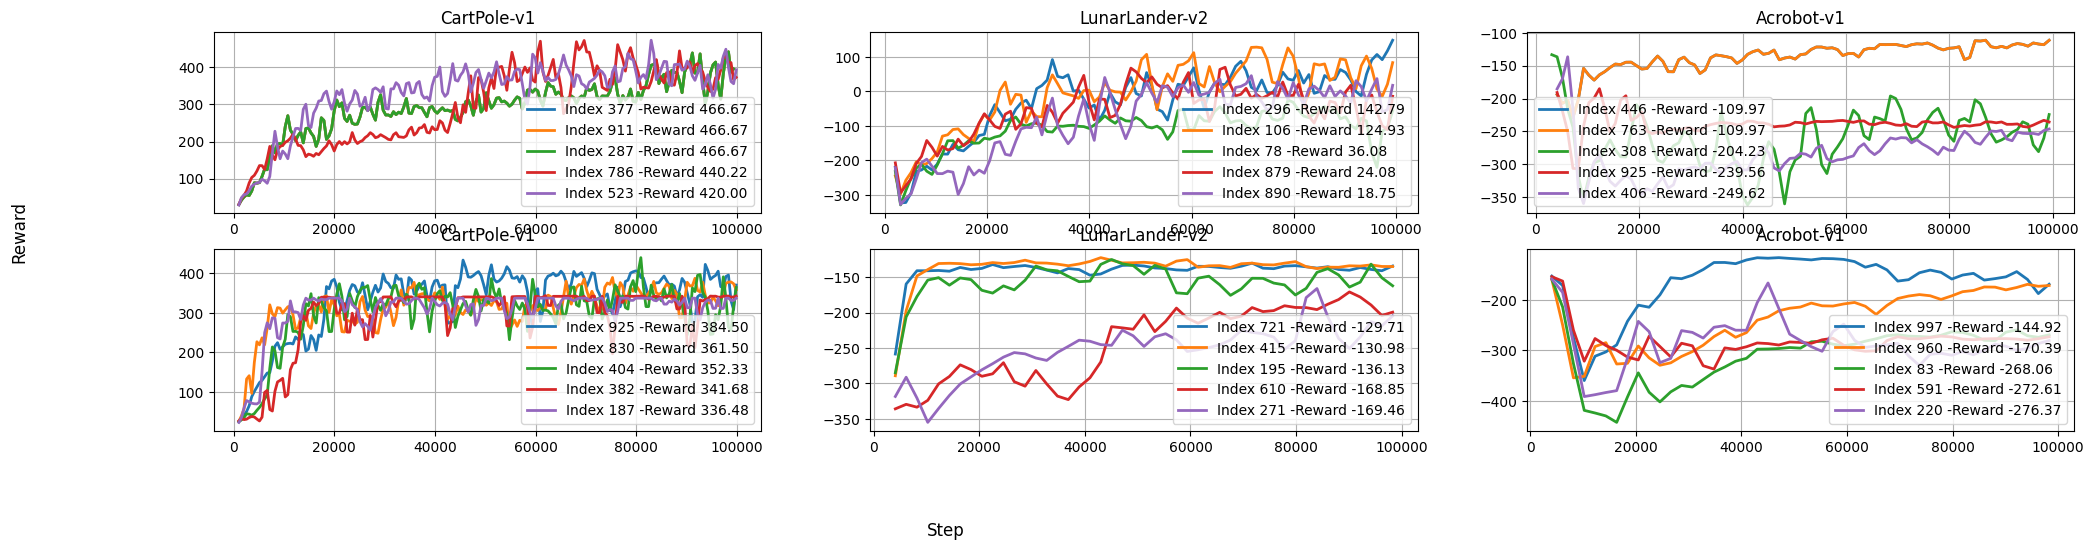

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

In [413]:
fig = plt.figure(figsize=(24, 8))  # Adjust figsize as needed
gs = GridSpec(3, 3, height_ratios=[1, 1, 1], width_ratios=[1, 1, 1])

ax_positions = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]
axes = [fig.add_subplot(gs[pos]) for pos in ax_positions]

all_handles = []
all_labels = []

for config, ax in zip(file_configs, axes):
    df, _ = process_file(config['file'], config['data_dir'], config['prefix'], config['threshold'])
    # Identify the top 5 configurations based on the highest mean rewards
    top_5_runs = df.nlargest(5, 'last_reward')

    # Initialize the plot
    plt.figure(figsize=(8, 4))

    # Iterate through each of the top 5 configurations and plot their reward curves
    for _, row in top_5_runs.iterrows():
        path = os.path.join('./' + config['data_dir'], f"{config['prefix']}_{row['index']}.csv")
        if not os.path.exists(path):
            print(f"File not found: {path}")
            continue
        rewards_df = pd.read_csv(path)
        
        # Calculate average reward and rolling average reward
        average_reward = rewards_df.groupby('Step')['Reward'].mean()
        rolling_average = average_reward.rolling(window=2).mean()
        
        # Plot the reward curves
        ax.plot(rolling_average.index, rolling_average, label=f'Index {row["index"]} -Reward {row["last_reward"]:.2f}', linewidth=2)
        ax.set_title(config['title'])
        ax.grid(True)
        ax.legend()
        
fig.text(0.43, 0.25, 'Step', ha='center', fontsize=12)
fig.text(0.04, 0.63, 'Reward', va='center', rotation='vertical', fontsize=12)

## Experiment 3

### Experiment-3 : Percentile performance

Rewards calculated: 0     (330.67207247285086, 421.3333333333333)
1      (225.1319518531721, 495.1666666666667)
2                              (-2000, -2000)
3    (158.80178574106537, 206.86666361490884)
4     (153.6430299765466, 139.65555572509766)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0     (-141.1979541356621, -63.98802693684896)
1     (-131.3617222128865, 28.825159708658855)
2    (-300.74110861578345, -313.6809895833333)
3     (-393.3978520422867, -553.9269612630209)
4    (-226.23186802946003, -183.7870101928711)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0    (-422.11959956452836, -500.0)
1     (-436.4474551942614, -500.0)
2    (-439.92670802793646, -500.0)
3     (-446.6374254124139, -500.0)
4    (-467.73583157857263, -500.0)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0    (30.879915089951353, 25.550748189290363)
1      (84.77872241567499, 24.35633722941081)
2     (33.47617203099621, 23.660541852315266)
3     (44.29514701751499, 30.118574142456055)
4      (50.21222036564883, 43.63227526346842)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0      (-320.8329481668898, -317.9050801595052)
1     (-345.07861488053885, -399.3901062011719)
2    (-349.56988593557037, -442.60313415527344)
3      (-314.9556451908911, -352.2202402750651)
4     (-440.01787071621294, -488.2332763671875)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0                  (-465.3897940532098, -500.0)
1                  (-433.7328711149894, -500.0)
2    (-400.25121172100097, -390.93333435058594)
3                  (-472.6679749820695, -500.0)
4                 (-450.20393503964215, -500.0)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

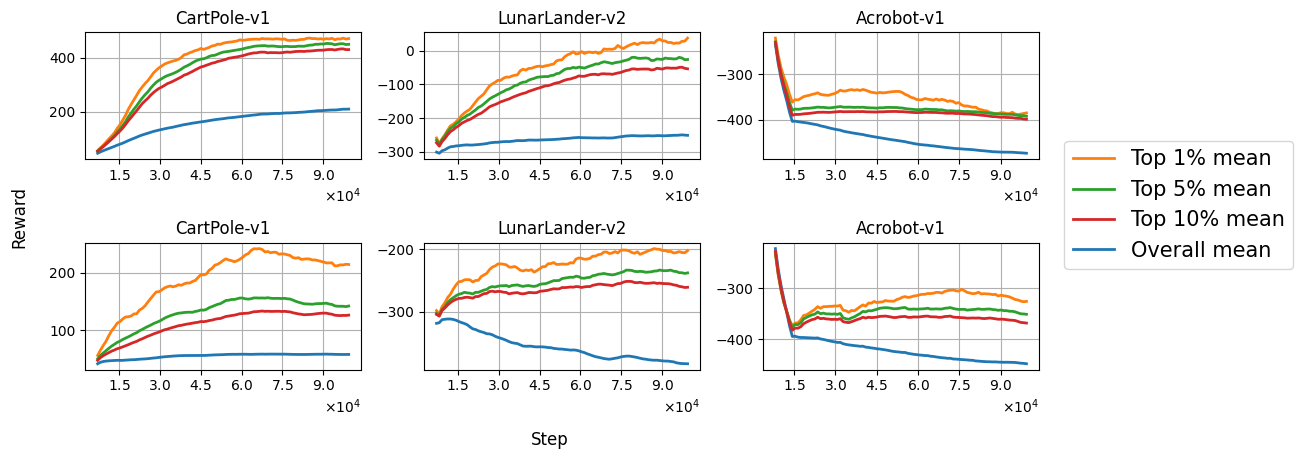

In [414]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Process and plot data
file_configs = [
    {'file': './data_2/samples_cartpole_elbe_exp_3.csv', 'data_dir': 'data_samples_cartpole_elbe_exp_3', 'prefix': 'randsearch_samples_cartpole_elbe_exp_3', 'threshold': 0, 'title': 'CartPole-v1'},
    {'file': './data_2/samples_lunar_elbe_exp_3.csv', 'data_dir': 'data_samples_lunar_elbe_exp_3', 'prefix': 'randsearch_samples_lunar_elbe_exp_3', 'threshold': -1000, 'title': 'LunarLander-v2'},
    {'file': './data_2/samples_acro_elbe_exp_3.csv', 'data_dir': 'data_samples_acro_elbe_exp_3', 'prefix': 'randsearch_samples_acro_elbe_exp_3', 'threshold': -500, 'title': 'Acrobot-v1'},
    {'file': './data_2/samples_cartpole_saddle_exp_3.csv', 'data_dir': 'data_samples_cartpole_saddle_exp_3', 'prefix': 'randsearch_samples_cartpole_saddle_exp_3', 'threshold': 0, 'title': 'CartPole-v1'},
    {'file': './data_2/samples_lunar_saddle_exp_3.csv', 'data_dir': 'data_samples_lunar_saddle_exp_3', 'prefix': 'randsearch_samples_lunar_saddle_exp_3', 'threshold': -1000, 'title': 'LunarLander-v2'},
    {'file': './data_2/samples_acro_saddle_exp_3.csv', 'data_dir': 'data_samples_acro_saddle_exp_3', 'prefix': 'randsearch_samples_acro_saddle_exp_3', 'threshold': -500, 'title': 'Acrobot-v1'},

]

fig = plt.figure(figsize=(12, 6))  # Adjust figsize as needed
gs = GridSpec(3, 3, height_ratios=[1, 1, 1], width_ratios=[1, 1, 1])

ax_positions = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]
axes = [fig.add_subplot(gs[pos]) for pos in ax_positions]

all_handles = []
all_labels = []

for config, ax in zip(file_configs, axes):
    df, quantile_dfs = process_file(config['file'], config['data_dir'], config['prefix'], config['threshold'])
    plot_rewards(ax, [df] + quantile_dfs, config['data_dir'], config['prefix'])
    ax.set_title(config['title'])
    
    handles, labels = ax.get_legend_handles_labels()
    all_handles.extend(handles)
    all_labels.extend(labels)

# Set common labels
fig.text(0.43, 0.25, 'Step', ha='center', fontsize=12)
fig.text(-0.02, 0.63, 'Reward', va='center', rotation='vertical', fontsize=12)

# Create ordered legend
unique_labels = ["Top 1% mean", "Top 5% mean", "Top 10% mean", "Overall mean"]
unique_handles = [all_handles[all_labels.index(label)] for label in unique_labels if label in all_labels]

fig.legend(unique_handles, unique_labels, loc='center left', bbox_to_anchor=(0.85, 0.65), fontsize=15)

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust rect to make space for the legend
plt.show()

### Experiment-3: Frequency of parameter choices in top 10% configurations

In [415]:
data_frames = []

for config in file_configs:
    df = pd.read_csv(config['file'])
    df = process_dataframe(df, config['data_dir'], config['prefix'], config['threshold'])    
    threshold_value = df['mean_reward'].quantile(0.95)    
    df = df[df['mean_reward'] >= threshold_value]
    data_frames.append({'df': df, 'title': config['title']})

# Parameters to plot
parameters = [
    'alpha', 'policy_lr', 'q_lr', 'anneal_lr', 'average_critics', 'parametrized_sampler',
    'eta', 'beta'
]

def get_grid_size(parameter):
    if parameter in ['beta', 'parametrized_sampler','sampler_activation', 'sampler_num_hidden_layers', 'sampler_hidden_size', 'sampler_last_layer_std']:
        return 1, 4
    else:
        return 2, 4

# Compute unique values for each parameter across all dataframes
unique_values = {}
for parameter in parameters:
    unique_values[parameter] = sorted(
        pd.concat([df['df'][parameter] for df in data_frames if parameter in df['df'].columns])
        .dropna().unique()
    )

for parameter in parameters:
    rows, cols = get_grid_size(parameter)
    fig, axes = plt.subplots(rows, cols, figsize=(8, 6))

    if rows == 1:
        # Only process the last `cols` data frames
        data_frames_to_plot = data_frames[-(cols-1):]
    else:
        # Process all data frames
        data_frames_to_plot = data_frames

    order = unique_values[parameter]
    all_elbe = []
    all_saddle = []

    for i, data in enumerate(data_frames_to_plot):    
        df = data['df']

        if parameter not in df.columns:
            continue
        
        if df[parameter].dtype == bool:
            df[parameter] = df[parameter].astype(str)
            order = sorted(df[parameter].unique())

            order = sorted(df[parameter].unique())

        ax = axes[i // (cols-1), i % (cols-1)] if rows > 1 else axes[i % (cols-1)]
        df[parameter] = pd.Categorical(df[parameter], categories=order)
        sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
        if rows > 1:
            if i <3:
                all_elbe.append(df[parameter].dropna().reset_index(drop=True))
            else:
                all_saddle.append(df[parameter].dropna().reset_index(drop=True))
        else:
            all_saddle.append(df[parameter].dropna().reset_index(drop=True))

        if rows == 1 or i < cols-1:
            ax.set_title(data['title'])
        
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.tick_params(axis='x', rotation=90)
        
        if i // (cols-1) != rows - 1:
            ax.set_xticklabels([])

    if rows > 1:
        all_elbe = pd.concat(all_elbe)
        ax = axes[0, -1]
        sns.countplot(ax=ax, x=all_elbe, order=order, stat='proportion', legend=False, palette='viridis')
        ax.tick_params(axis='x', rotation=90)
        ax.set_xlabel('')
        ax.set_ylabel('')

    all_saddle = pd.concat(all_saddle)
    ax = axes[-1] if rows == 1 else axes[-1, -1]
    sns.countplot(ax=ax, x=all_saddle,order=order, stat='proportion', legend=False, palette='viridis')
    ax.tick_params(axis='x', rotation=90)
    ax.set_xlabel('')
    ax.set_ylabel('')

    if rows == 1:
        axes[3].set_title('All')
    else:
        axes[0, -1].set_title('All')
        axes[0, -1].set_xticklabels([])

    plt.subplots_adjust(bottom=0.2, wspace=0.4)  
    plt.text(0.5, 0.05, f"{parameter}", ha='center', va='center', transform=fig.transFigure, fontsize=12)  # Text at the bottom center
    plot_filename = os.path.join(plots_dir, f"experiment_3_distribution_plot_{parameter}.png")
    plt.savefig(plot_filename)
    plt.close()


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/1680105743.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/1680105743.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/1680105743.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fal

### Experiment-3: 95th percentile of mean_rewards

In [416]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plots_dir = "plots"
os.makedirs(plots_dir, exist_ok=True)

data_frames = []

for config in file_configs:
    df = pd.read_csv(config['file'])
    df = process_dataframe(df, config['data_dir'], config['prefix'], config['threshold'])
    data_frames.append({'df': df, 'dir': config['data_dir'], 'prefix': config['prefix'], 'title': config['title']})

parameters = [
    'alpha', 'policy_lr', 'q_lr', 'anneal_lr', 'average_critics', 'parametrized_sampler',
    'eta', 'beta'
]

def get_grid_size(parameter):
    if parameter in ['beta', 'parametrized_sampler','sampler_activation', 'sampler_num_hidden_layers', 'sampler_hidden_size', 'sampler_last_layer_std']:
        return 1, 3
    else:
        return 2, 3

# Compute unique values for each parameter across all dataframes
unique_values = {}
for parameter in parameters:
    unique_values[parameter] = sorted(
        pd.concat([df['df'][parameter] for df in data_frames if parameter in df['df'].columns])
        .dropna().unique()
    )


for parameter in parameters:
    rows, cols = get_grid_size(parameter)
    fig, axes = plt.subplots(rows, cols, figsize=(6, 6))

    if rows == 1:
        data_frames_to_plot = data_frames[-(cols):]
    else:
        data_frames_to_plot = data_frames

    order = unique_values[parameter]
    all_elbe = []
    all_saddle = []
    
    for i, data in enumerate(data_frames_to_plot):
        df = data['df']

        if parameter not in df.columns:
            continue

        if df[parameter].dtype == bool:
            df[parameter] = df[parameter].astype(str)
        ax = axes[i // cols, i % (cols)] if rows > 1 else axes[i % (cols)]
        # Calculate the 95th percentile of the mean rewards for each unique value of the parameter

        parameter_percentile = df.groupby(parameter)['mean_reward'].quantile(0.95).reset_index()
        sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
        ax.tick_params(axis='x', rotation=90)

        ax.set_xlabel('')
        ax.set_ylabel('')
        if i // (cols) != rows-1:
            ax.set_xticklabels([])

        if rows == 1 or i < cols:
            ax.set_title(data['title'])
            
    if rows == 1:
        axes[1].set_xlabel(parameter, fontsize=12)
    else:
        axes[1, 1].set_xlabel(parameter, fontsize=12)
    # Save the plot
    plt.tight_layout()
    plot_filename = os.path.join(plots_dir, f"experiment_3_95th_percentile_{parameter}.png")
    plt.savefig(plot_filename)
    plt.close()


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/3538650408.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/3538650408.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/3538650408.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.

### Experiment-3: Parameter Distributions

In [417]:
data_frames = []

for config in file_configs:
    df = pd.read_csv(config['file'])
    df = process_dataframe(df, config['data_dir'], config['prefix'], config['threshold'])
    data_frames.append({'df': df, 'dir': config['data_dir'], 'prefix': config['prefix'], 'title': config['title']})

# Parameters to plot
parameters = [
    'alpha', 'policy_lr', 'q_lr', 'anneal_lr','average_critics', 'parametrized_sampler',
    'eta', 'beta'
]

def get_grid_size(parameter):
    if parameter in ['parametrized_sampler','sampler_activation', 'sampler_num_hidden_layers', 'sampler_hidden_size', 'sampler_last_layer_std', 'beta']:
        return 1, 3 
    else:
        return 2, 3

for parameter in parameters:
    rows, cols = get_grid_size(parameter)
    fig, axes = plt.subplots(rows, cols, figsize=(6, 6))
    norm_dfs = []

    if rows == 1:
        data_frames_to_plot = data_frames[-cols:]
    else:
        data_frames_to_plot = data_frames

    for i, data in enumerate(data_frames_to_plot):
        df = data['df']
        if parameter not in df.columns:
            continue
        
        parameter_values = sorted(df[parameter].unique())
        if df[parameter].dtype == bool:
            df[parameter] = df[parameter].astype(str)
            parameter_values = sorted(df[parameter].unique())

        all_reward_distributions = []

        for value in parameter_values:
            subset_df = df[df[parameter] == value]

            reward_distributions = []

            for index, row in subset_df.iterrows():
                csv_path = os.path.join(data['dir'], f'{data["prefix"]}_{row["index"]}.csv')
                if os.path.exists(csv_path):
                    rewards = pd.read_csv(csv_path)
                    reward_distributions.append(rewards['Reward'].values.flatten())
                else:
                    print(f"File not found: {csv_path}")

            reward_distributions = [item for sublist in reward_distributions for item in sublist]
            all_reward_distributions.append(reward_distributions)
        

        if rows == 1:
            ax = axes[i % cols]
        else:
            ax = axes[i // cols, i % cols]

        box_plot = sns.boxplot(data=pd.DataFrame(all_reward_distributions, index=parameter_values).T.dropna(), ax=ax, palette='viridis', showfliers=False, boxprops=dict(edgecolor='none'))
        
        if rows == 1 or i < cols:
            ax.set_title(data['title'])
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.xaxis.set_tick_params(rotation=90)
    
    if rows == 1:
        axes[1].set_xlabel(parameter, fontsize=12)
    else:
        axes[1, 1].set_xlabel(parameter, fontsize=12)

    fig.text(0.5, -0.04, parameter, ha='center', fontsize=12)
    plt.xticks(rotation=90)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plot_filename = os.path.join(plots_dir, f"experiment_3_boxplot_{parameter}.png")
    plt.savefig(plot_filename)
    plt.close()

### Best Runs

Rewards calculated: 0     (330.67207247285086, 421.3333333333333)
1      (225.1319518531721, 495.1666666666667)
2                              (-2000, -2000)
3    (158.80178574106537, 206.86666361490884)
4     (153.6430299765466, 139.65555572509766)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0     (-141.1979541356621, -63.98802693684896)
1     (-131.3617222128865, 28.825159708658855)
2    (-300.74110861578345, -313.6809895833333)
3     (-393.3978520422867, -553.9269612630209)
4    (-226.23186802946003, -183.7870101928711)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0    (-422.11959956452836, -500.0)
1     (-436.4474551942614, -500.0)
2    (-439.92670802793646, -500.0)
3     (-446.6374254124139, -500.0)
4    (-467.73583157857263, -500.0)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0    (30.879915089951353, 25.550748189290363)
1      (84.77872241567499, 24.35633722941081)
2     (33.47617203099621, 23.660541852315266)
3     (44.29514701751499, 30.118574142456055)
4      (50.21222036564883, 43.63227526346842)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0      (-320.8329481668898, -317.9050801595052)
1     (-345.07861488053885, -399.3901062011719)
2    (-349.56988593557037, -442.60313415527344)
3      (-314.9556451908911, -352.2202402750651)
4     (-440.01787071621294, -488.2332763671875)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0                  (-465.3897940532098, -500.0)
1                  (-433.7328711149894, -500.0)
2    (-400.25121172100097, -390.93333435058594)
3                  (-472.6679749820695, -500.0)
4                 (-450.20393503964215, -500.0)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Text(0.04, 0.63, 'Reward')

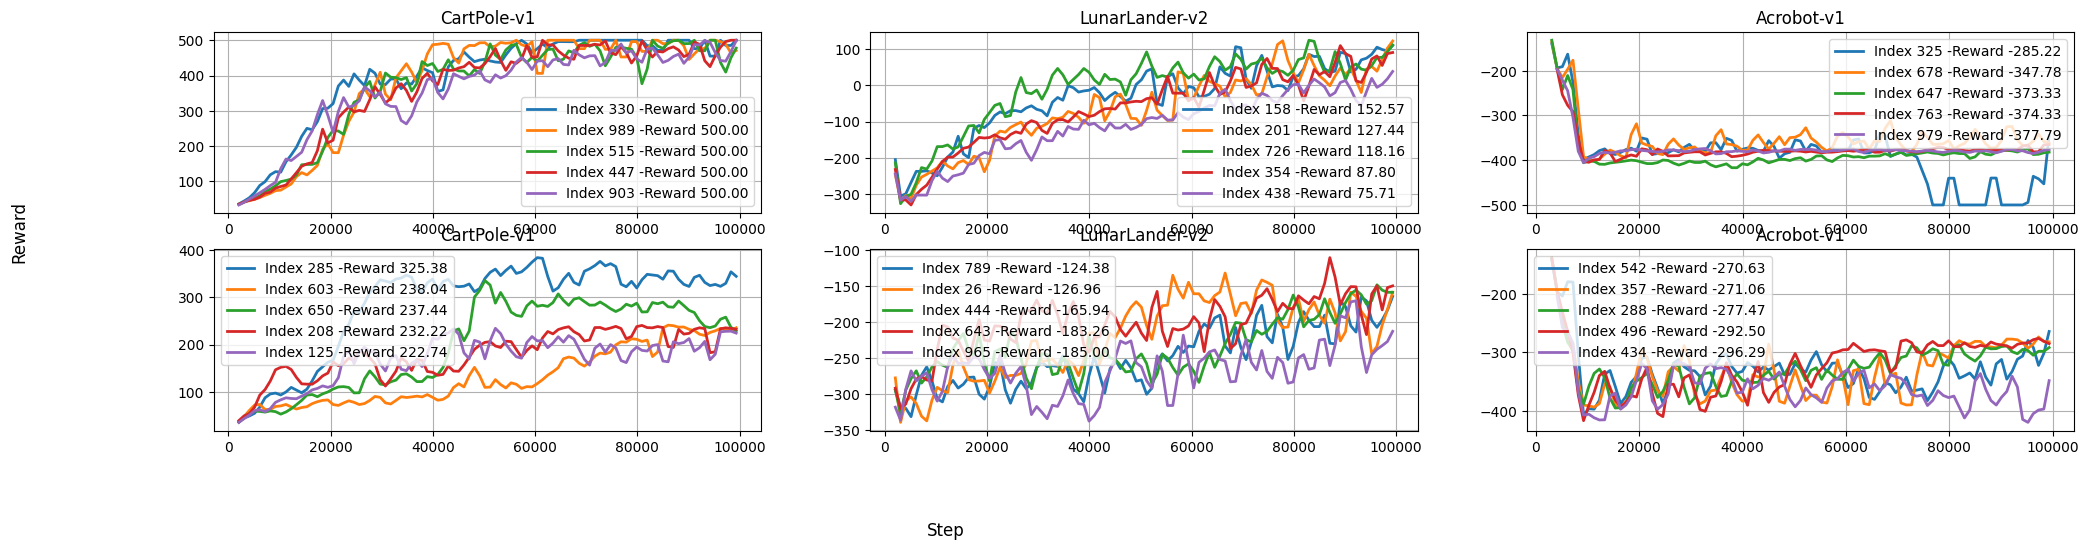

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

In [418]:
fig = plt.figure(figsize=(24, 8))  # Adjust figsize as needed
gs = GridSpec(3, 3, height_ratios=[1, 1, 1], width_ratios=[1, 1, 1])

ax_positions = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]
axes = [fig.add_subplot(gs[pos]) for pos in ax_positions]

all_handles = []
all_labels = []

for config, ax in zip(file_configs, axes):
    df, _ = process_file(config['file'], config['data_dir'], config['prefix'], config['threshold'])
    # Identify the top 5 configurations based on the highest mean rewards
    top_5_runs = df.nlargest(5, 'last_reward')

    # Initialize the plot
    plt.figure(figsize=(8, 4))

    # Iterate through each of the top 5 configurations and plot their reward curves
    for _, row in top_5_runs.iterrows():
        path = os.path.join('./' + config['data_dir'], f"{config['prefix']}_{row['index']}.csv")
        if not os.path.exists(path):
            print(f"File not found: {path}")
            continue
        rewards_df = pd.read_csv(path)
        
        # Calculate average reward and rolling average reward
        average_reward = rewards_df.groupby('Step')['Reward'].mean()
        rolling_average = average_reward.rolling(window=2).mean()
        
        # Plot the reward curves
        ax.plot(rolling_average.index, rolling_average, label=f'Index {row["index"]} -Reward {row["last_reward"]:.2f}', linewidth=2)
        ax.set_title(config['title'])
        ax.grid(True)
        ax.legend()
fig.text(0.43, 0.25, 'Step', ha='center', fontsize=12)
fig.text(0.04, 0.63, 'Reward', va='center', rotation='vertical', fontsize=12)


## Experiment 4

### Experiment-4 : Percentile performance

Rewards calculated: 0    (331.55164751075426, 363.22222222222223)
1     (218.46394202444287, 287.1142832438151)
2      (71.67518399490251, 91.91111246744792)
3     (227.72206713093655, 303.1153869628906)
4     (19.66510925690333, 10.641595204671225)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0                               (-2000, -2000)
1    (-235.7406980726454, -207.08832041422525)
2    (-324.65302695808833, -347.2357889811198)
3    (-200.1227280828688, -140.22739919026694)
4     (-521.6778318617078, -767.5613911946615)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0                               (-2000, -2000)
1      (-357.192217402988, -346.0888926188151)
2                (-323.68973970619635, -500.0)
3    (-373.2105239976383, -392.05555725097656)
4                 (-357.7138803655451, -500.0)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0                            (-2000, -2000)
1                            (-2000, -2000)
2                            (-2000, -2000)
3    (80.78086505995856, 107.7836119333903)
4    (73.94715901666491, 162.8358694712321)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0                                (-2000, -2000)
1                                (-2000, -2000)
2                                (-2000, -2000)
3    (-428.89911673254994, -466.58746337890625)
4      (-417.4009481524746, -455.9981587727864)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0                   (-2000, -2000)
1                   (-2000, -2000)
2                   (-2000, -2000)
3      (-372.326184003781, -500.0)
4    (-402.89040110270184, -500.0)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

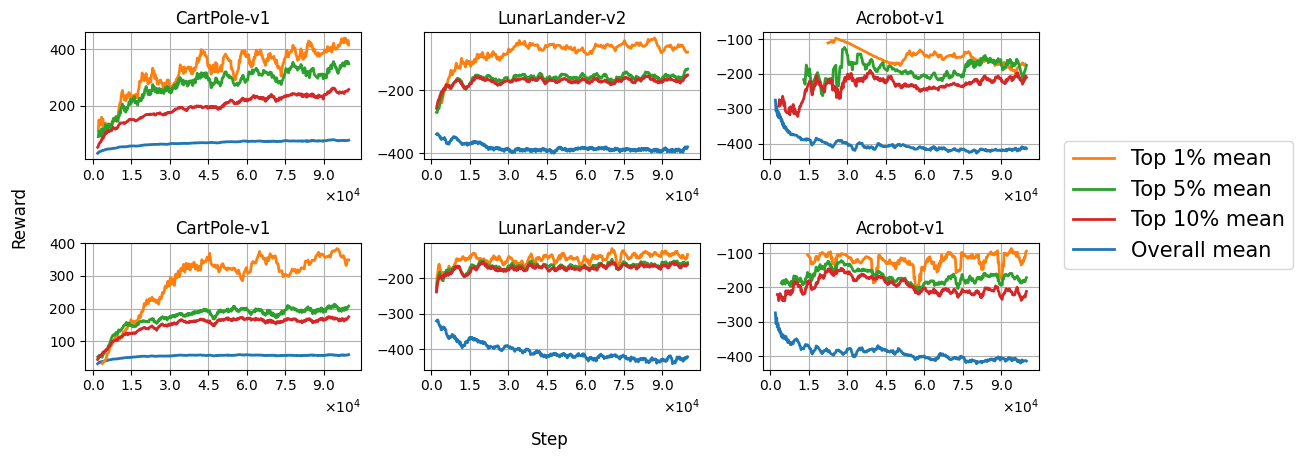

In [419]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# # Process and plot data
# file_configs = [
#     {'file': './data_2/samples_cartpole_elbe_exp_4.csv', 'data_dir': 'data_samples_cartpole_elbe_exp_4', 'prefix': 'randsearch_samples_cartpole_elbe_exp_4', 'threshold': 0, 'title': 'CartPole-v1'},
#     {'file': './data_2/samples_lunar_elbe_exp_4.csv', 'data_dir': 'data_samples_lunar_elbe_exp_4', 'prefix': 'randsearch_samples_lunar_elbe_exp_4', 'threshold': -1000, 'title': 'LunarLander-v2'},
#     {'file': './data_2/samples_acro_elbe_exp_4.csv', 'data_dir': 'data_samples_acro_elbe_exp_4', 'prefix': 'randsearch_samples_acro_elbe_exp_4', 'threshold': -500, 'title': 'Acrobot-v1'},
#     {'file': './data_2/samples_cartpole_saddle_exp_4.csv', 'data_dir': 'data_samples_cartpole_saddle_exp_4', 'prefix': 'randsearch_samples_cartpole_saddle_exp_4', 'threshold': 0, 'title': 'CartPole-v1'},
#     {'file': './data_2/samples_lunar_saddle_exp_4.csv', 'data_dir': 'data_samples_lunar_saddle_exp_4', 'prefix': 'randsearch_samples_lunar_saddle_exp_4', 'threshold': -1000, 'title': 'LunarLander-v2'},
#     {'file': './data_2/samples_acro_saddle_exp_4.csv', 'data_dir': 'data_samples_acro_saddle_exp_4', 'prefix': 'randsearch_samples_acro_saddle_exp_4', 'threshold': -500, 'title': 'Acrobot-v1'},
# ]

file_configs = [
    {'file': './data_2/samples_cartpole_elbe_exp_7.csv', 'data_dir': 'data_samples_cartpole_elbe_exp_7', 'prefix': 'randsearch_samples_cartpole_elbe_exp_7', 'threshold': 0, 'title': 'CartPole-v1'},
    {'file': './data_2/samples_lunar_elbe_exp_7.csv', 'data_dir': 'data_samples_lunar_elbe_exp_7', 'prefix': 'randsearch_samples_lunar_elbe_exp_7', 'threshold': -1000, 'title': 'LunarLander-v2'},
    {'file': './data_2/samples_acro_elbe_exp_7.csv', 'data_dir': 'data_samples_acro_elbe_exp_7', 'prefix': 'randsearch_samples_acro_elbe_exp_7', 'threshold': -500, 'title': 'Acrobot-v1'},
    {'file': './data_2/samples_cartpole_saddle_exp_7.csv', 'data_dir': 'data_samples_cartpole_saddle_exp_7', 'prefix': 'randsearch_samples_cartpole_saddle_exp_7', 'threshold': 0, 'title': 'CartPole-v1'},
    {'file': './data_2/samples_lunar_saddle_exp_7.csv', 'data_dir': 'data_samples_lunar_saddle_exp_7', 'prefix': 'randsearch_samples_lunar_saddle_exp_7', 'threshold': -1000, 'title': 'LunarLander-v2'},
    {'file': './data_2/samples_acro_saddle_exp_7.csv', 'data_dir': 'data_samples_acro_saddle_exp_7', 'prefix': 'randsearch_samples_acro_saddle_exp_7', 'threshold': -500, 'title': 'Acrobot-v1'},

]

fig = plt.figure(figsize=(12, 6))  # Adjust figsize as needed
gs = GridSpec(3, 3, height_ratios=[1, 1, 1], width_ratios=[1, 1, 1])

ax_positions = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]
axes = [fig.add_subplot(gs[pos]) for pos in ax_positions]

all_handles = []
all_labels = []

for config, ax in zip(file_configs, axes):
    df, quantile_dfs = process_file(config['file'], config['data_dir'], config['prefix'], config['threshold'])
    plot_rewards(ax, [df] + quantile_dfs, config['data_dir'], config['prefix'])
    ax.set_title(config['title'])
    
    handles, labels = ax.get_legend_handles_labels()
    all_handles.extend(handles)
    all_labels.extend(labels)

fig.text(0.43, 0.25, 'Step', ha='center', fontsize=12)
fig.text(-0.02, 0.63, 'Reward', va='center', rotation='vertical', fontsize=12)

unique_labels = ["Top 1% mean", "Top 5% mean", "Top 10% mean", "Overall mean"]
unique_handles = [all_handles[all_labels.index(label)] for label in unique_labels if label in all_labels]

fig.legend(unique_handles, unique_labels, loc='center left', bbox_to_anchor=(0.85, 0.65), fontsize=15)

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

### Experiment-4: Frequency of parameter choices in top 10% configurations

In [420]:
data_frames = []
import seaborn as sns
for config in file_configs:
    df = pd.read_csv(config['file'])
    df = process_dataframe(df, config['data_dir'], config['prefix'], config['threshold'])    
    threshold_value = df['mean_reward'].quantile(0.95)    
    df = df[df['mean_reward'] >= threshold_value]
    data_frames.append({'df': df, 'title': config['title']})

parameters = [
    'alpha', 'policy_lr', 'q_lr', 'parametrized_sampler', 'beta',
    'normalize_delta', 'gae', 'use_kl_loss', 'target_network', 
    'target_network_frequency', 'num_envs', 'total_iterations',
    'update_epochs'

]

def get_grid_size(parameter):
    if parameter in ['beta', 'parametrized_sampler','sampler_activation', 'sampler_num_hidden_layers', 'sampler_hidden_size', 'sampler_last_layer_std']:
        return 1, 4
    else:
        return 2, 4

unique_values = {}
for parameter in parameters:
    unique_values[parameter] = sorted(
        pd.concat([df['df'][parameter] for df in data_frames if parameter in df['df'].columns])
        .dropna().unique()
    )

for parameter in parameters:
    rows, cols = get_grid_size(parameter)
    fig, axes = plt.subplots(rows, cols, figsize=(8, 6))

    if rows == 1: data_frames_to_plot = data_frames[-(cols-1):]
    else: data_frames_to_plot = data_frames

    order = unique_values[parameter]
    all_elbe = []
    all_saddle = []

    for i, data in enumerate(data_frames_to_plot):    
        df = data['df']
        if parameter not in df.columns:
            continue
        
        if df[parameter].dtype == bool:
            df[parameter] = df[parameter].astype(str)
            order = [str(x) for x in order]  

        
        ax = axes[i // (cols-1), i % (cols-1)] if rows > 1 else axes[i % (cols-1)]
        df[parameter] = pd.Categorical(df[parameter], categories=order)
        sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
        if rows > 1:
            if i <3:
                all_elbe.append(df[parameter].dropna().reset_index(drop=True))
            else:
                all_saddle.append(df[parameter].dropna().reset_index(drop=True))
        else:
            all_saddle.append(df[parameter].dropna().reset_index(drop=True))

        if rows == 1 or i < cols-1:
            ax.set_title(data['title'])
        
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.tick_params(axis='x', rotation=90)
        
        if i // (cols-1) != rows - 1:
            ax.set_xticklabels([])

    if rows > 1:
        all_elbe = pd.concat(all_elbe)
        ax = axes[0, -1]
        sns.countplot(ax=ax, x=all_elbe, order=order, stat='proportion', legend=False, palette='viridis')
        ax.tick_params(axis='x', rotation=90)
        ax.set_xlabel('')
        ax.set_ylabel('')

    all_saddle = pd.concat(all_saddle)
    ax = axes[-1] if rows == 1 else axes[-1, -1]
    sns.countplot(ax=ax, x=all_saddle,order=order, stat='proportion', legend=False, palette='viridis')
    ax.tick_params(axis='x', rotation=90)
    ax.set_xlabel('')
    ax.set_ylabel('')

    if rows == 1:
        axes[3].set_title('All')
    else:
        axes[0, -1].set_title('All')
        axes[0, -1].set_xticklabels([])

    plt.subplots_adjust(bottom=0.2, wspace=0.4)  
    plt.text(0.5, 0.05, f"{parameter}", ha='center', va='center', transform=fig.transFigure, fontsize=12)
    plot_filename = os.path.join(plots_dir, f"experiment_4_distribution_plot_{parameter}.png")
    plt.savefig(plot_filename)
    plt.close()


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/850486270.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/850486270.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/850486270.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False`

### Experiment-4: Parameter Distributions

In [421]:

data_frames = []

for config in file_configs:
    df = pd.read_csv(config['file'])
    df = process_dataframe(df, config['data_dir'], config['prefix'], config['threshold'])
    data_frames.append({'df': df, 'dir': config['data_dir'], 'prefix': config['prefix'], 'title': config['title']})

parameters = [
    'alpha', 'policy_lr', 'q_lr', 'parametrized_sampler', 'beta',
    'normalize_delta', 'gae', 'use_kl_loss', 'target_network', 
    'target_network_frequency', 'num_envs', 'total_iterations',
    'update_epochs'
]

def get_grid_size(parameter):
    if parameter in ['parametrized_sampler','sampler_activation', 'sampler_num_hidden_layers', 'sampler_hidden_size', 'sampler_last_layer_std', 'beta']:
        return 1, 3 
    else:
        return 2, 3

for parameter in parameters:
    rows, cols = get_grid_size(parameter)
    fig, axes = plt.subplots(rows, cols, figsize=(6, 6))
    norm_dfs = []

    if rows == 1:
        data_frames_to_plot = data_frames[-cols:]
    else:
        data_frames_to_plot = data_frames

    for i, data in enumerate(data_frames_to_plot):
        df = data['df']

        if parameter not in df.columns:
            continue
        
        parameter_values = sorted(df[parameter].unique())
        if df[parameter].dtype == bool:
            df[parameter] = df[parameter].astype(str)
            parameter_values = sorted(df[parameter].unique())

        all_reward_distributions = []

        for value in parameter_values:
            subset_df = df[df[parameter] == value]

            reward_distributions = []

            for index, row in subset_df.iterrows():
                csv_path = os.path.join(data['dir'], f'{data["prefix"]}_{row["index"]}.csv')
                if os.path.exists(csv_path):
                    rewards = pd.read_csv(csv_path)
                    reward_distributions.append(rewards['Reward'].values.flatten())
                else:
                    print(f"File not found: {csv_path}")

            reward_distributions = [item for sublist in reward_distributions for item in sublist]
            all_reward_distributions.append(reward_distributions)

        if rows == 1:
            ax = axes[i % cols]
        else:
            ax = axes[i // cols, i % cols]

        box_plot = sns.boxplot(data=pd.DataFrame(all_reward_distributions, index=parameter_values).T.dropna(), ax=ax, palette='viridis', showfliers=False, boxprops=dict(edgecolor='none'))
        
        if rows == 1 or i < cols:
            ax.set_title(data['title'])
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.xaxis.set_tick_params(rotation=90)
    
    if rows == 1:
        axes[1].set_xlabel(parameter, fontsize=12)
    else:
        axes[1, 1].set_xlabel(parameter, fontsize=12)

    fig.text(0.5, -0.04, parameter, ha='center', fontsize=12)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plot_filename = os.path.join(plots_dir, f"experiment_4_boxplot_{parameter}.png")
    plt.savefig(plot_filename)
    plt.close()

### Experiment-4: 95th percentile of mean_rewards

In [422]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plots_dir = "plots"
os.makedirs(plots_dir, exist_ok=True)

data_frames = []

for config in file_configs:
    df = pd.read_csv(config['file'])
    df = process_dataframe(df, config['data_dir'], config['prefix'], config['threshold'])
    data_frames.append({'df': df, 'dir': config['data_dir'], 'prefix': config['prefix'], 'title': config['title']})

parameters = [
    'alpha', 'policy_lr', 'q_lr', 'parametrized_sampler', 'beta',
    'normalize_delta', 'gae', 'use_kl_loss', 'target_network', 
    'target_network_frequency', 'num_envs', 'total_iterations',
    'update_epochs'
]

def get_grid_size(parameter):
    if parameter in ['beta', 'parametrized_sampler','sampler_activation', 'sampler_num_hidden_layers', 'sampler_hidden_size', 'sampler_last_layer_std']:
        return 1, 3
    else:
        return 2, 3

unique_values = {}
for parameter in parameters:
    unique_values[parameter] = sorted(
        pd.concat([df['df'][parameter] for df in data_frames if parameter in df['df'].columns])
        .dropna().unique()
    )


for parameter in parameters:
    rows, cols = get_grid_size(parameter)
    fig, axes = plt.subplots(rows, cols, figsize=(6, 6))

    if rows == 1:
        data_frames_to_plot = data_frames[-(cols):]
    else:
        data_frames_to_plot = data_frames

    order = unique_values[parameter]
    all_elbe = []
    all_saddle = []
    
    for i, data in enumerate(data_frames_to_plot):
        df = data['df']

        if parameter not in df.columns:
            continue

        if df[parameter].dtype == bool:
            df[parameter] = df[parameter].astype(str)

        if parameter == 'target_network_frequency':
            df = df[df['target_network']=='True']
            
        ax = axes[i // cols, i % (cols)] if rows > 1 else axes[i % (cols)]

        parameter_percentile = df.groupby(parameter)['mean_reward'].quantile(0.95).reset_index()
        sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
        ax.tick_params(axis='x', rotation=90)

        ax.set_xlabel('')
        ax.set_ylabel('')
        if i // (cols) != rows-1:
            ax.set_xticklabels([])

        if rows == 1 or i < cols:
            ax.set_title(data['title'])
            
    if rows == 1:
        axes[1].set_xlabel(parameter, fontsize=12)
    else:
        axes[1, 1].set_xlabel(parameter, fontsize=12)

    plt.tight_layout()
    plot_filename = os.path.join(plots_dir, f"experiment_4_95th_percentile_{parameter}.png")
    plt.savefig(plot_filename)
    plt.close()

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/758555546.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/758555546.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/758555546.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.bar

### Experiment-4: Conditional 95th percentile

In [423]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plots_dir = "plots"
os.makedirs(plots_dir, exist_ok=True)

data_frames = []

for config in file_configs:
    df = pd.read_csv(config['file'])
    df = process_dataframe(df, config['data_dir'], config['prefix'], config['threshold'])
    data_frames.append({'df': df, 'dir': config['data_dir'], 'prefix': config['prefix'], 'title': config['title']})

parameters = [
    'alpha', 'policy_lr', 'q_lr', 'parametrized_sampler', 'beta',
    'normalize_delta', 'gae', 'use_kl_loss', 'target_network', 
    'target_network_frequency', 'num_envs', 'total_iterations',
    'update_epochs'
]
def get_grid_size(parameter):
    if parameter in ['beta', 'parametrized_sampler','sampler_activation', 'sampler_num_hidden_layers', 'sampler_hidden_size', 'sampler_last_layer_std']:
        return 1, 3
    else:
        return 2, 3

unique_values = {}
for parameter in parameters:
    unique_values[parameter] = sorted(
        pd.concat([df['df'][parameter] for df in data_frames if parameter in df['df'].columns])
        .dropna().unique()
    )


for parameter in parameters:
    rows, cols = get_grid_size(parameter)
    fig, axes = plt.subplots(rows, cols, figsize=(6, 6))

    if rows == 1:
        data_frames_to_plot = data_frames[-(cols):]
    else:
        data_frames_to_plot = data_frames

    order = unique_values[parameter]
    all_elbe = []
    all_saddle = []
    
    for i, data in enumerate(data_frames_to_plot):
        df = data['df']

        if parameter not in df.columns:
            continue
        if df[parameter].dtype == bool and parameter != 'gae':
            df[parameter] = df[parameter].astype(str)

        df = df[df['gae'] == True]

        if parameter == 'target_network_frequency':
            df = df[df['target_network']=='True']
            
        ax = axes[i // cols, i % (cols)] if rows > 1 else axes[i % (cols)]

        parameter_percentile = df.groupby(parameter)['mean_reward'].quantile(0.95).reset_index()
        sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
        ax.tick_params(axis='x', rotation=90)

        ax.set_xlabel('')
        ax.set_ylabel('')
        if i // (cols) != rows-1:
            ax.set_xticklabels([])

        if rows == 1 or i < cols:
            ax.set_title(data['title'])
            
    if rows == 1:
        axes[1].set_xlabel(parameter, fontsize=12)
    else:
        axes[1, 1].set_xlabel(parameter, fontsize=12)
    
    plt.tight_layout()
    plot_filename = os.path.join(plots_dir, f"experiment_4_95th_percentile_{parameter}_gae_True.png")
    plt.savefig(plot_filename)
    plt.close()


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2855202850.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2855202850.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2855202850.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.

In [424]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plots_dir = "plots"
os.makedirs(plots_dir, exist_ok=True)

data_frames = []

for config in file_configs:
    df = pd.read_csv(config['file'])
    df = process_dataframe(df, config['data_dir'], config['prefix'], config['threshold'])
    data_frames.append({'df': df, 'dir': config['data_dir'], 'prefix': config['prefix'], 'title': config['title']})

parameters = [
    'alpha', 'policy_lr', 'q_lr', 'parametrized_sampler', 'beta',
    'normalize_delta', 'gae', 'use_kl_loss', 'target_network', 
    'target_network_frequency', 'num_envs', 'total_iterations',
    'update_epochs'
]
def get_grid_size(parameter):
    if parameter in ['beta', 'parametrized_sampler','sampler_activation', 'sampler_num_hidden_layers', 'sampler_hidden_size', 'sampler_last_layer_std']:
        return 1, 3
    else:
        return 2, 3

unique_values = {}
for parameter in parameters:
    unique_values[parameter] = sorted(
        pd.concat([df['df'][parameter] for df in data_frames if parameter in df['df'].columns])
        .dropna().unique()
    )


for parameter in parameters:
    rows, cols = get_grid_size(parameter)
    fig, axes = plt.subplots(rows, cols, figsize=(6, 6))

    if rows == 1:
        data_frames_to_plot = data_frames[-(cols):]
    else:
        data_frames_to_plot = data_frames

    order = unique_values[parameter]
    all_elbe = []
    all_saddle = []
    
    for i, data in enumerate(data_frames_to_plot):
        df = data['df']

        if parameter not in df.columns:
            continue
        if df[parameter].dtype == bool and parameter != 'gae':
            df[parameter] = df[parameter].astype(str)

        df = df[df['gae'] == False]

        if parameter == 'target_network_frequency':
            df = df[df['target_network']=='True']
            
        ax = axes[i // cols, i % (cols)] if rows > 1 else axes[i % (cols)]

        parameter_percentile = df.groupby(parameter)['mean_reward'].quantile(0.99).reset_index()
        sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
        ax.tick_params(axis='x', rotation=90)

        ax.set_xlabel('')
        ax.set_ylabel('')
        if i // (cols) != rows-1:
            ax.set_xticklabels([])

        if rows == 1 or i < cols:
            ax.set_title(data['title'])
            
    if rows == 1:
        axes[1].set_xlabel(parameter, fontsize=12)
    else:
        axes[1, 1].set_xlabel(parameter, fontsize=12)
    
    plt.tight_layout()
    plot_filename = os.path.join(plots_dir, f"experiment_4_95th_percentile_{parameter}_gae_False.png")
    plt.savefig(plot_filename)
    plt.close()


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2537895662.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2537895662.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2537895662.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.

### Best Runs

Rewards calculated: 0    (331.55164751075426, 363.22222222222223)
1     (218.46394202444287, 287.1142832438151)
2      (71.67518399490251, 91.91111246744792)
3     (227.72206713093655, 303.1153869628906)
4     (19.66510925690333, 10.641595204671225)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0                               (-2000, -2000)
1    (-235.7406980726454, -207.08832041422525)
2    (-324.65302695808833, -347.2357889811198)
3    (-200.1227280828688, -140.22739919026694)
4     (-521.6778318617078, -767.5613911946615)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0                               (-2000, -2000)
1      (-357.192217402988, -346.0888926188151)
2                (-323.68973970619635, -500.0)
3    (-373.2105239976383, -392.05555725097656)
4                 (-357.7138803655451, -500.0)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0                            (-2000, -2000)
1                            (-2000, -2000)
2                            (-2000, -2000)
3    (80.78086505995856, 107.7836119333903)
4    (73.94715901666491, 162.8358694712321)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0                                (-2000, -2000)
1                                (-2000, -2000)
2                                (-2000, -2000)
3    (-428.89911673254994, -466.58746337890625)
4      (-417.4009481524746, -455.9981587727864)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0                   (-2000, -2000)
1                   (-2000, -2000)
2                   (-2000, -2000)
3      (-372.326184003781, -500.0)
4    (-402.89040110270184, -500.0)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Text(0.04, 0.63, 'Reward')

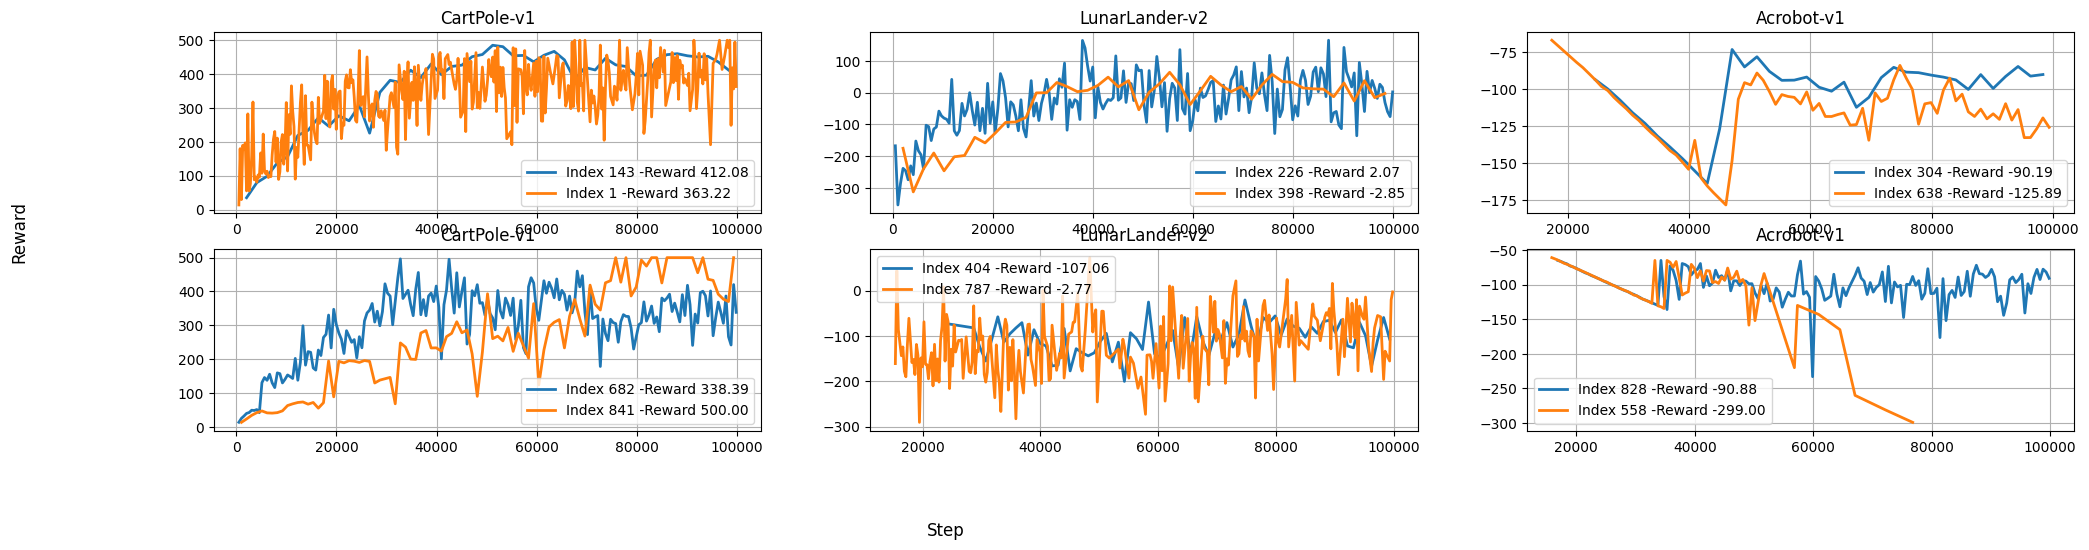

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

In [425]:
fig = plt.figure(figsize=(24, 8))  # Adjust figsize as needed
gs = GridSpec(3, 3, height_ratios=[1, 1, 1], width_ratios=[1, 1, 1])

ax_positions = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]
axes = [fig.add_subplot(gs[pos]) for pos in ax_positions]

all_handles = []
all_labels = []

for config, ax in zip(file_configs, axes):
    df, _ = process_file(config['file'], config['data_dir'], config['prefix'], config['threshold'])
    top_5_runs = df.nlargest(2, 'mean_reward')
    plt.figure(figsize=(8, 4))

    for _, row in top_5_runs.iterrows():
        path = os.path.join('./' + config['data_dir'], f"{config['prefix']}_{row['index']}.csv")
        if not os.path.exists(path):
            print(f"File not found: {path}")
            continue
        rewards_df = pd.read_csv(path)
        
        average_reward = rewards_df.groupby('Step')['Reward'].mean()
        rolling_average = average_reward.rolling(window=1).mean()
        
        ax.plot(rolling_average.index, rolling_average, label=f'Index {row["index"]} -Reward {row["last_reward"]:.2f}', linewidth=2)
        ax.set_title(config['title'])
        ax.grid(True)
        ax.legend()
fig.text(0.43, 0.25, 'Step', ha='center', fontsize=12)
fig.text(0.04, 0.63, 'Reward', va='center', rotation='vertical', fontsize=12)


## Experiment 5

### Experiment-5 : Percentile performance

Rewards calculated: 0      (18.9979440322037, 17.427802403767902)
1                              (-2000, -2000)
2                              (-2000, -2000)
3                              (-2000, -2000)
4    (21.642294146350984, 20.135241826375324)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0                               (-2000, -2000)
1                               (-2000, -2000)
2                               (-2000, -2000)
3    (-218.32310048739114, -206.0671590169271)
4    (-253.83004436951734, -285.2322082519531)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0                (-484.20163042583164, -500.0)
1                 (-492.9573717753093, -500.0)
2    (-322.5025035657381, -285.22222391764325)
3     (-411.5406765954895, -416.7999979654948)
4                (-494.62264150943395, -487.5)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0    (104.55567882642713, 210.21153767903647)
1     (18.621463306990684, 16.22634983062744)
2      (52.33450625442558, 81.59786224365234)
3                              (-2000, -2000)
4                              (-2000, -2000)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0                                (-2000, -2000)
1                                (-2000, -2000)
2                                (-2000, -2000)
3    (-168.67601091888352, -124.85921732584636)
4      (-414.7295340574074, -408.6401774088542)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0    (-442.65313146868317, -445.6666666666667)
1    (-395.28379795286384, -461.5833333333333)
2     (-483.8006320529513, -486.2857142857143)
3     (-384.6065076338376, -395.6243387858073)
4                               (-2000, -2000)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

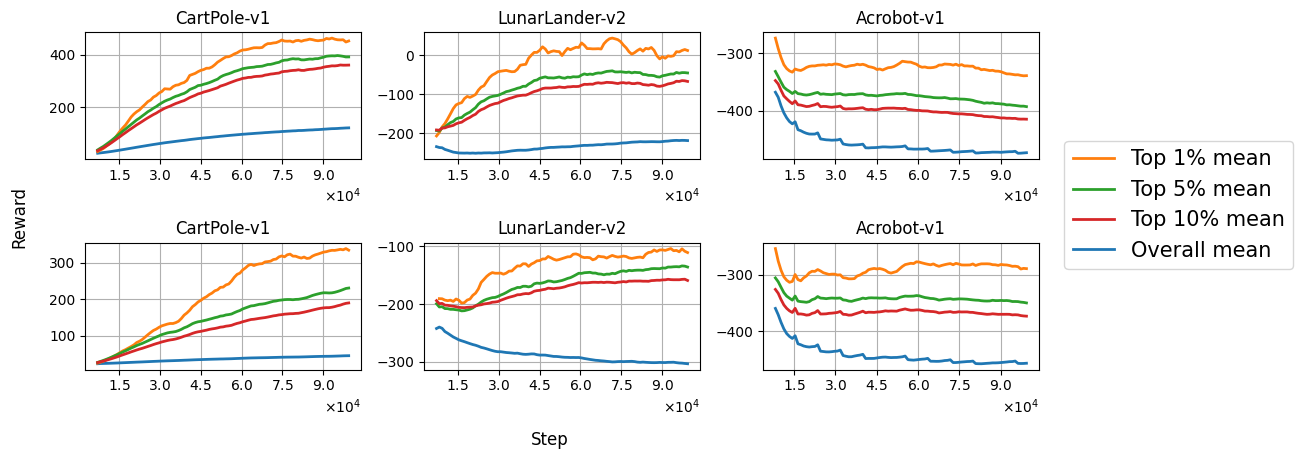

In [426]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Process and plot data
file_configs = [
    {'file': './data_2/samples_cartpole_elbe_exp_5.csv', 'data_dir': 'data_samples_cartpole_elbe_exp_5', 'prefix': 'randsearch_samples_cartpole_elbe_exp_5', 'threshold': 0, 'title': 'CartPole-v1'},
    {'file': './data_2/samples_lunar_elbe_exp_5.csv', 'data_dir': 'data_samples_lunar_elbe_exp_5', 'prefix': 'randsearch_samples_lunar_elbe_exp_5', 'threshold': -1000, 'title': 'LunarLander-v2'},
    {'file': './data_2/samples_acro_elbe_exp_5.csv', 'data_dir': 'data_samples_acro_elbe_exp_5', 'prefix': 'randsearch_samples_acro_elbe_exp_5', 'threshold': -500, 'title': 'Acrobot-v1'},
    {'file': './data_2/samples_cartpole_saddle_exp_5.csv', 'data_dir': 'data_samples_cartpole_saddle_exp_5', 'prefix': 'randsearch_samples_cartpole_saddle_exp_5', 'threshold': 0, 'title': 'CartPole-v1'},
    {'file': './data_2/samples_lunar_saddle_exp_5.csv', 'data_dir': 'data_samples_lunar_saddle_exp_5', 'prefix': 'randsearch_samples_lunar_saddle_exp_5', 'threshold': -1000, 'title': 'LunarLander-v2'},
    {'file': './data_2/samples_acro_saddle_exp_5.csv', 'data_dir': 'data_samples_acro_saddle_exp_5', 'prefix': 'randsearch_samples_acro_saddle_exp_5', 'threshold': -500, 'title': 'Acrobot-v1'},

]

fig = plt.figure(figsize=(12, 6))  # Adjust figsize as needed
gs = GridSpec(3, 3, height_ratios=[1, 1, 1], width_ratios=[1, 1, 1])

ax_positions = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]
axes = [fig.add_subplot(gs[pos]) for pos in ax_positions]

all_handles = []
all_labels = []

for config, ax in zip(file_configs, axes):
    df, quantile_dfs = process_file(config['file'], config['data_dir'], config['prefix'], config['threshold'])
    plot_rewards(ax, [df] + quantile_dfs, config['data_dir'], config['prefix'])
    ax.set_title(config['title'])
    
    handles, labels = ax.get_legend_handles_labels()
    all_handles.extend(handles)
    all_labels.extend(labels)

# Set common labels
fig.text(0.43, 0.25, 'Step', ha='center', fontsize=12)
fig.text(-0.02, 0.63, 'Reward', va='center', rotation='vertical', fontsize=12)

# Create ordered legend
unique_labels = ["Top 1% mean", "Top 5% mean", "Top 10% mean", "Overall mean"]
unique_handles = [all_handles[all_labels.index(label)] for label in unique_labels if label in all_labels]

fig.legend(unique_handles, unique_labels, loc='center left', bbox_to_anchor=(0.85, 0.65), fontsize=15)

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust rect to make space for the legend
plt.show()

### Experiment-5: Frequency of parameter choices in top 10% configurations

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fal

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fal

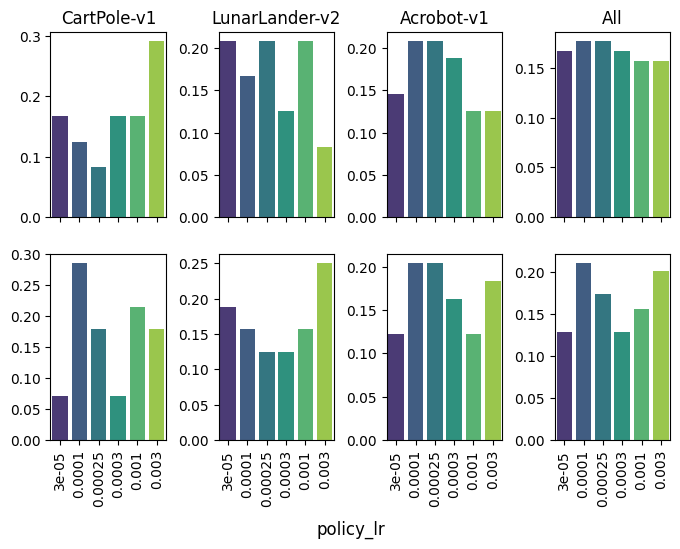

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fal

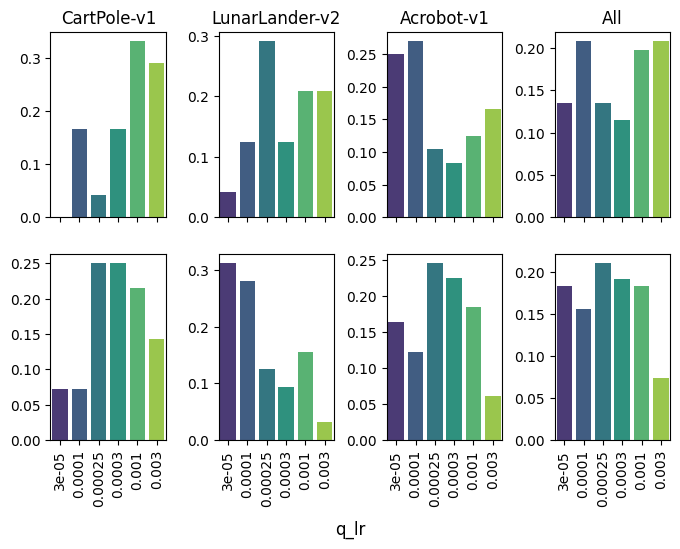

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fal

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fal

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fal

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fal

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fal

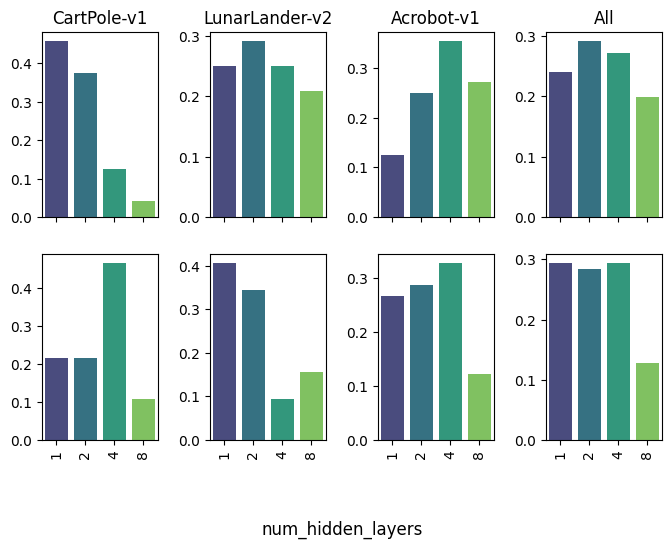

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fal

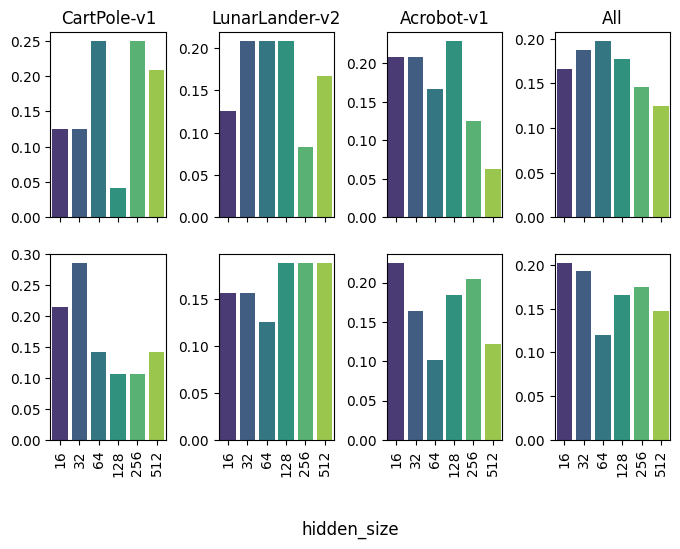

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fal

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fal

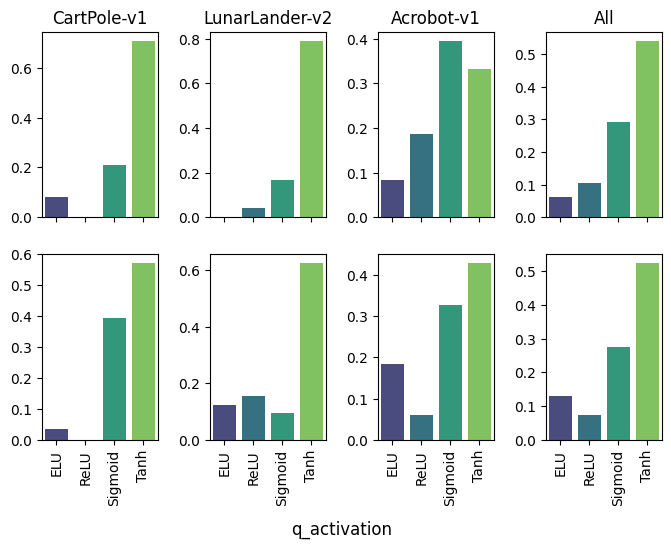

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fal

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fal

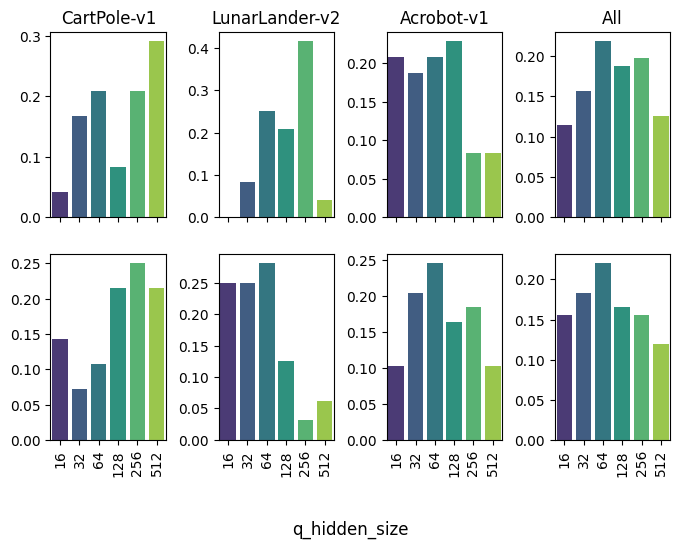

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fal

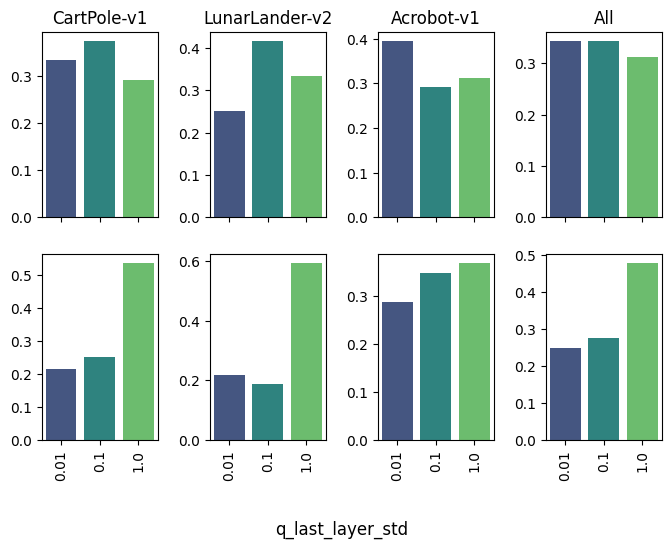

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[parameter] = pd.Categorical(df[parameter], categories=order)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

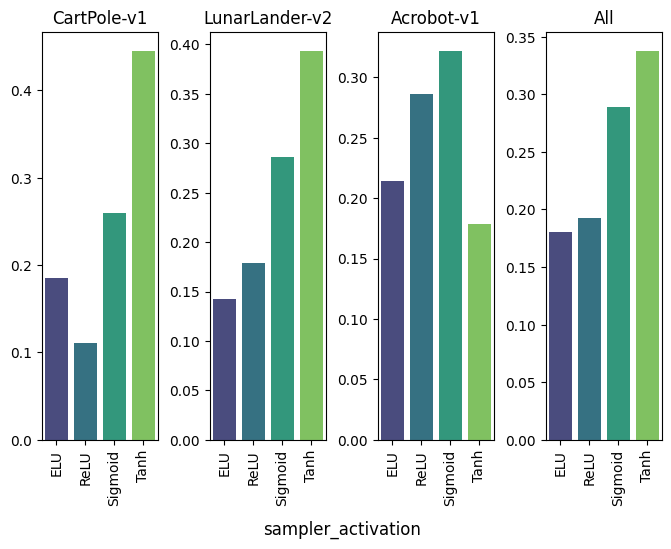

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[parameter] = pd.Categorical(df[parameter], categories=order)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

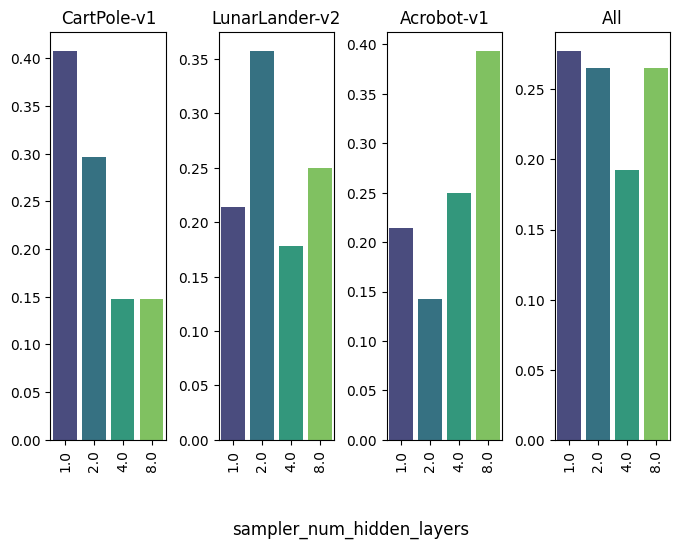

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[parameter] = pd.Categorical(df[parameter], categories=order)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

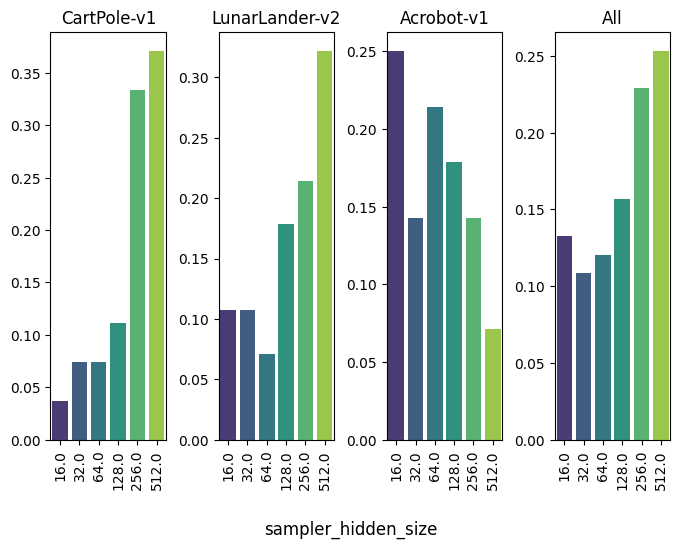

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fal

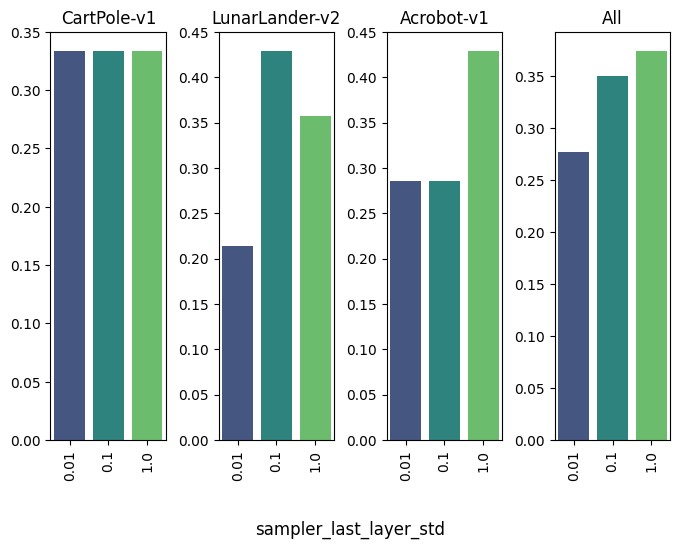

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2835241544.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fal

In [427]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_frames = []

for config in file_configs:
    df = pd.read_csv(config['file'])
    df = process_dataframe(df, config['data_dir'], config['prefix'], config['threshold'])    
    threshold_value = df['mean_reward'].quantile(0.95)    
    df = df[df['mean_reward'] >= threshold_value]
    data_frames.append({'df': df, 'title': config['title']})

parameters = [
    'alpha', 'policy_lr', 'q_lr', 'anneal_lr', 
    'beta', 'layer_init', 'policy_activation', 'num_hidden_layers',
    'hidden_size', 'actor_last_layer_std', 'q_activation', 'q_num_hidden_layers',
    'q_hidden_size', 'q_last_layer_std', 'sampler_activation', 'sampler_num_hidden_layers',
    'sampler_hidden_size', 'sampler_last_layer_std', 'parametrized_sampler'
]

def get_grid_size(parameter):
    if parameter in ['beta', 'parametrized_sampler','sampler_activation', 'sampler_num_hidden_layers', 'sampler_hidden_size', 'sampler_last_layer_std']:
        return 1, 4
    else:
        return 2, 4

unique_values = {}
for parameter in parameters:
    unique_values[parameter] = sorted(
        pd.concat([df['df'][parameter] for df in data_frames if parameter in df['df'].columns])
        .dropna().unique()
    )

for parameter in parameters:
    rows, cols = get_grid_size(parameter)
    fig, axes = plt.subplots(rows, cols, figsize=(8, 6))

    if rows == 1:
        data_frames_to_plot = data_frames[-(cols-1):]
    else:
        data_frames_to_plot = data_frames

    order = unique_values[parameter]
    all_elbe = []
    all_saddle = []

    for i, data in enumerate(data_frames_to_plot):    
        df = data['df']

        if parameter not in df.columns:
            continue
        
        if df[parameter].dtype == bool and parameter != 'parametrized_sampler':
            df[parameter] = df[parameter].astype(str)
            order = sorted(df[parameter].unique())

        if parameter in ['sampler_hidden_size', 'sampler_num_hidden_layers', 'sampler_activation']:
            df = df[df['parametrized_sampler']==True]
            

        ax = axes[i // (cols-1), i % (cols-1)] if rows > 1 else axes[i % (cols-1)]
        df[parameter] = pd.Categorical(df[parameter], categories=order)
        sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
        if rows > 1:
            if i <3:
                all_elbe.append(df[parameter].dropna().reset_index(drop=True))
            else:
                all_saddle.append(df[parameter].dropna().reset_index(drop=True))
        else:
            all_saddle.append(df[parameter].dropna().reset_index(drop=True))

        if rows == 1 or i < cols-1:
            ax.set_title(data['title'])
        
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.tick_params(axis='x', rotation=90)
        
        if i // (cols-1) != rows - 1:
            ax.set_xticklabels([])

    if rows > 1:
        all_elbe = pd.concat(all_elbe)
        ax = axes[0, -1]
        sns.countplot(ax=ax, x=all_elbe, order=order, stat='proportion', legend=False, palette='viridis')
        ax.tick_params(axis='x', rotation=90)
        ax.set_xlabel('')
        ax.set_ylabel('')

    all_saddle = pd.concat(all_saddle)
    ax = axes[-1] if rows == 1 else axes[-1, -1]
    sns.countplot(ax=ax, x=all_saddle,order=order, stat='proportion', legend=False, palette='viridis')
    ax.tick_params(axis='x', rotation=90)
    ax.set_xlabel('')
    ax.set_ylabel('')

    if rows == 1:
        axes[3].set_title('All')
    else:
        axes[0, -1].set_title('All')
        axes[0, -1].set_xticklabels([])

    if parameter == 'layer_init': 
        plt.subplots_adjust(bottom=0.28, wspace=0.45)
        plt.text(0.5, 0.04, f"{parameter}", ha='center', va='center', transform=fig.transFigure, fontsize=12) 
    else:
        plt.subplots_adjust(bottom=0.2, wspace=0.45)  
        plt.text(0.5, 0.05, f"{parameter}", ha='center', va='center', transform=fig.transFigure, fontsize=12)
    
    plot_filename = os.path.join(plots_dir, f"experiment_5_distribution_plot_{parameter}.png")
    plt.savefig(plot_filename)
    plt.show()
    plt.close()

### Experiment-5: Parameter Distributions

In [428]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_frames = []

for config in file_configs:
    df = pd.read_csv(config['file'])
    df = process_dataframe(df, config['data_dir'], config['prefix'], config['threshold'])
    data_frames.append({'df': df, 'dir': config['data_dir'], 'prefix': config['prefix'], 'title': config['title']})

parameters = [
    'alpha', 'policy_lr', 'q_lr', 'anneal_lr', 
    'beta', 'layer_init', 'policy_activation', 'num_hidden_layers',
    'hidden_size', 'actor_last_layer_std', 'q_activation', 'q_num_hidden_layers',
    'q_hidden_size', 'q_last_layer_std', 'sampler_activation', 'sampler_num_hidden_layers',
    'sampler_hidden_size', 'sampler_last_layer_std', 'parametrized_sampler'
]

def get_grid_size(parameter):
    if parameter in ['parametrized_sampler','sampler_activation', 'sampler_num_hidden_layers', 'sampler_hidden_size', 'sampler_last_layer_std', 'beta']:
        return 1, 3 
    else:
        return 2, 3

for parameter in parameters:
    rows, cols = get_grid_size(parameter)
    fig, axes = plt.subplots(rows, cols, figsize=(6, 6))
    norm_dfs = []

    if rows == 1:
        data_frames_to_plot = data_frames[-cols:]
    else:
        data_frames_to_plot = data_frames

    for i, data in enumerate(data_frames_to_plot):
        df = data['df']
        if parameter not in df.columns:
            continue
        
        parameter_values = sorted(df[parameter].dropna().unique())
        if df[parameter].dtype == bool:
            df[parameter] = df[parameter].astype(str)
            parameter_values = sorted(df[parameter].dropna().unique())

        all_reward_distributions = []

        for value in parameter_values:
            subset_df = df[df[parameter] == value]

            reward_distributions = []

            for index, row in subset_df.iterrows():
                csv_path = os.path.join(data['dir'], f'{data["prefix"]}_{row["index"]}.csv')
                if os.path.exists(csv_path):
                    rewards = pd.read_csv(csv_path)
                    reward_distributions.append(rewards['Reward'].values.flatten())
                else:
                    print(f"File not found: {csv_path}")

            reward_distributions = [item for sublist in reward_distributions for item in sublist]
            all_reward_distributions.append(reward_distributions)
        
        if rows == 1:
            ax = axes[i % cols]
        else:
            ax = axes[i // cols, i % cols]

        box_plot = sns.boxplot(data=pd.DataFrame(all_reward_distributions, index=parameter_values).T.dropna(), ax=ax, palette='viridis', showfliers=False, boxprops=dict(edgecolor='none'))
        
        if rows == 1 or i < cols:
            ax.set_title(data['title'])
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.xaxis.set_tick_params(rotation=90)
    
    if rows == 1:
        axes[1].set_xlabel(parameter, fontsize=12)
    else:
        axes[1, 1].set_xlabel(parameter, fontsize=12)

    fig.text(0.5, -0.04, parameter, ha='center', fontsize=12)
    plt.xticks(rotation=90)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plot_filename = os.path.join(plots_dir, f"experiment_5_boxplot_{parameter}.png")
    plt.savefig(plot_filename)
    plt.close()

### Experiment-5: 95th percentile of mean_rewards

In [429]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plots_dir = "plots"
os.makedirs(plots_dir, exist_ok=True)

data_frames = []

for config in file_configs:
    df = pd.read_csv(config['file'])
    df = process_dataframe(df, config['data_dir'], config['prefix'], config['threshold'])
    data_frames.append({'df': df, 'dir': config['data_dir'], 'prefix': config['prefix'], 'title': config['title']})

parameters = [
    'alpha', 'policy_lr', 'q_lr', 'anneal_lr', 
    'beta', 'layer_init', 'policy_activation', 'num_hidden_layers',
    'hidden_size', 'actor_last_layer_std', 'q_activation', 'q_num_hidden_layers',
    'q_hidden_size', 'q_last_layer_std', 'sampler_activation', 'sampler_num_hidden_layers',
    'sampler_hidden_size', 'sampler_last_layer_std', 'parametrized_sampler'
]

def get_grid_size(parameter):
    if parameter in ['beta', 'parametrized_sampler','sampler_activation', 'sampler_num_hidden_layers', 'sampler_hidden_size', 'sampler_last_layer_std']:
        return 1, 3
    else:
        return 2, 3

unique_values = {}
for parameter in parameters:
    unique_values[parameter] = sorted(
        pd.concat([df['df'][parameter] for df in data_frames if parameter in df['df'].columns])
        .dropna().unique()
    )

for parameter in parameters:
    rows, cols = get_grid_size(parameter)
    fig, axes = plt.subplots(rows, cols, figsize=(6, 6))

    if rows == 1:
        data_frames_to_plot = data_frames[-(cols):]
    else:
        data_frames_to_plot = data_frames

    order = unique_values[parameter]
    all_elbe = []
    all_saddle = []
    
    for i, data in enumerate(data_frames_to_plot):
        df = data['df']

        if parameter not in df.columns:
            continue

        if df[parameter].dtype == bool and parameter != 'parametrized_sampler':
            df[parameter] = df[parameter].astype(str)

        if parameter in ['sampler_hidden_size', 'sampler_num_hidden_layers', 'sampler_activation']:
            df = df[df['parametrized_sampler']==True]
        
        ax = axes[i // cols, i % (cols)] if rows > 1 else axes[i % (cols)]

        parameter_percentile = df.groupby(parameter)['mean_reward'].quantile(0.95).reset_index()
        sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
        ax.tick_params(axis='x', rotation=90)

        ax.set_xlabel('')
        ax.set_ylabel('')
        if i // (cols) != rows-1 and rows > 1:
            ax.set_xticklabels([])

        if rows == 1 or i < cols:
            ax.set_title(data['title'])
            
    if rows == 1:
        axes[1].set_xlabel(parameter, fontsize=12)
    else:
        axes[1, 1].set_xlabel(parameter, fontsize=12)

    plt.tight_layout()
    plot_filename = os.path.join(plots_dir, f"experiment_5_95th_percentile_{parameter}.png")
    plt.savefig(plot_filename)
    plt.close()


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/1315476597.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/1315476597.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/1315476597.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.

### Best Runs

Rewards calculated: 0      (18.9979440322037, 17.427802403767902)
1                              (-2000, -2000)
2                              (-2000, -2000)
3                              (-2000, -2000)
4    (21.642294146350984, 20.135241826375324)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0                               (-2000, -2000)
1                               (-2000, -2000)
2                               (-2000, -2000)
3    (-218.32310048739114, -206.0671590169271)
4    (-253.83004436951734, -285.2322082519531)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0                (-484.20163042583164, -500.0)
1                 (-492.9573717753093, -500.0)
2    (-322.5025035657381, -285.22222391764325)
3     (-411.5406765954895, -416.7999979654948)
4                (-494.62264150943395, -487.5)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0    (104.55567882642713, 210.21153767903647)
1     (18.621463306990684, 16.22634983062744)
2      (52.33450625442558, 81.59786224365234)
3                              (-2000, -2000)
4                              (-2000, -2000)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0                                (-2000, -2000)
1                                (-2000, -2000)
2                                (-2000, -2000)
3    (-168.67601091888352, -124.85921732584636)
4      (-414.7295340574074, -408.6401774088542)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0    (-442.65313146868317, -445.6666666666667)
1    (-395.28379795286384, -461.5833333333333)
2     (-483.8006320529513, -486.2857142857143)
3     (-384.6065076338376, -395.6243387858073)
4                               (-2000, -2000)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Text(0.04, 0.63, 'Reward')

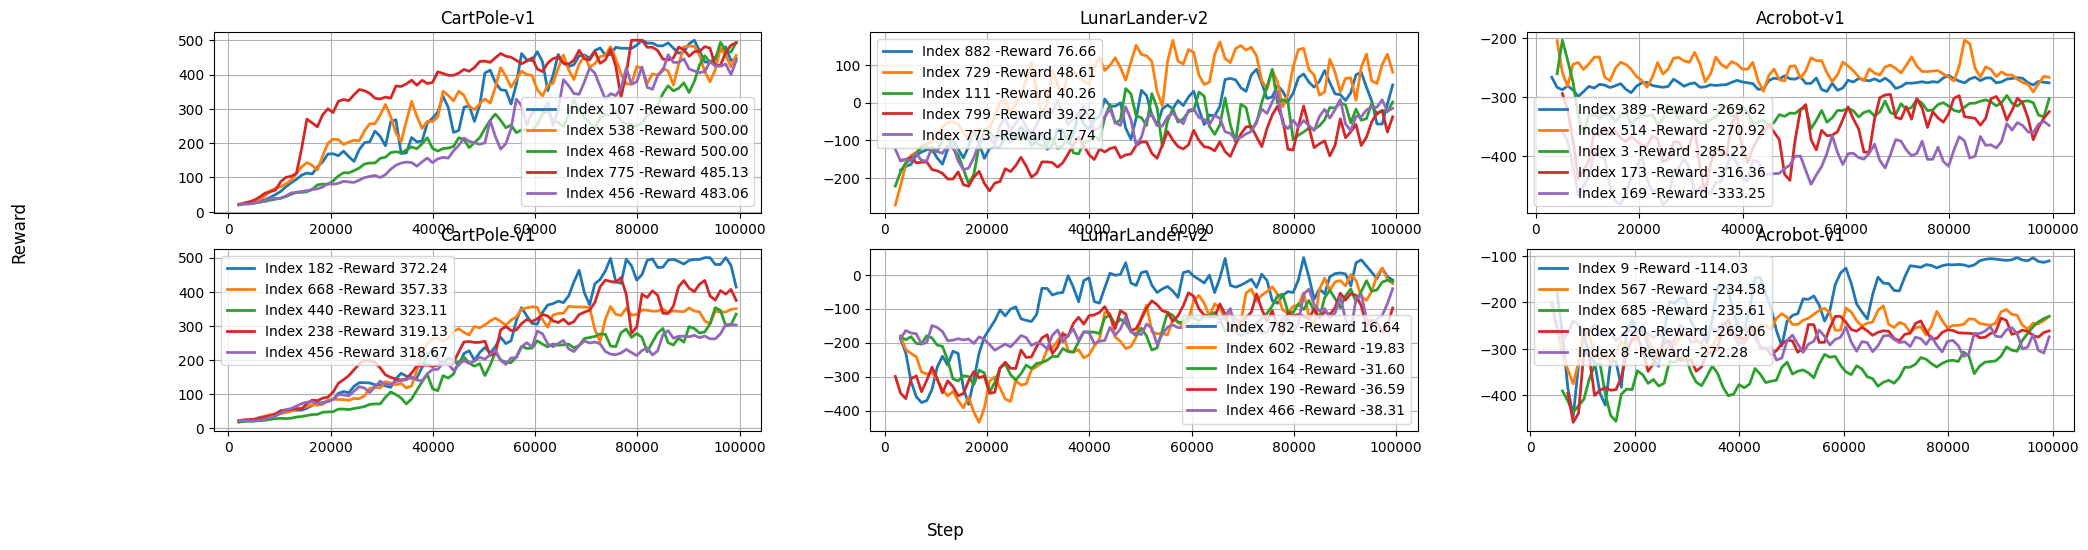

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

In [430]:
fig = plt.figure(figsize=(24, 8))  # Adjust figsize as needed
gs = GridSpec(3, 3, height_ratios=[1, 1, 1], width_ratios=[1, 1, 1])

ax_positions = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]
axes = [fig.add_subplot(gs[pos]) for pos in ax_positions]

all_handles = []
all_labels = []

for config, ax in zip(file_configs, axes):
    df, _ = process_file(config['file'], config['data_dir'], config['prefix'], config['threshold'])
    # Identify the top 5 configurations based on the highest mean rewards
    top_5_runs = df.nlargest(5, 'last_reward')

    # Initialize the plot
    plt.figure(figsize=(8, 4))

    # Iterate through each of the top 5 configurations and plot their reward curves
    for _, row in top_5_runs.iterrows():
        path = os.path.join('./' + config['data_dir'], f"{config['prefix']}_{row['index']}.csv")
        if not os.path.exists(path):
            print(f"File not found: {path}")
            continue
        rewards_df = pd.read_csv(path)
        
        # Calculate average reward and rolling average reward
        average_reward = rewards_df.groupby('Step')['Reward'].mean()
        rolling_average = average_reward.rolling(window=2).mean()
        
        # Plot the reward curves
        ax.plot(rolling_average.index, rolling_average, label=f'Index {row["index"]} -Reward {row["last_reward"]:.2f}', linewidth=2)
        ax.set_title(config['title'])
        ax.grid(True)
        ax.legend()
fig.text(0.43, 0.25, 'Step', ha='center', fontsize=12)
fig.text(0.04, 0.63, 'Reward', va='center', rotation='vertical', fontsize=12)

## Experiment 6

### Experiment-6 : Percentile performance

Rewards calculated: 0    (160.75130083825854, 254.4259287516276)
1    (86.99539409743416, 118.87774658203124)
2    (75.59050476983423, 110.31666564941406)
3    (123.4974194621712, 197.69590759277344)
4      (88.33121272775998, 91.9880952835083)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0                                (-2000, -2000)
1    (-254.48049041959976, -214.15531412760416)
2                                (-2000, -2000)
3                                (-2000, -2000)
4                                (-2000, -2000)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0    (-388.12669483129525, -423.3333333333333)
1    (-434.9778029123942, -491.73333740234375)
2                               (-2000, -2000)
3                               (-2000, -2000)
4                             (-500.0, -500.0)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0    (127.08574068546295, 145.69407653808594)
1    (39.353689831138674, 16.567901611328125)
2                              (-2000, -2000)
3                              (-2000, -2000)
4     (67.45990294880336, 106.78240712483723)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0    (-356.5002389483982, -347.18675231933594)
1    (-406.0685907469856, -479.16595458984375)
2                               (-2000, -2000)
3      (-518.640281873127, -572.8167588975695)
4    (-205.1354745531839, -194.06468709309897)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0      (-374.7796615708803, -464.2222188313802)
1                 (-434.59488599177257, -500.0)
2                                (-2000, -2000)
3                                (-2000, -2000)
4    (-170.09882071358817, -197.81817626953125)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

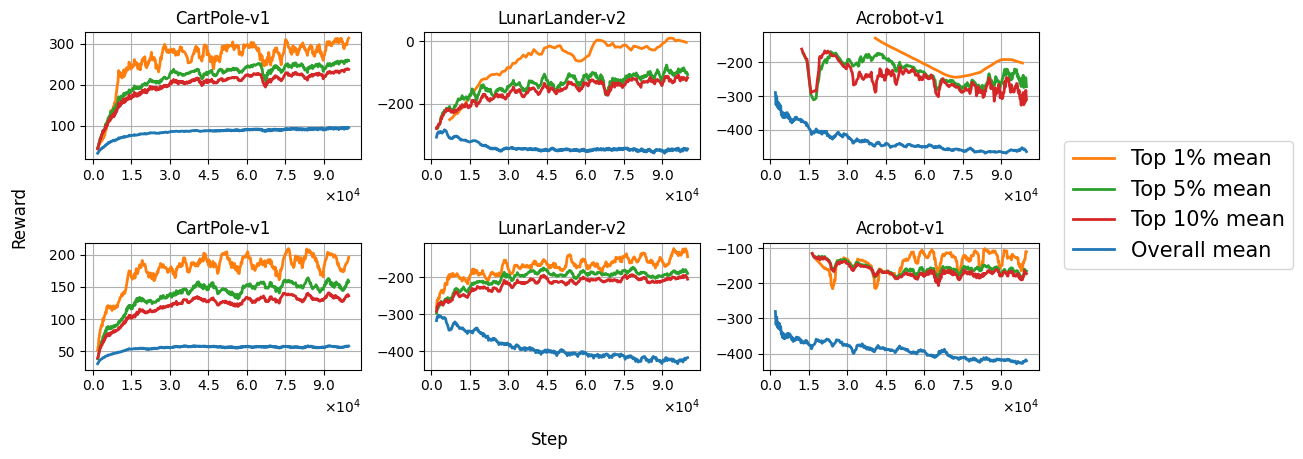

In [431]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Process and plot data
file_configs = [
    {'file': './data_2/samples_cartpole_elbe_exp_6.csv', 'data_dir': 'data_samples_cartpole_elbe_exp_6', 'prefix': 'randsearch_samples_cartpole_elbe_exp_6', 'threshold': 0, 'title': 'CartPole-v1'},
    {'file': './data_2/samples_lunar_elbe_exp_6.csv', 'data_dir': 'data_samples_lunar_elbe_exp_6', 'prefix': 'randsearch_samples_lunar_elbe_exp_6', 'threshold': -1000, 'title': 'LunarLander-v2'},
    {'file': './data_2/samples_acro_elbe_exp_6.csv', 'data_dir': 'data_samples_acro_elbe_exp_6', 'prefix': 'randsearch_samples_acro_elbe_exp_6', 'threshold': -500, 'title': 'Acrobot-v1'},
    {'file': './data_2/samples_cartpole_saddle_exp_6.csv', 'data_dir': 'data_samples_cartpole_saddle_exp_6', 'prefix': 'randsearch_samples_cartpole_saddle_exp_6', 'threshold': 0, 'title': 'CartPole-v1'},
    {'file': './data_2/samples_lunar_saddle_exp_6.csv', 'data_dir': 'data_samples_lunar_saddle_exp_6', 'prefix': 'randsearch_samples_lunar_saddle_exp_6', 'threshold': -1000, 'title': 'LunarLander-v2'},
    {'file': './data_2/samples_acro_saddle_exp_6.csv', 'data_dir': 'data_samples_acro_saddle_exp_6', 'prefix': 'randsearch_samples_acro_saddle_exp_6', 'threshold': -500, 'title': 'Acrobot-v1'},
]

fig = plt.figure(figsize=(12, 6))  # Adjust figsize as needed
gs = GridSpec(3, 3, height_ratios=[1, 1, 1], width_ratios=[1, 1, 1])

ax_positions = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]
axes = [fig.add_subplot(gs[pos]) for pos in ax_positions]

all_handles = []
all_labels = []

for config, ax in zip(file_configs, axes):
    df, quantile_dfs = process_file(config['file'], config['data_dir'], config['prefix'], config['threshold'])
    plot_rewards(ax, [df] + quantile_dfs, config['data_dir'], config['prefix'])
    ax.set_title(config['title'])
    
    handles, labels = ax.get_legend_handles_labels()
    all_handles.extend(handles)
    all_labels.extend(labels)

# Set common labels
fig.text(0.43, 0.25, 'Step', ha='center', fontsize=12)
fig.text(-0.02, 0.63, 'Reward', va='center', rotation='vertical', fontsize=12)

# Create ordered legend
unique_labels = ["Top 1% mean", "Top 5% mean", "Top 10% mean", "Overall mean"]
unique_handles = [all_handles[all_labels.index(label)] for label in unique_labels if label in all_labels]

fig.legend(unique_handles, unique_labels, loc='center left', bbox_to_anchor=(0.85, 0.65), fontsize=15)

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

### Experiment-6: Frequency of parameter choices in top 10% configurations

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2431799173.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[parameter] = pd.Categorical(df[parameter], categories=order)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2431799173.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2431799173.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.1

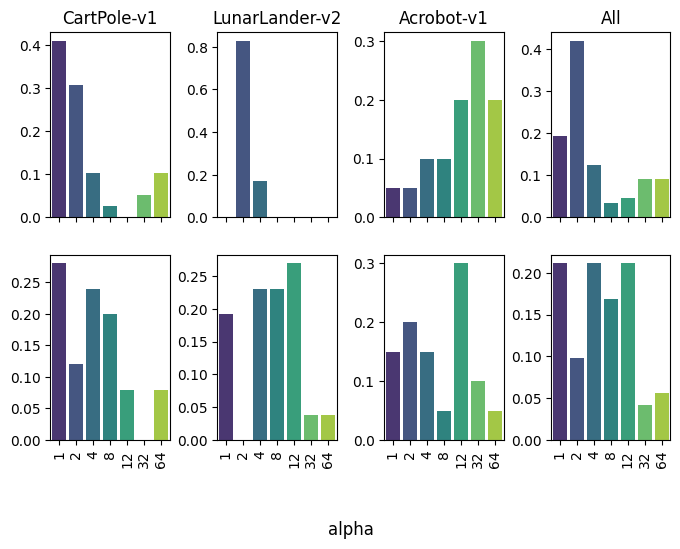

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2431799173.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[parameter] = pd.Categorical(df[parameter], categories=order)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2431799173.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2431799173.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.1

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2431799173.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[parameter] = pd.Categorical(df[parameter], categories=order)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2431799173.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2431799173.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.1

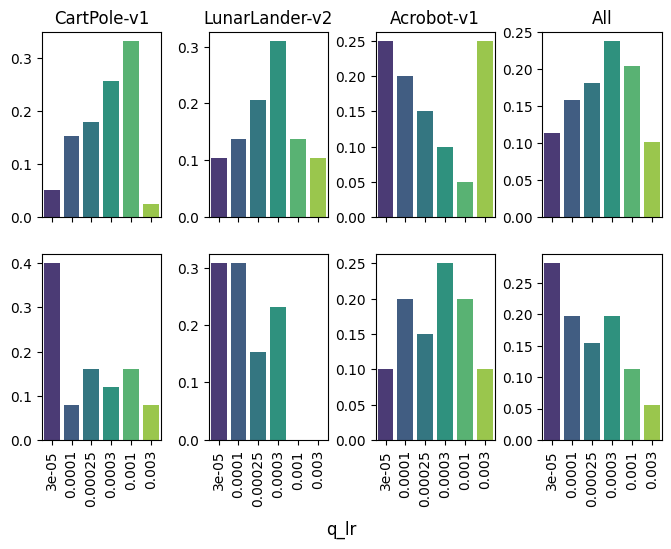

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2431799173.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[parameter] = pd.Categorical(df[parameter], categories=order)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2431799173.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2431799173.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.1

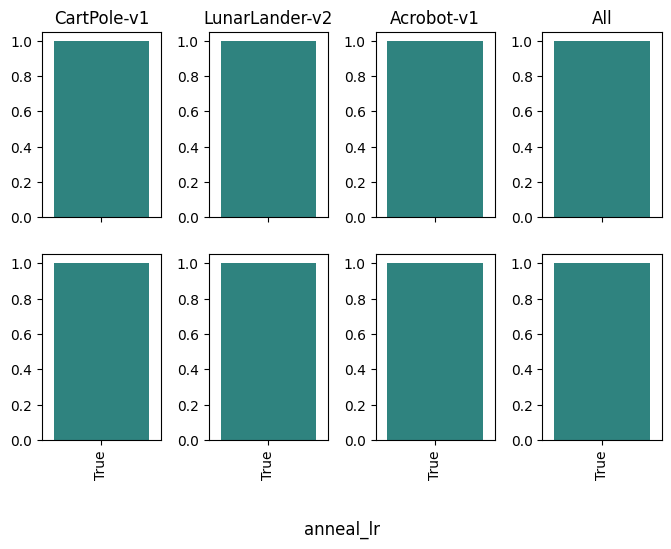

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2431799173.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[parameter] = pd.Categorical(df[parameter], categories=order)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2431799173.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2431799173.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

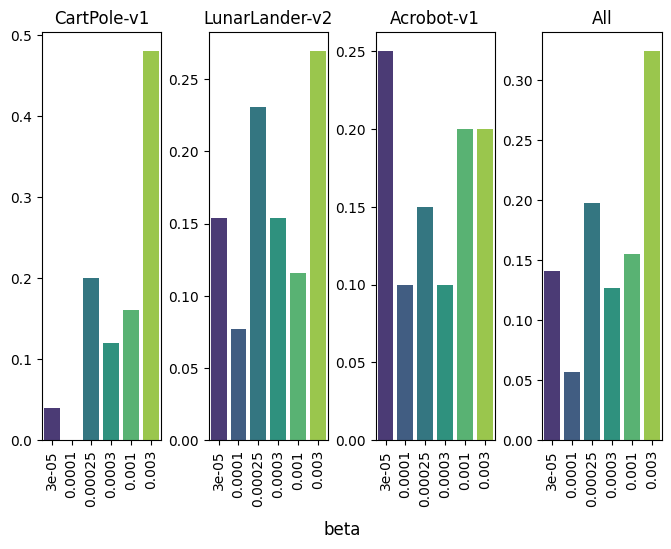

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2431799173.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[parameter] = pd.Categorical(df[parameter], categories=order)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2431799173.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2431799173.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

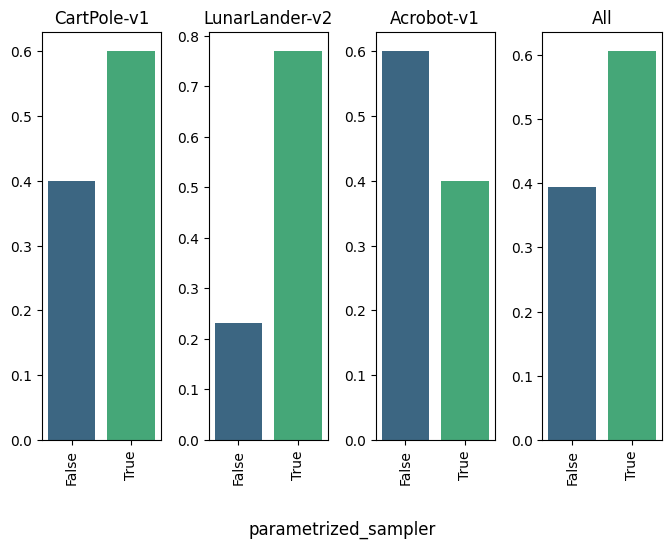

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2431799173.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[parameter] = pd.Categorical(df[parameter], categories=order)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2431799173.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2431799173.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.1

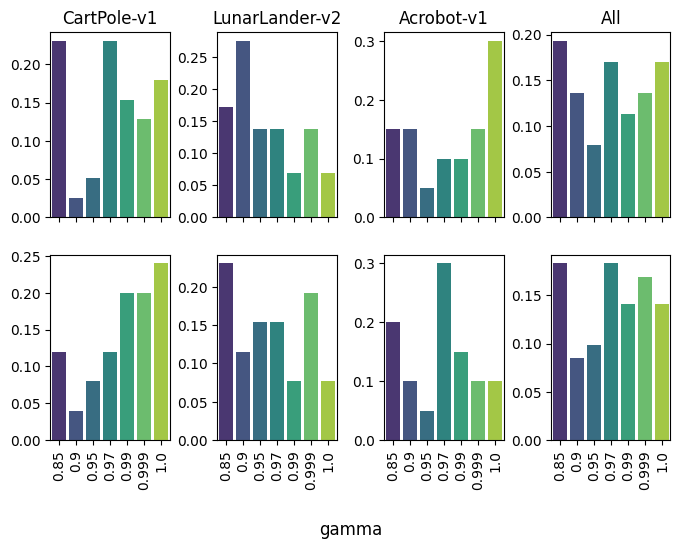

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2431799173.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[parameter] = pd.Categorical(df[parameter], categories=order)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2431799173.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2431799173.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.1

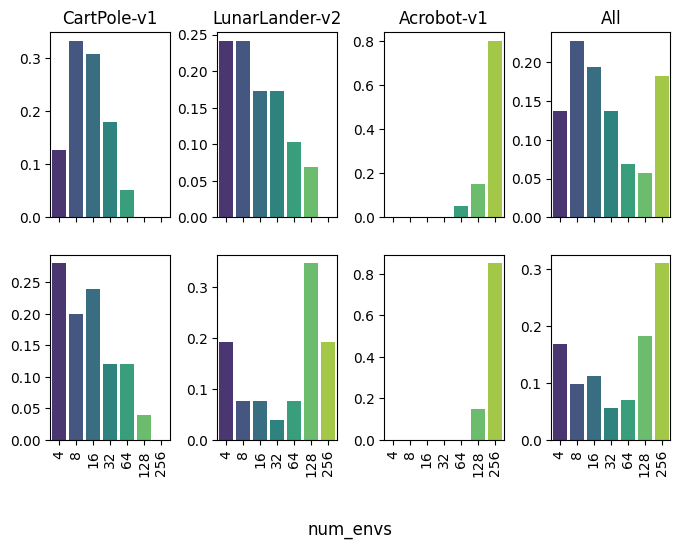

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2431799173.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[parameter] = pd.Categorical(df[parameter], categories=order)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2431799173.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2431799173.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.1

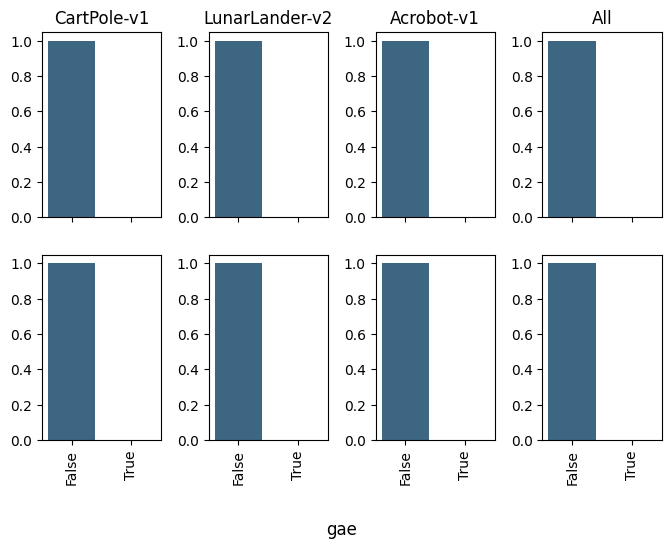

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2431799173.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[parameter] = pd.Categorical(df[parameter], categories=order)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2431799173.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2431799173.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.1

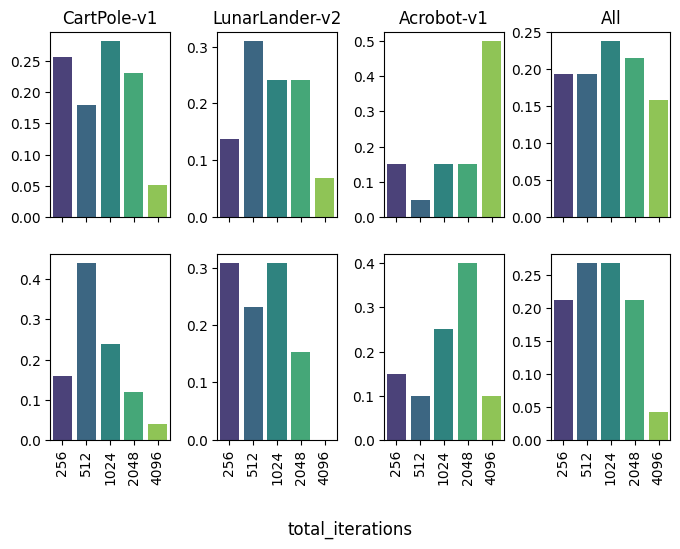

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2431799173.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[parameter] = pd.Categorical(df[parameter], categories=order)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2431799173.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2431799173.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.1

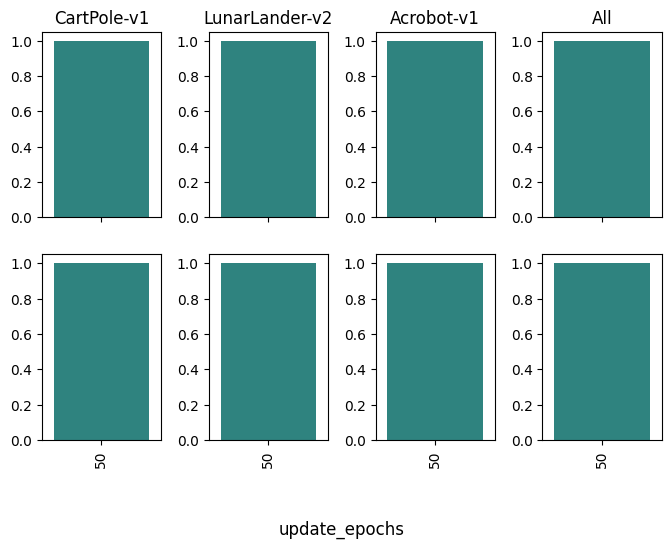

In [432]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_frames = []

for config in file_configs:
    df = pd.read_csv(config['file'])
    df = process_dataframe(df, config['data_dir'], config['prefix'], config['threshold'])    
    threshold_value = df['mean_reward'].quantile(0.95)    
    df = df[df['mean_reward'] >= threshold_value]
    data_frames.append({'df': df, 'title': config['title']})

parameters = [
    'alpha', 'policy_lr', 'q_lr', 'anneal_lr', 
    'beta', 'parametrized_sampler', 'gamma',
    'num_envs', 'gae', 'total_iterations', 'update_epochs'
]

def get_grid_size(parameter):
    if parameter in ['beta', 'parametrized_sampler','sampler_activation', 'sampler_num_hidden_layers', 'sampler_hidden_size', 'sampler_last_layer_std']:
        return 1, 4
    else:
        return 2, 4

unique_values = {}
for parameter in parameters:
    unique_values[parameter] = sorted(
        pd.concat([df['df'][parameter] for df in data_frames if parameter in df['df'].columns])
        .dropna().unique()
    )

for parameter in parameters:
    rows, cols = get_grid_size(parameter)
    fig, axes = plt.subplots(rows, cols, figsize=(8, 6))

    if rows == 1:
        data_frames_to_plot = data_frames[-(cols-1):]
    else:
        data_frames_to_plot = data_frames

    order = unique_values[parameter]
    all_elbe = []
    all_saddle = []

    for i, data in enumerate(data_frames_to_plot):    
        df = data['df']

        if parameter not in df.columns:
            continue
        if df[parameter].dtype == bool and parameter != 'gae':
            df[parameter] = df[parameter].astype(str)
            order = sorted(df[parameter].unique())


        df = df[df['gae']==False]
        

        ax = axes[i // (cols-1), i % (cols-1)] if rows > 1 else axes[i % (cols-1)]
        df[parameter] = pd.Categorical(df[parameter], categories=order)
        sns.countplot(ax=ax, x=df[parameter].dropna(), order=order, palette='viridis', stat='proportion', legend=False)
        if rows > 1:
            if i <3:
                all_elbe.append(df[parameter].dropna().reset_index(drop=True))
            else:
                all_saddle.append(df[parameter].dropna().reset_index(drop=True))
        else:
            all_saddle.append(df[parameter].dropna().reset_index(drop=True))

        if rows == 1 or i < cols-1:
            ax.set_title(data['title'])
        
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.tick_params(axis='x', rotation=90)
        
        if i // (cols-1) != rows - 1:
            ax.set_xticklabels([])

    if rows > 1:
        all_elbe = pd.concat(all_elbe)
        ax = axes[0, -1]
        sns.countplot(ax=ax, x=all_elbe, order=order, stat='proportion', legend=False, palette='viridis')
        ax.tick_params(axis='x', rotation=90)
        ax.set_xlabel('')
        ax.set_ylabel('')

    all_saddle = pd.concat(all_saddle)
    ax = axes[-1] if rows == 1 else axes[-1, -1]
    sns.countplot(ax=ax, x=all_saddle,order=order, stat='proportion', legend=False, palette='viridis')
    ax.tick_params(axis='x', rotation=90)
    ax.set_xlabel('')
    ax.set_ylabel('')

    if rows == 1:
        axes[3].set_title('All')
    else:
        axes[0, -1].set_title('All')
        axes[0, -1].set_xticklabels([])

    if parameter == 'layer_init': 
        plt.subplots_adjust(bottom=0.28, wspace=0.4)  
        plt.text(0.5, 0.04, f"{parameter}", ha='center', va='center', transform=fig.transFigure, fontsize=12) 
    else:
        plt.subplots_adjust(bottom=0.2, wspace=0.4)  
        plt.text(0.5, 0.05, f"{parameter}", ha='center', va='center', transform=fig.transFigure, fontsize=12)
    
    plot_filename = os.path.join(plots_dir, f"experiment_6_distribution_plot_{parameter}.png")
    plt.savefig(plot_filename)
    plt.show()
    plt.close()

### Experiment-6: Parameter Distributions

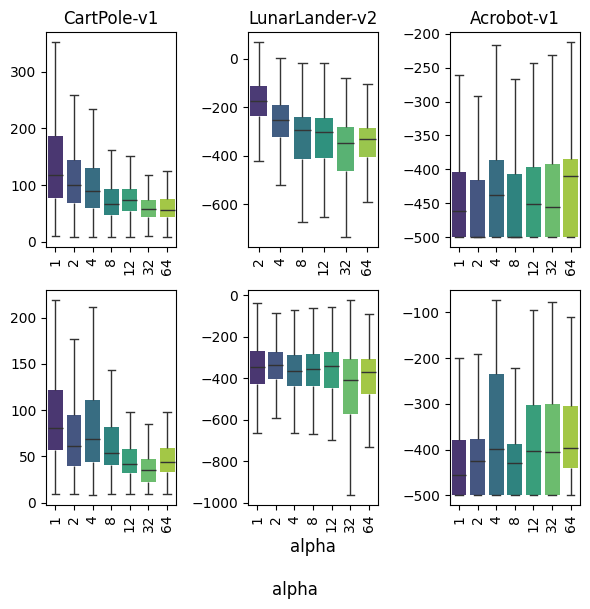

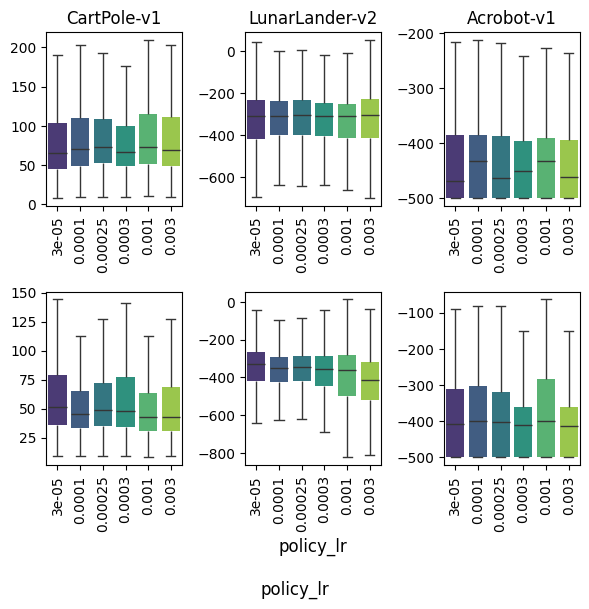

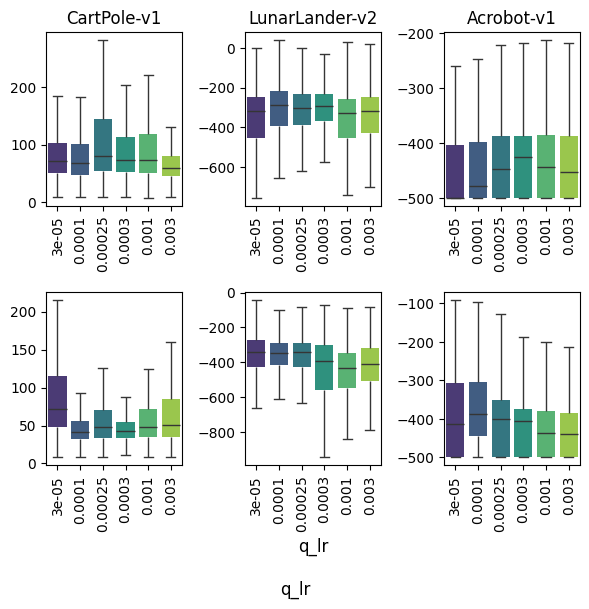

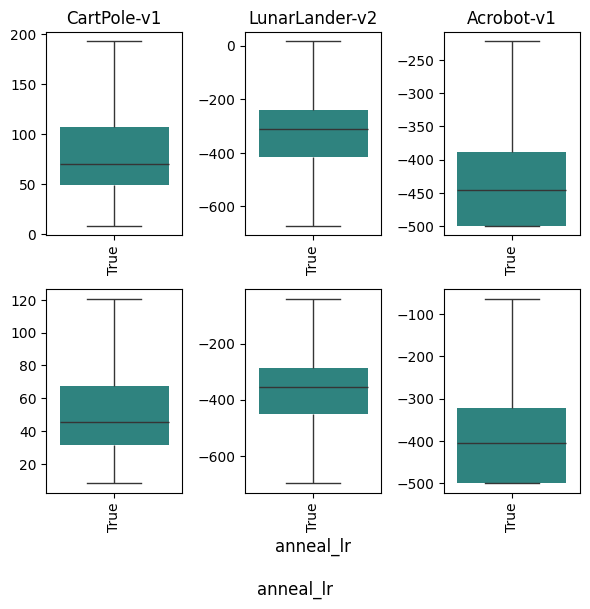

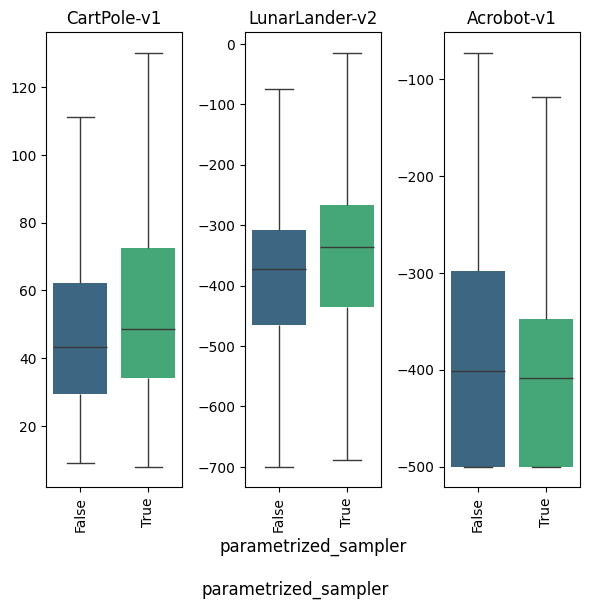

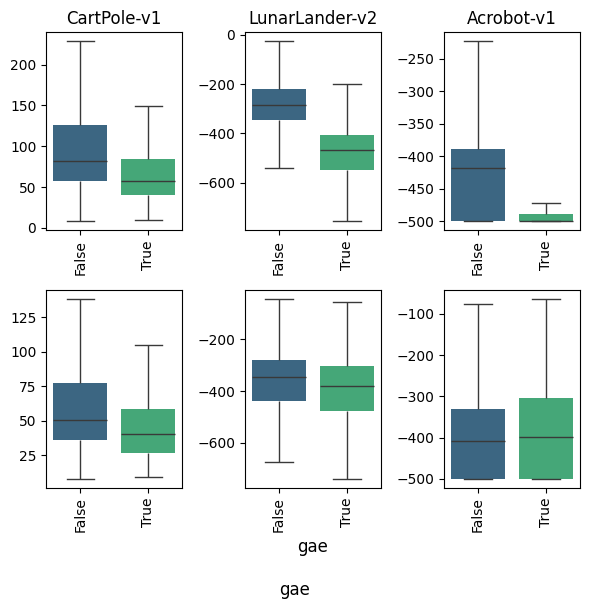

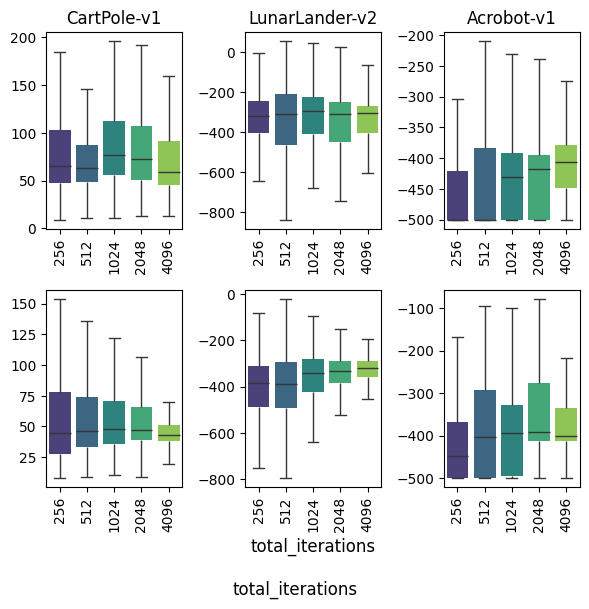

In [433]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_frames = []

for config in file_configs:
    df = pd.read_csv(config['file'])
    df = process_dataframe(df, config['data_dir'], config['prefix'], config['threshold'])
    data_frames.append({'df': df, 'dir': config['data_dir'], 'prefix': config['prefix'], 'title': config['title']})

parameters = [
    'alpha', 'policy_lr', 'q_lr', 'anneal_lr', 
    'beta', 'parametrized_sampler', 'gamma',
    'num_envs', 'gae', 'total_iterations',
]

def get_grid_size(parameter):
    if parameter in ['parametrized_sampler','sampler_activation', 'sampler_num_hidden_layers', 'sampler_hidden_size', 'sampler_last_layer_std', 'beta']:
        return 1, 3 
    else:
        return 2, 3

for parameter in parameters:
    rows, cols = get_grid_size(parameter)
    fig, axes = plt.subplots(rows, cols, figsize=(6, 6))
    norm_dfs = []

    if rows == 1:
        data_frames_to_plot = data_frames[-cols:]
    else:
        data_frames_to_plot = data_frames

    for i, data in enumerate(data_frames_to_plot):
        df = data['df']
        if parameter not in df.columns:
            continue
        
        parameter_values = sorted(df[parameter].dropna().unique())
        if df[parameter].dtype == bool:
            df[parameter] = df[parameter].astype(str)
            parameter_values = sorted(df[parameter].dropna().unique())

        all_reward_distributions = []

        for value in parameter_values:
            subset_df = df[df[parameter] == value]

            reward_distributions = []

            for index, row in subset_df.iterrows():
                csv_path = os.path.join(data['dir'], f'{data["prefix"]}_{row["index"]}.csv')
                if os.path.exists(csv_path):
                    rewards = pd.read_csv(csv_path)
                    reward_distributions.append(rewards['Reward'].values.flatten())
                else:
                    print(f"File not found: {csv_path}")

            reward_distributions = [item for sublist in reward_distributions for item in sublist]
            all_reward_distributions.append(reward_distributions)
        
        if rows == 1:
            ax = axes[i % cols]
        else:
            ax = axes[i // cols, i % cols]

        box_plot = sns.boxplot(data=pd.DataFrame(all_reward_distributions, index=parameter_values).T.dropna(), ax=ax, palette='viridis', showfliers=False, boxprops=dict(edgecolor='none'))
        
        if rows == 1 or i < cols:
            ax.set_title(data['title'])
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.xaxis.set_tick_params(rotation=90)
    
    if rows == 1:
        axes[1].set_xlabel(parameter, fontsize=12)
    else:
        axes[1, 1].set_xlabel(parameter, fontsize=12)

    fig.text(0.5, -0.04, parameter, ha='center', fontsize=12)
    plt.xticks(rotation=90)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plot_filename = os.path.join(plots_dir, f"experiment_6_boxplot_{parameter}.png")
    plt.savefig(plot_filename)
    plt.show()
    plt.close()


### Experiment-6: 95th percentile of mean_rewards

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2632182859.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2632182859.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2632182859.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2632182859.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2632182859.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2632182859.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.

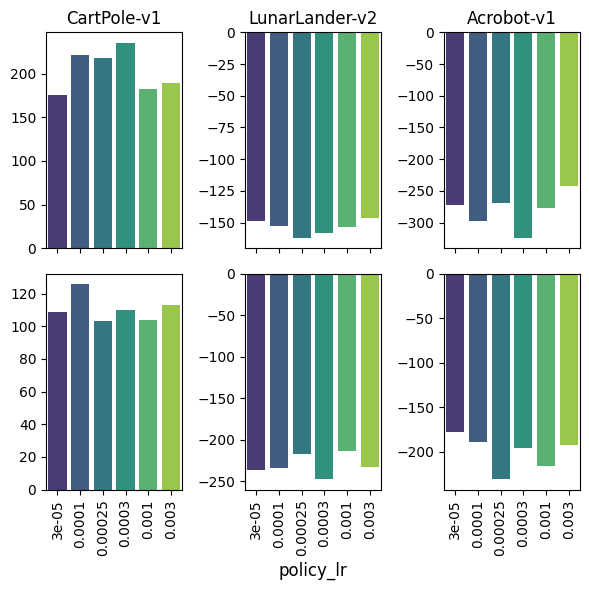

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2632182859.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2632182859.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2632182859.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2632182859.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2632182859.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2632182859.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.

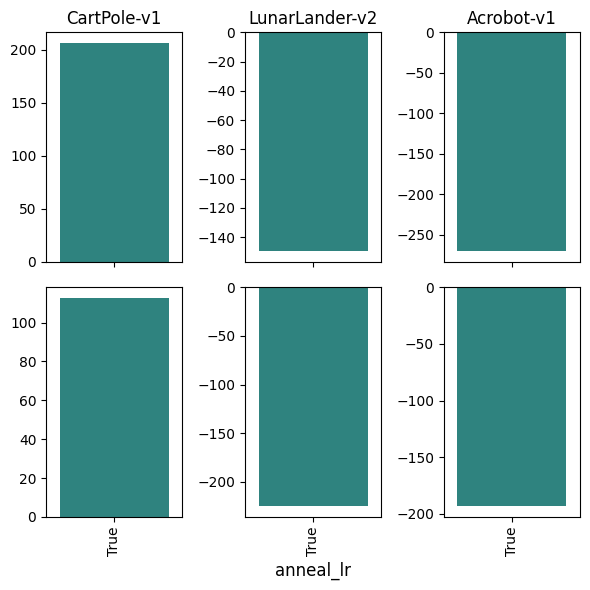

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2632182859.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2632182859.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2632182859.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.

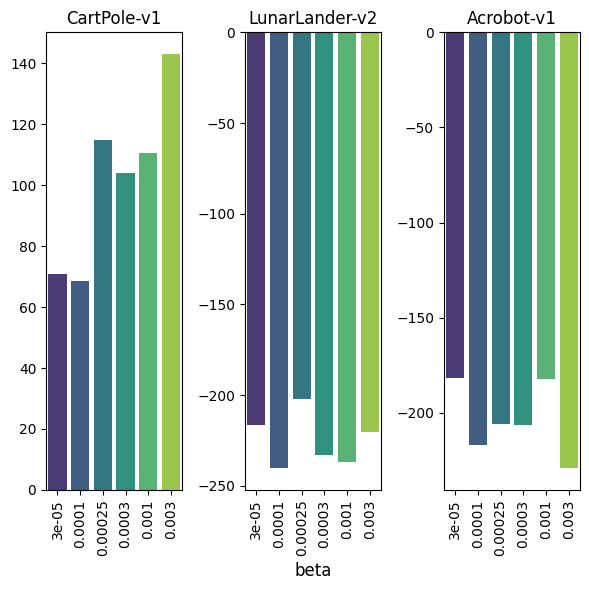

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2632182859.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2632182859.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2632182859.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2632182859.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2632182859.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2632182859.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.

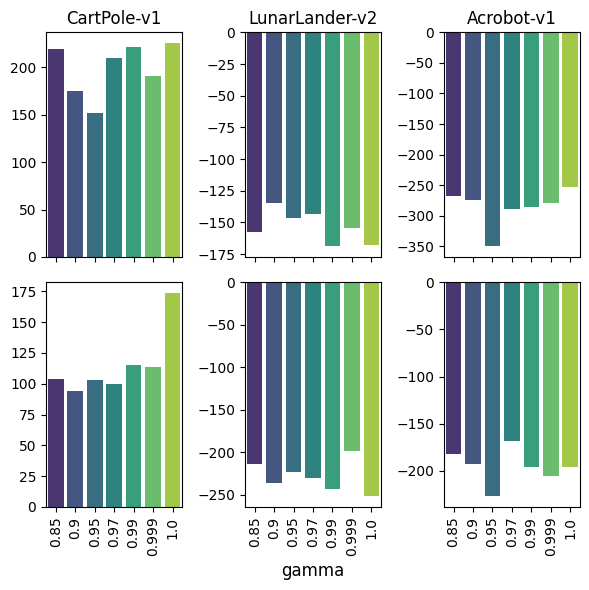

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2632182859.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2632182859.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2632182859.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2632182859.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2632182859.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2632182859.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.

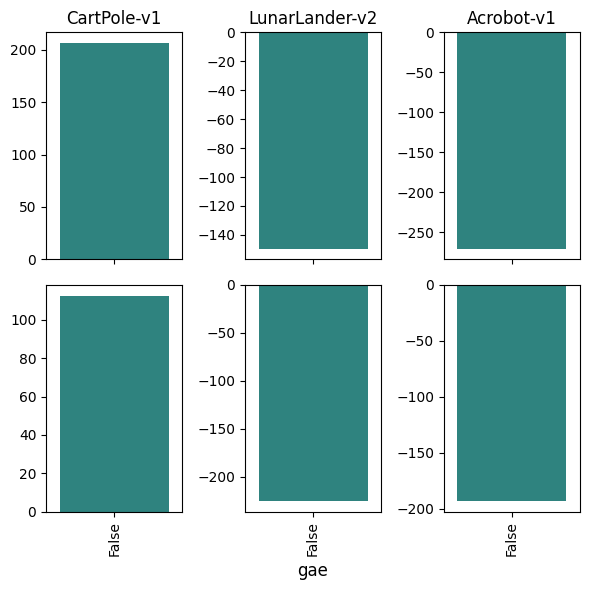

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2632182859.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2632182859.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2632182859.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2632182859.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2632182859.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2632182859.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.

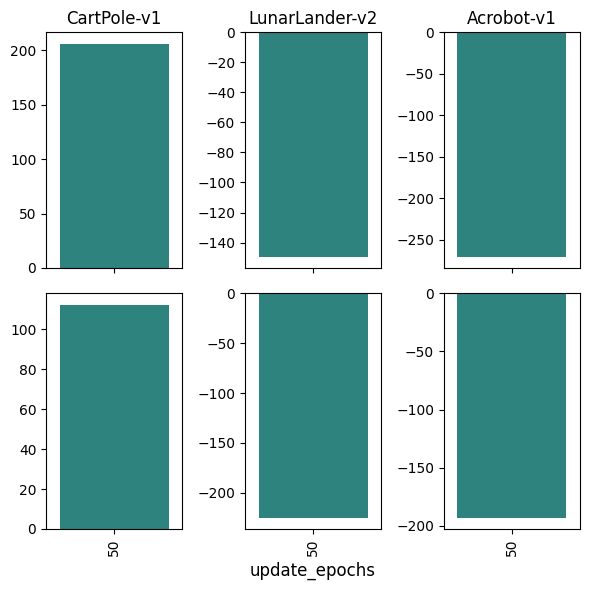

In [434]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plots_dir = "plots"
os.makedirs(plots_dir, exist_ok=True)

data_frames = []

for config in file_configs:
    df = pd.read_csv(config['file'])
    df = process_dataframe(df, config['data_dir'], config['prefix'], config['threshold'])
    data_frames.append({'df': df, 'dir': config['data_dir'], 'prefix': config['prefix'], 'title': config['title']})

parameters = [
    'alpha', 'policy_lr', 'q_lr', 'anneal_lr', 
    'beta', 'parametrized_sampler', 'gamma',
    'num_envs', 'gae', 'total_iterations', 'update_epochs'
]

def get_grid_size(parameter):
    if parameter in ['beta', 'parametrized_sampler','sampler_activation', 'sampler_num_hidden_layers', 'sampler_hidden_size', 'sampler_last_layer_std']:
        return 1, 3
    else:
        return 2, 3

unique_values = {}
for parameter in parameters:
    unique_values[parameter] = sorted(
        pd.concat([df['df'][parameter] for df in data_frames if parameter in df['df'].columns])
        .dropna().unique()
    )


for parameter in parameters:
    rows, cols = get_grid_size(parameter)
    fig, axes = plt.subplots(rows, cols, figsize=(6, 6))

    if rows == 1:
        data_frames_to_plot = data_frames[-(cols):]
    else:
        data_frames_to_plot = data_frames

    order = unique_values[parameter]
    all_elbe = []
    all_saddle = []
    
    for i, data in enumerate(data_frames_to_plot):
        df = data['df']

        if parameter not in df.columns:
            continue

        if df[parameter].dtype == bool and parameter != 'gae':
            df[parameter] = df[parameter].astype(str)
        ax = axes[i // cols, i % (cols)] if rows > 1 else axes[i % (cols)]
        df = df[df['gae']==False]

        parameter_percentile = df.groupby(parameter)['mean_reward'].quantile(0.95).reset_index()
        sns.barplot(ax=ax, data=parameter_percentile, x=parameter , y='mean_reward', palette='viridis')
        ax.tick_params(axis='x', rotation=90)

        ax.set_xlabel('')
        ax.set_ylabel('')
        if i // (cols) != rows-1:
            ax.set_xticklabels([])

        if rows == 1 or i < cols:
            ax.set_title(data['title'])
            
    if rows == 1:
        axes[1].set_xlabel(parameter, fontsize=12)
    else:
        axes[1, 1].set_xlabel(parameter, fontsize=12)
    
    plt.tight_layout()
    plot_filename = os.path.join(plots_dir, f"experiment_6_95th_percentile_{parameter}.png")
    plt.savefig(plot_filename)
    plt.show()
    plt.close()


### Best Runs

Rewards calculated: 0    (160.75130083825854, 254.4259287516276)
1    (86.99539409743416, 118.87774658203124)
2    (75.59050476983423, 110.31666564941406)
3    (123.4974194621712, 197.69590759277344)
4      (88.33121272775998, 91.9880952835083)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0                                (-2000, -2000)
1    (-254.48049041959976, -214.15531412760416)
2                                (-2000, -2000)
3                                (-2000, -2000)
4                                (-2000, -2000)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0    (-388.12669483129525, -423.3333333333333)
1    (-434.9778029123942, -491.73333740234375)
2                               (-2000, -2000)
3                               (-2000, -2000)
4                             (-500.0, -500.0)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0    (127.08574068546295, 145.69407653808594)
1    (39.353689831138674, 16.567901611328125)
2                              (-2000, -2000)
3                              (-2000, -2000)
4     (67.45990294880336, 106.78240712483723)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0    (-356.5002389483982, -347.18675231933594)
1    (-406.0685907469856, -479.16595458984375)
2                               (-2000, -2000)
3      (-518.640281873127, -572.8167588975695)
4    (-205.1354745531839, -194.06468709309897)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Rewards calculated: 0      (-374.7796615708803, -464.2222188313802)
1                 (-434.59488599177257, -500.0)
2                                (-2000, -2000)
3                                (-2000, -2000)
4    (-170.09882071358817, -197.81817626953125)
Name: index, dtype: object


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_df['name'] = name
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/4141283609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Text(0.04, 0.63, 'Reward')

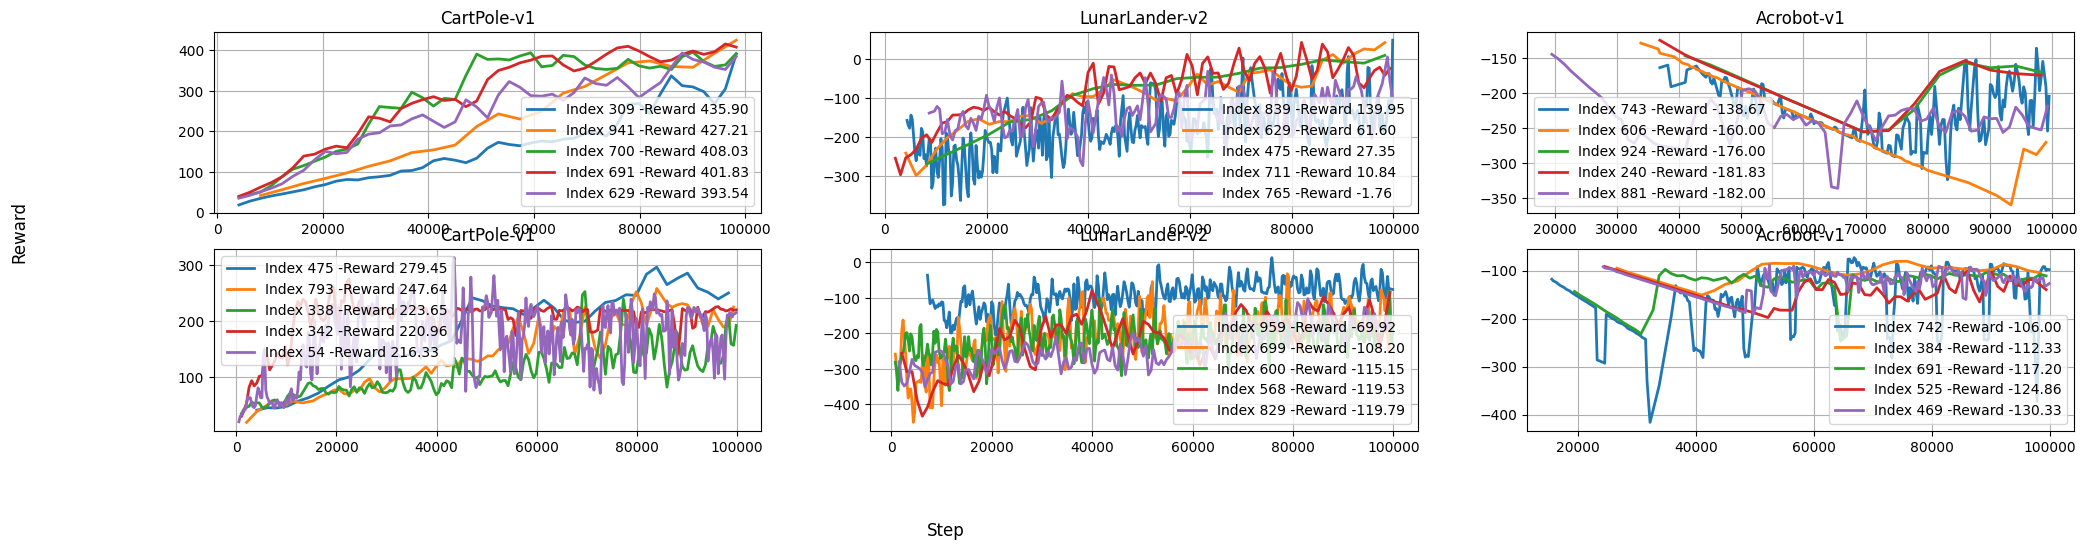

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

In [435]:
fig = plt.figure(figsize=(24, 8)) 
gs = GridSpec(3, 3, height_ratios=[1, 1, 1], width_ratios=[1, 1, 1])

ax_positions = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]
axes = [fig.add_subplot(gs[pos]) for pos in ax_positions]

all_handles = []
all_labels = []

for config, ax in zip(file_configs, axes):
    df, _ = process_file(config['file'], config['data_dir'], config['prefix'], config['threshold'])
    top_5_runs = df.nlargest(5, 'last_reward')

    plt.figure(figsize=(8, 4))

    for _, row in top_5_runs.iterrows():
        path = os.path.join('./' + config['data_dir'], f"{config['prefix']}_{row['index']}.csv")
        if not os.path.exists(path):
            print(f"File not found: {path}")
            continue
        rewards_df = pd.read_csv(path)
        
        average_reward = rewards_df.groupby('Step')['Reward'].mean()
        rolling_average = average_reward.rolling(window=2).mean()
        
        ax.plot(rolling_average.index, rolling_average, label=f'Index {row["index"]} -Reward {row["last_reward"]:.2f}', linewidth=2)
        ax.set_title(config['title'])
        ax.grid(True)
        ax.legend()

fig.text(0.43, 0.25, 'Step', ha='center', fontsize=12)
fig.text(0.04, 0.63, 'Reward', va='center', rotation='vertical', fontsize=12)


# Episodic return Comparison

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/2917236266.py:90: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(left=0.06, right=0.85, top=0.9, bottom=0.1)


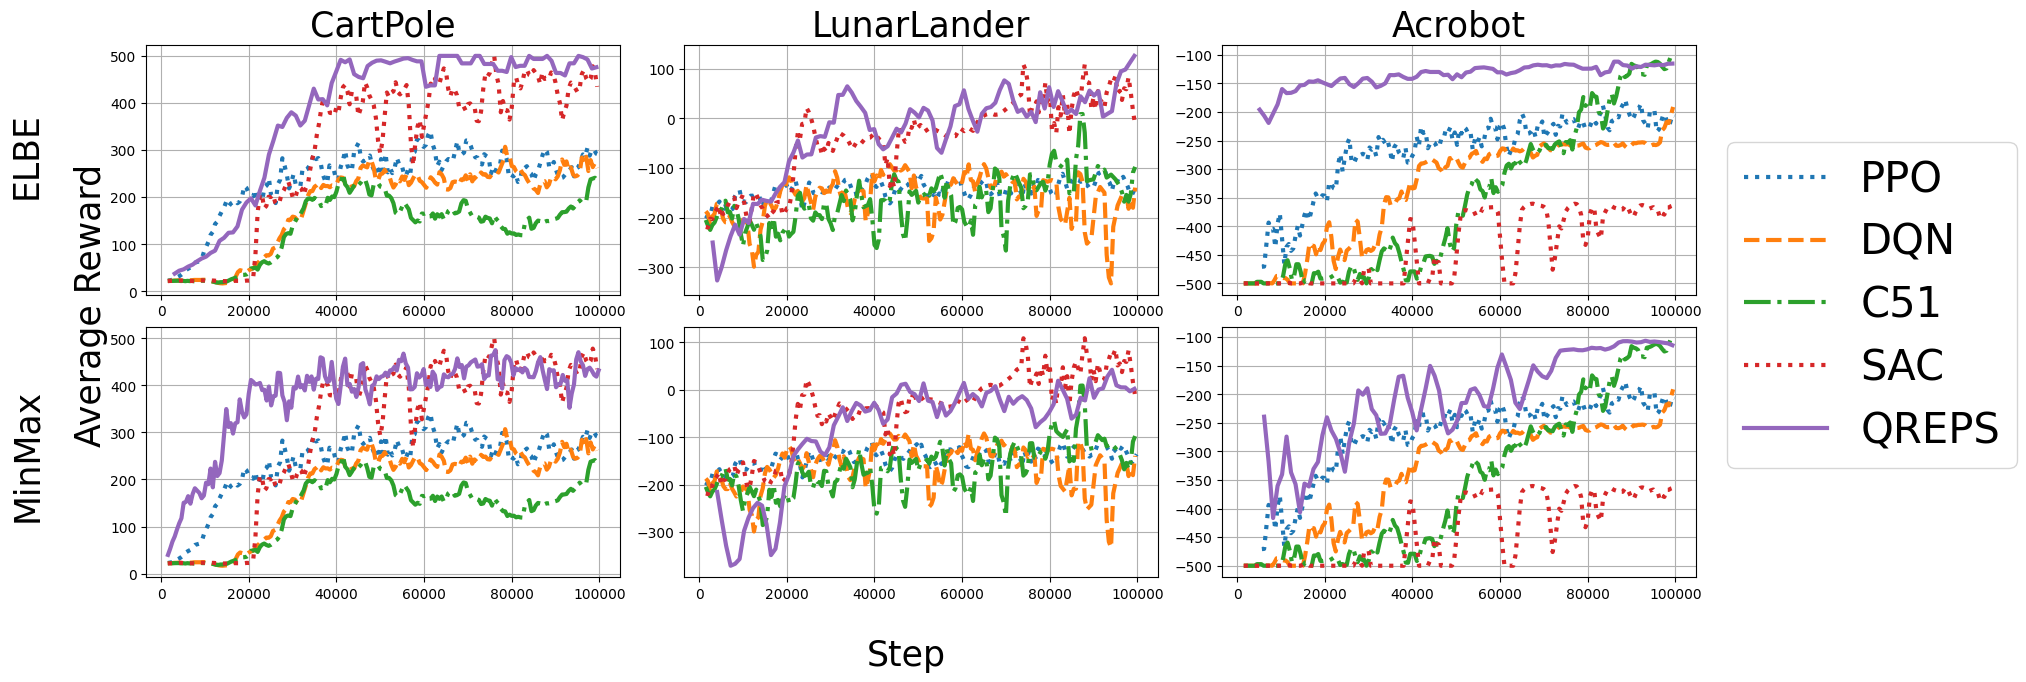

In [476]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the base directories
base_dir = os.getcwd()
external_dir_elbe = '/Users/nicolasvila/workplace/uni/tfg_v2/tests/other/data'
external_dir_saddle = '../../data/minmax/results/exp_1'

# Define file paths
file_paths = {
    "CartPole_ELBE": [
        (base_dir + '/runs_benchmark/average_reward_ppo.csv', 'PPO', ':'),
        (base_dir + '/runs_benchmark/average_reward_dqn.csv', 'DQN', '--'),
        (base_dir + '/runs_benchmark/average_reward_c51.csv', 'C51', '-.'),
        (base_dir + '/runs_benchmark/average_reward_sac.csv', 'SAC', ':'),
        ('/Users/nicolasvila/workplace/uni/tfg_v2/tests/other/data_samples_cartpole_elbe_exp_3/randsearch_samples_cartpole_elbe_exp_3_989.csv', 'QREPS', '-')
    ],
    "CartPole_Saddle": [
        (base_dir + '/runs_benchmark/average_reward_ppo.csv', 'PPO', ':'),
        (base_dir + '/runs_benchmark/average_reward_dqn.csv', 'DQN', '--'),
        (base_dir + '/runs_benchmark/average_reward_c51.csv', 'C51', '-.'),
        (base_dir + '/runs_benchmark/average_reward_sac.csv', 'SAC', ':'),
        (external_dir_saddle + '/randsearch_saddle_cartpole_978.csv', 'QREPS-Saddle', '-')
    ],
    "LunarLander_ELBE": [
        (base_dir + '/runs_benchmark/average_reward_ppo_LunarLander-v2.csv', 'PPO', ':'),
        (base_dir + '/runs_benchmark/average_reward_dqn_LunarLander-v2.csv', 'DQN', '--'),
        (base_dir + '/runs_benchmark/average_reward_c51_LunarLander-v2.csv', 'C51', '-.'),
        (base_dir + '/runs_benchmark/average_reward_sac_LunarLander-v2.csv', 'SAC', ':'),
        ('../../data/elbe/lunar_lander/data_samples_lunar_elbe_exp_2/randsearch_samples_lunar_elbe_exp_2_296.csv', 'QREPS', '-')
    ],
    "LunarLander_Saddle": [
        (base_dir + '/runs_benchmark/average_reward_ppo_LunarLander-v2.csv', 'PPO', ':'),
        (base_dir + '/runs_benchmark/average_reward_dqn_LunarLander-v2.csv', 'DQN', '--'),
        (base_dir + '/runs_benchmark/average_reward_c51_LunarLander-v2.csv', 'C51', '-.'),
        (base_dir + '/runs_benchmark/average_reward_sac_LunarLander-v2.csv', 'SAC', ':'),
        ('../../data/elbe/lunar_lander/data_samples_lunar_saddle_exp_5/randsearch_samples_lunar_saddle_exp_5_782.csv', 'QREPS-Saddle', '-')
    ],
    "Acrobot_ELBE": [
        (base_dir + '/runs_benchmark/average_reward_ppo_Acrobot.csv', 'PPO', ':'),
        (base_dir + '/runs_benchmark/average_reward_dqn_Acrobot.csv', 'DQN', '--'),
        (base_dir + '/runs_benchmark/average_reward_c51_Acrobot.csv', 'C51', '-.'),
        (base_dir + '/runs_benchmark/average_reward_sac_Acrobot-v1.csv', 'SAC', ':'),
        ('../../data/elbe/lunar_lander/data_samples_acro_elbe_exp_2/randsearch_samples_acro_elbe_exp_2_763.csv', 'QREPS', '-')
    ],
    "Acrobot_Saddle": [
        (base_dir + '/runs_benchmark/average_reward_ppo_Acrobot.csv', 'PPO', ':'),
        (base_dir + '/runs_benchmark/average_reward_dqn_Acrobot.csv', 'DQN', '--'),
        (base_dir + '/runs_benchmark/average_reward_c51_Acrobot.csv', 'C51', '-.'),
        (base_dir + '/runs_benchmark/average_reward_sac_Acrobot-v1.csv', 'SAC', ':'),
        ('../../data/elbe/lunar_lander/data_samples_acro_saddle_exp_5/randsearch_samples_acro_saddle_exp_5_9.csv', 'QREPS-Saddle', '-')
    ]
}

# Create a figure with subplots
fig, axs = plt.subplots(2, 3, figsize=(16, 6), constrained_layout=True)

# Titles for the subplots
titles = ['CartPole', 'LunarLander', 'Acrobot']
window_size = 3

# Plot data
for i, env in enumerate(['CartPole', 'LunarLander', 'Acrobot']):
    for j, method in enumerate(['ELBE', 'Saddle']):
        key = f"{env}_{method}"
        if key in file_paths:
            ax = axs[j, i]
            for path, label, linestyle in file_paths[key]:
                if os.path.exists(path):
                    data = pd.read_csv(path)
                    smoothed_reward = data['Reward'].rolling(window=window_size).mean()
                    ax.plot(data['Step'], smoothed_reward, label=label, linestyle=linestyle, linewidth=3)
            ax.set_title(titles[i] if j == 0 else "", fontsize=25)
            ax.grid(True)

# Set common labels and titles
fig.text(0.5, -0.1, 'Step', ha='center', fontsize=25)
fig.text(-0.02, 0.5, 'Average Reward', va='center', rotation='vertical', fontsize=25)

# Group titles for ELBE and SPO
fig.text(-0.06, 0.75, 'ELBE', va='center', rotation='vertical', fontsize=25)
fig.text(-0.06, 0.25, 'MinMax', va='center', rotation='vertical', fontsize=25)

# Add a legend outside the subplots
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=30)

# Adjust layout to make room for the legend
plt.subplots_adjust(left=0.06, right=0.85, top=0.9, bottom=0.1)
plt.show()



# Dual

### Results: Average rewards accross 3 seeds

In [437]:
import os
import pandas as pd
import matplotlib.pyplot as plt

norm = {"0.9" : 0.04782969, 
        "0.95": 0.03491686480468752,
        "0.99": 0.009320653479069907}


def normalize_runs(config_csv_path, data_folder_path):
    config_df = pd.read_csv(config_csv_path)

    for index, row in config_df.iterrows():
        search_index = index + 1
        run_folder_name = f'{data_folder_path}/dual_{search_index}.csv'
        if os.path.exists(run_folder_name):
            rewards_df = pd.read_csv(run_folder_name)
            max = norm[str(row.df)]
            min = 0
            rewards_df['Reward'] = rewards_df['Reward'].apply(lambda x: (x - min) / (max - min))
            save_dir = f'{data_folder_path}_norm/'
            if not os.path.exists(save_dir):
                os.makedirs(save_dir)
            rewards_df.to_csv(save_dir+f'dual_{search_index}.csv', index=False)
        else:
            print(f"File not found: {run_folder_name}")

In [438]:
def plot_top_csv_files_by_reward(configs_path, csv_folder_path, top_n=5):
    csv_files = [file for file in os.listdir(csv_folder_path) if file.endswith('.csv')]    
    file_avg_rewards = []

    for file in csv_files:
        file_path = os.path.join(csv_folder_path, file)
        
        df = pd.read_csv(file_path)
        
        avg_reward = df['Reward'].mean()
        
        file_avg_rewards.append((file_path, avg_reward))
    
    file_avg_rewards.sort(key=lambda x: x[1], reverse=True)
    
    for file_path, avg_reward in file_avg_rewards[:top_n]:
        df = pd.read_csv(file_path)
        
        plt.plot(df['Step'], df['Reward'], label=os.path.basename(file_path))
    
    plt.title('Top {} RUNS'.format(top_n))
    plt.xlabel('Step')
    plt.ylabel('Reward')
    plt.grid(True)
    plt.legend()
    
    plt.show()



In [357]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_percentiles(configs_path, csv_folder_path, algo):
    # Load the configuration file
    df_config = pd.read_csv(configs_path)
    
    df_config['mean_reward'] = 0
    
    for i, row in df_config.iterrows():
        index = row['index']
        file_name = f"dual_{index}.csv"  # Construct the file name
        file_path = os.path.join(csv_folder_path, file_name)
        
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            avg_reward = df['Reward'].mean()
        else:
            avg_reward = 0
        
        # Update the mean_reward column
        df_config.at[i, 'mean_reward'] = avg_reward
    
    # Plot the 95th percentile of the mean reward for each parameter
    plots_dir = "plots"
    os.makedirs(plots_dir, exist_ok=True)

    parameters = [col for col in df_config.columns if col not in ['index', 'mean_reward']]

    for parameter in parameters:
        parameter_percentile = df_config.groupby(parameter)['mean_reward'].quantile(0.95).reset_index()
        # Determine the top 5% threshold
        top_5_threshold = df_config['mean_reward'].quantile(0.95)
        top_5_runs = df_config[df_config['mean_reward'] >= top_5_threshold]
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 6))

        # Bar plot of the 95th percentile of mean reward
        sns.barplot(ax=ax1, data=parameter_percentile, x=parameter, y='mean_reward', palette='viridis')
        ax1.set_xticks(ax1.get_xticks())
        ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
        ax1.set_title(f'')
        ax1.set_ylabel('')
        ax1.set_xlabel('')

        # Count plot of the parameter in the top 5% runs
        sns.countplot(ax=ax2, data=top_5_runs, x=parameter, palette='viridis', stat='proportion')
        ax2.set_xticks(ax2.get_xticks())
        ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
        ax2.set_title(f'')
        ax2.set_ylabel('')
        ax2.set_xlabel('')

        plt.text(0.5, 0.015, f"{parameter}", ha='center', va='center', transform=fig.transFigure, fontsize=12)
        plt.tight_layout()
        plot_filename = os.path.join(plots_dir, f"95th_percentile_{parameter}_{algo}.png")
        plt.savefig(plot_filename)
        plt.show()
        plt.close()

In [358]:
configs_path = '/Users/nicolasvila/workplace/uni/tfg_v2/tests/algos/policy_eval/samples_pol_eval_stochastic.csv'
data_folder_path = '/Users/nicolasvila/workplace/uni/tfg_v2/tests/other/data_pol_eval_stochastic'

configs_path_qreps = '/Users/nicolasvila/workplace/uni/tfg_v2/tests/algos/policy_eval/samples_pol_eval_stochastic_qreps.csv'
data_folder_path_qreps = '/Users/nicolasvila/workplace/uni/tfg_v2/tests/other/data_pol_eval_stochastic_qreps'

normalize_runs(configs_path, data_folder_path)
normalize_runs(configs_path_qreps, data_folder_path_qreps)

File not found: /Users/nicolasvila/workplace/uni/tfg_v2/tests/other/data_pol_eval_stochastic/dual_3.csv
File not found: /Users/nicolasvila/workplace/uni/tfg_v2/tests/other/data_pol_eval_stochastic/dual_5.csv
File not found: /Users/nicolasvila/workplace/uni/tfg_v2/tests/other/data_pol_eval_stochastic/dual_11.csv
File not found: /Users/nicolasvila/workplace/uni/tfg_v2/tests/other/data_pol_eval_stochastic/dual_12.csv
File not found: /Users/nicolasvila/workplace/uni/tfg_v2/tests/other/data_pol_eval_stochastic/dual_14.csv
File not found: /Users/nicolasvila/workplace/uni/tfg_v2/tests/other/data_pol_eval_stochastic/dual_16.csv
File not found: /Users/nicolasvila/workplace/uni/tfg_v2/tests/other/data_pol_eval_stochastic/dual_19.csv
File not found: /Users/nicolasvila/workplace/uni/tfg_v2/tests/other/data_pol_eval_stochastic/dual_24.csv
File not found: /Users/nicolasvila/workplace/uni/tfg_v2/tests/other/data_pol_eval_stochastic/dual_32.csv
File not found: /Users/nicolasvila/workplace/uni/tfg_v2/t

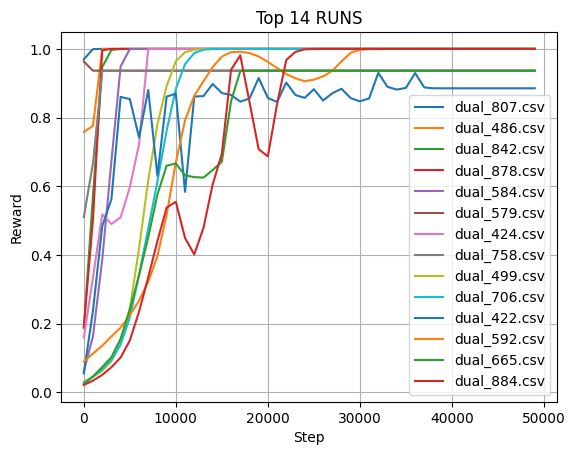

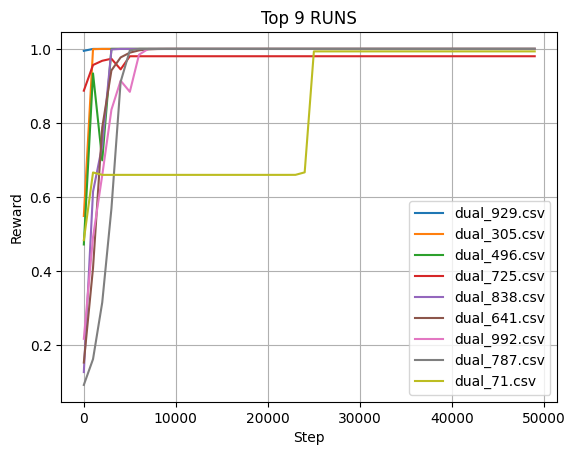

In [359]:
data_folder_path = '/Users/nicolasvila/workplace/uni/tfg_v2/tests/other/data_pol_eval_stochastic_norm'
data_folder_path_qreps = '/Users/nicolasvila/workplace/uni/tfg_v2/tests/other/data_pol_eval_stochastic_qreps_norm'
plot_top_csv_files_by_reward(configs_path, data_folder_path, top_n=14)
plot_top_csv_files_by_reward(configs_path_qreps, data_folder_path_qreps, top_n=9)

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax1, data=parameter_percentile, x=parameter, y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax2, data=top_5_runs, x=parameter, palette='viridis', stat='proportion')


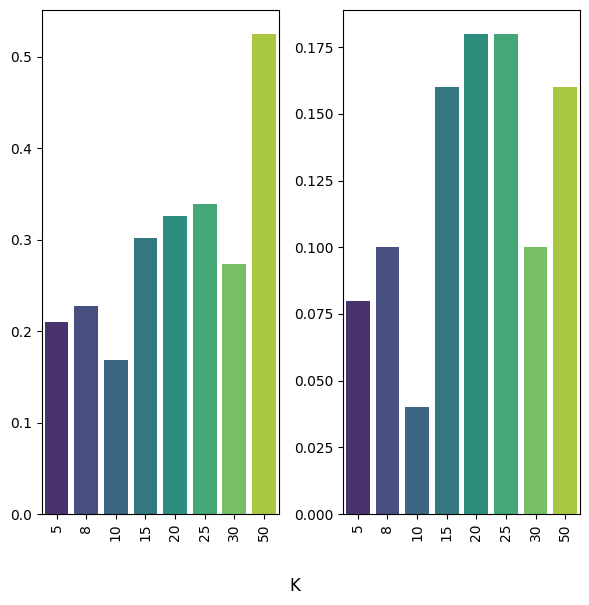

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax1, data=parameter_percentile, x=parameter, y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax2, data=top_5_runs, x=parameter, palette='viridis', stat='proportion')


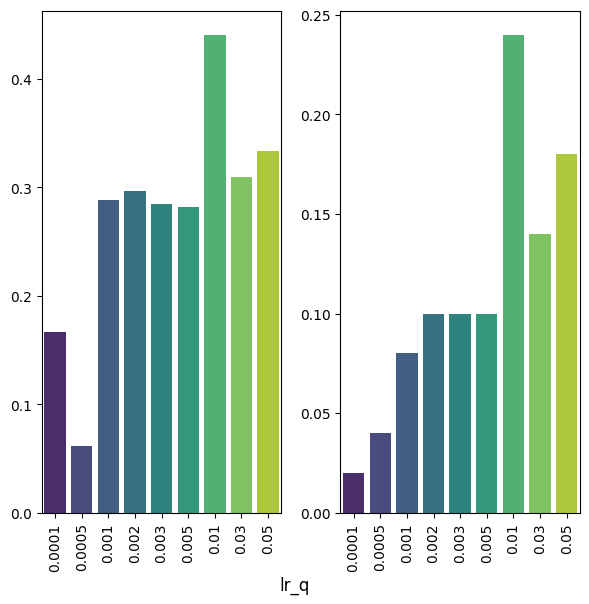

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax1, data=parameter_percentile, x=parameter, y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax2, data=top_5_runs, x=parameter, palette='viridis', stat='proportion')


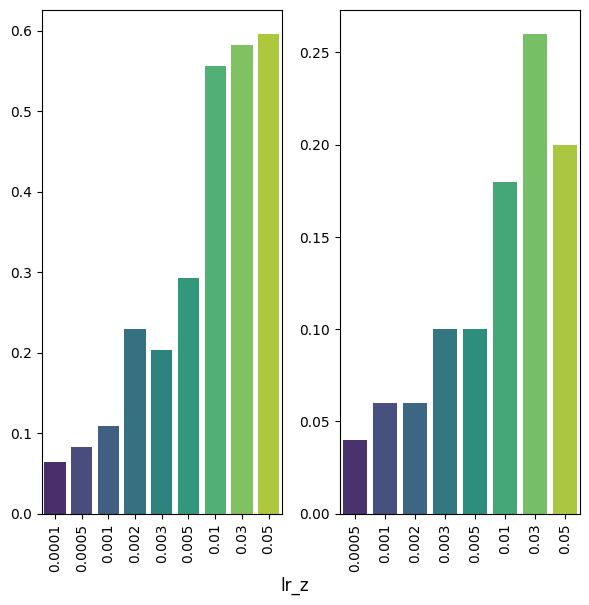

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax1, data=parameter_percentile, x=parameter, y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax2, data=top_5_runs, x=parameter, palette='viridis', stat='proportion')


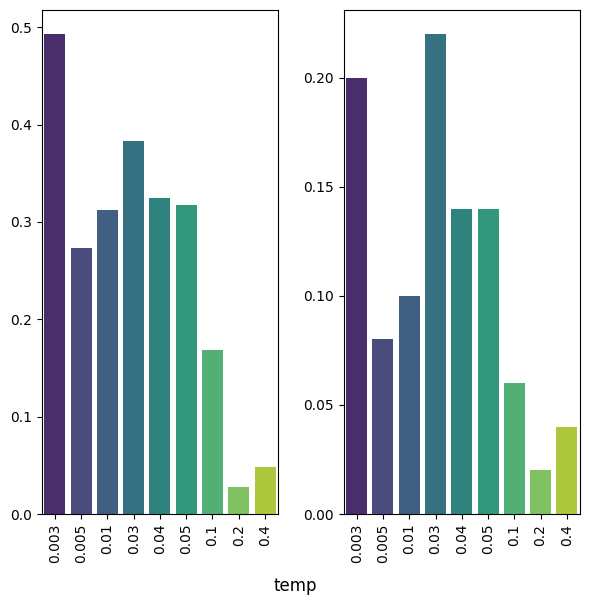

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax1, data=parameter_percentile, x=parameter, y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax2, data=top_5_runs, x=parameter, palette='viridis', stat='proportion')


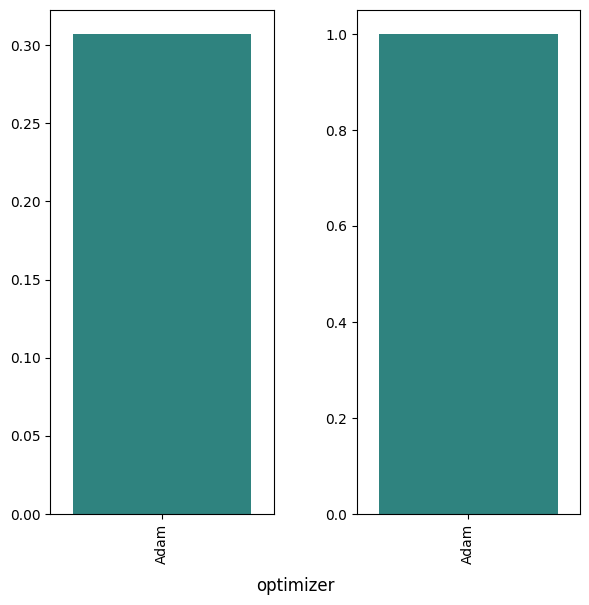

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax1, data=parameter_percentile, x=parameter, y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax2, data=top_5_runs, x=parameter, palette='viridis', stat='proportion')


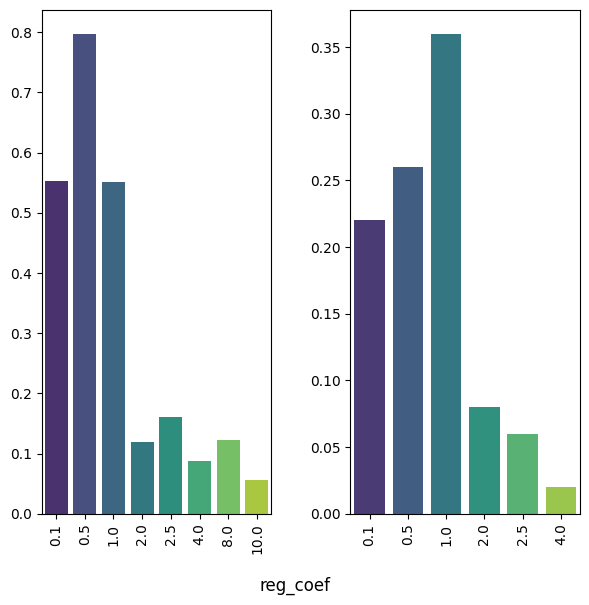

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax1, data=parameter_percentile, x=parameter, y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax2, data=top_5_runs, x=parameter, palette='viridis', stat='proportion')


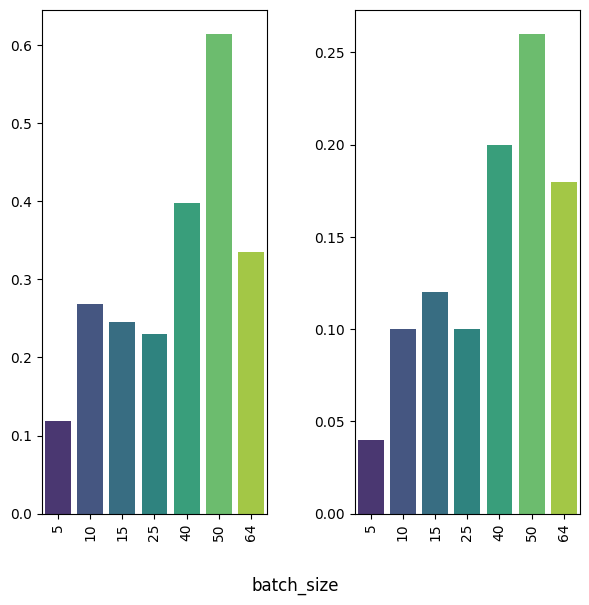

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax1, data=parameter_percentile, x=parameter, y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax2, data=top_5_runs, x=parameter, palette='viridis', stat='proportion')


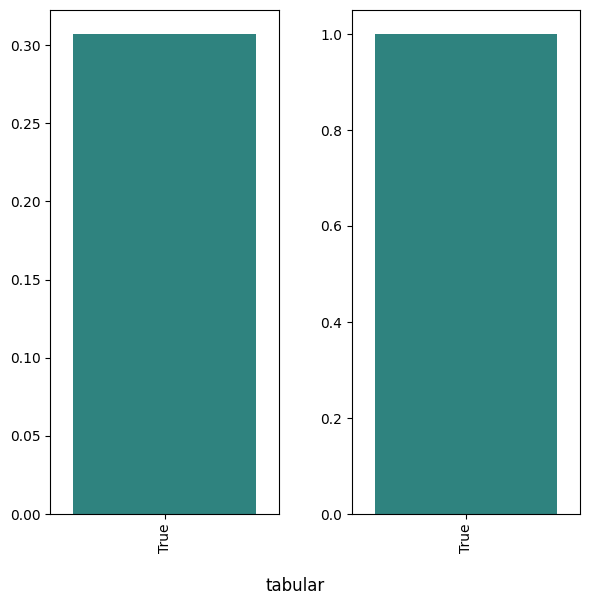

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax1, data=parameter_percentile, x=parameter, y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax2, data=top_5_runs, x=parameter, palette='viridis', stat='proportion')


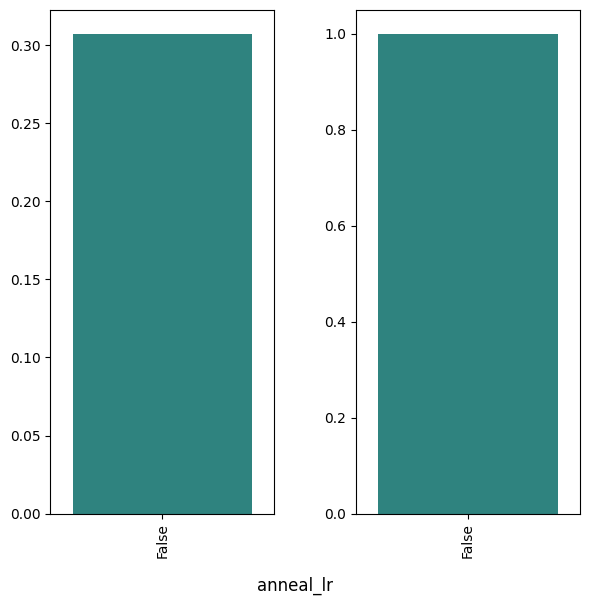

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax1, data=parameter_percentile, x=parameter, y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax2, data=top_5_runs, x=parameter, palette='viridis', stat='proportion')


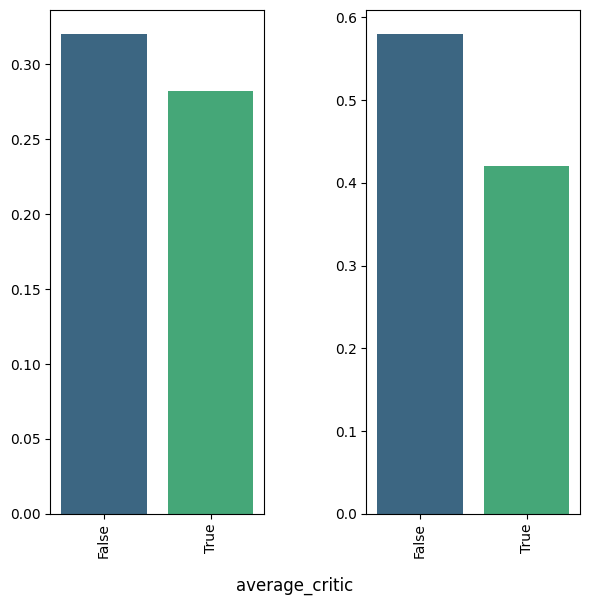

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax1, data=parameter_percentile, x=parameter, y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax2, data=top_5_runs, x=parameter, palette='viridis', stat='proportion')


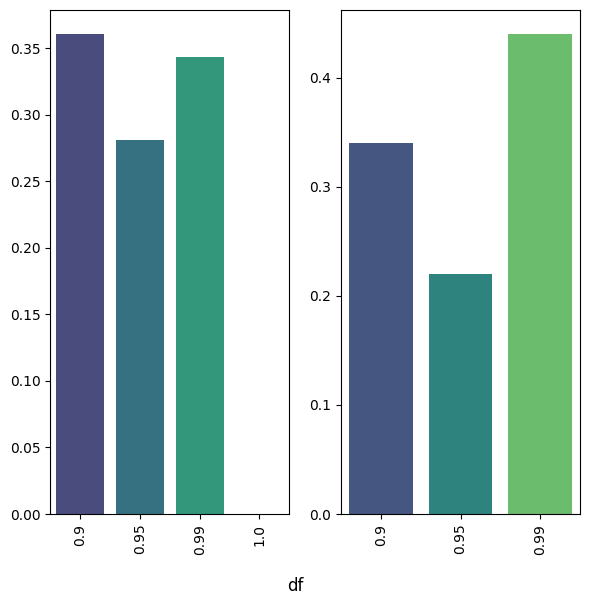

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax1, data=parameter_percentile, x=parameter, y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax2, data=top_5_runs, x=parameter, palette='viridis', stat='proportion')


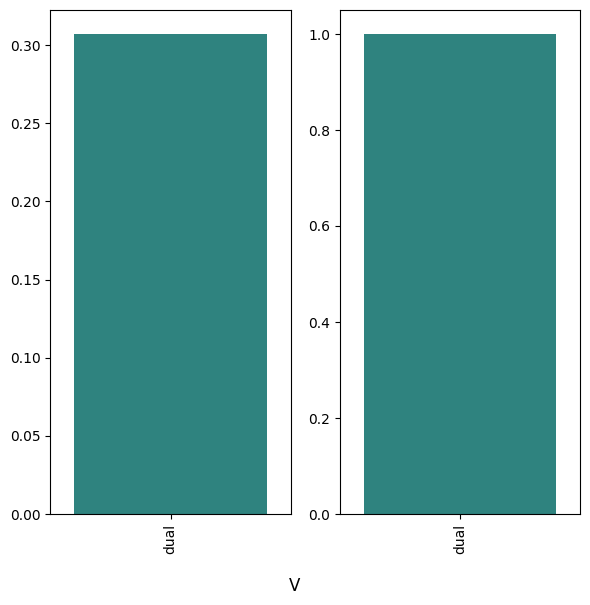

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax1, data=parameter_percentile, x=parameter, y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax2, data=top_5_runs, x=parameter, palette='viridis', stat='proportion')


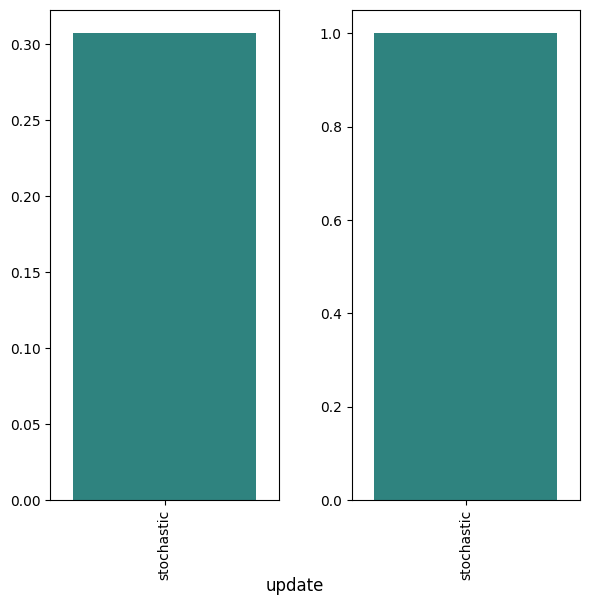

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax1, data=parameter_percentile, x=parameter, y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax2, data=top_5_runs, x=parameter, palette='viridis', stat='proportion')


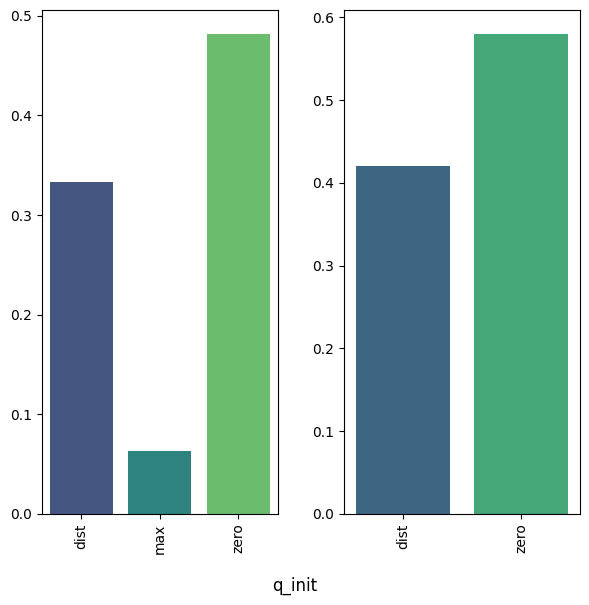

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax1, data=parameter_percentile, x=parameter, y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax2, data=top_5_runs, x=parameter, palette='viridis', stat='proportion')


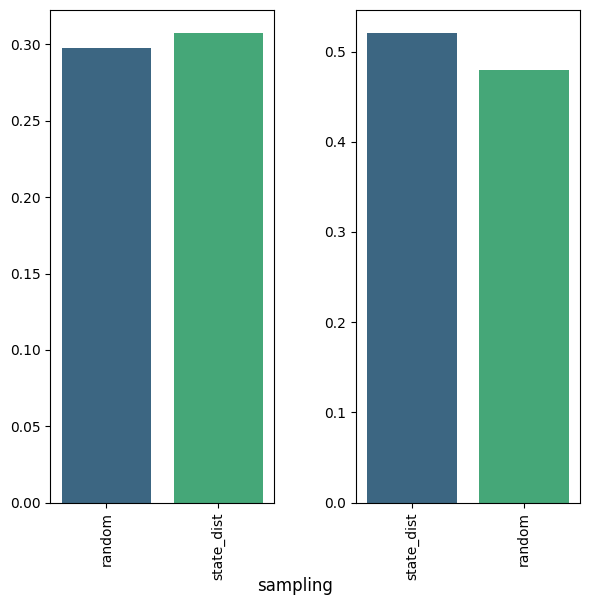

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax1, data=parameter_percentile, x=parameter, y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax2, data=top_5_runs, x=parameter, palette='viridis', stat='proportion')


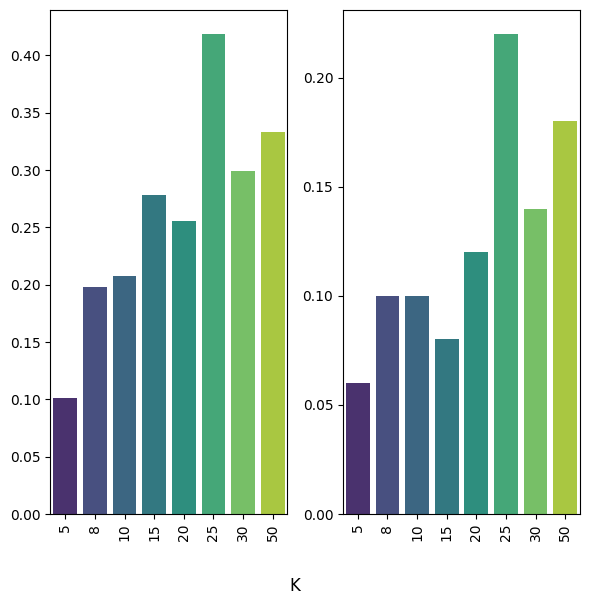

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax1, data=parameter_percentile, x=parameter, y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax2, data=top_5_runs, x=parameter, palette='viridis', stat='proportion')


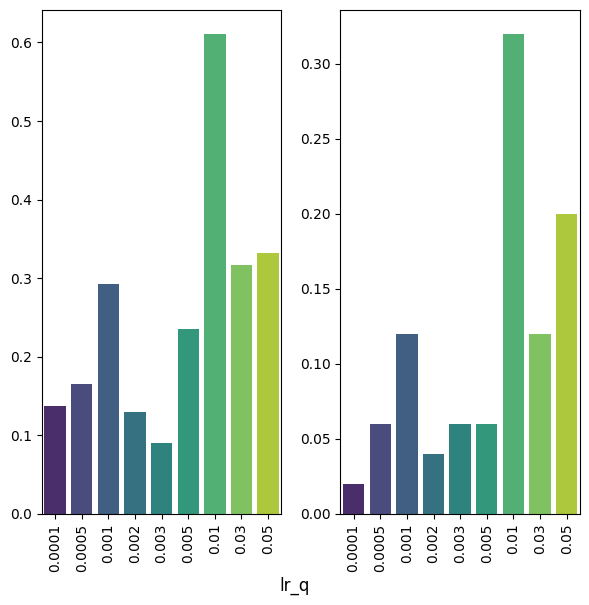

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax1, data=parameter_percentile, x=parameter, y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax2, data=top_5_runs, x=parameter, palette='viridis', stat='proportion')


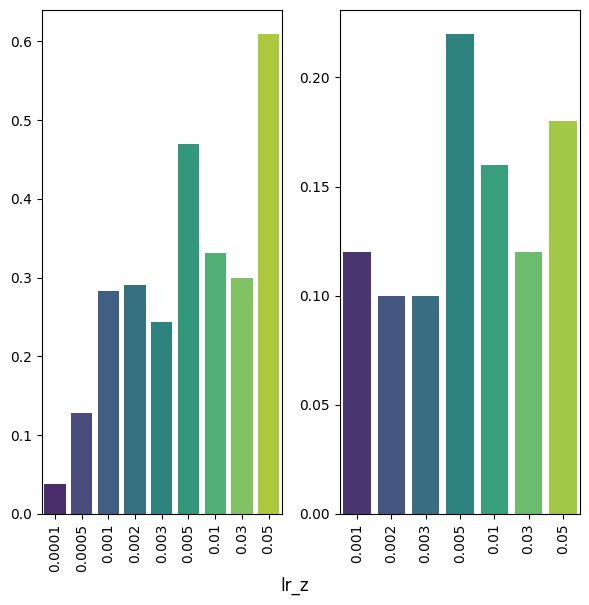

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax1, data=parameter_percentile, x=parameter, y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax2, data=top_5_runs, x=parameter, palette='viridis', stat='proportion')


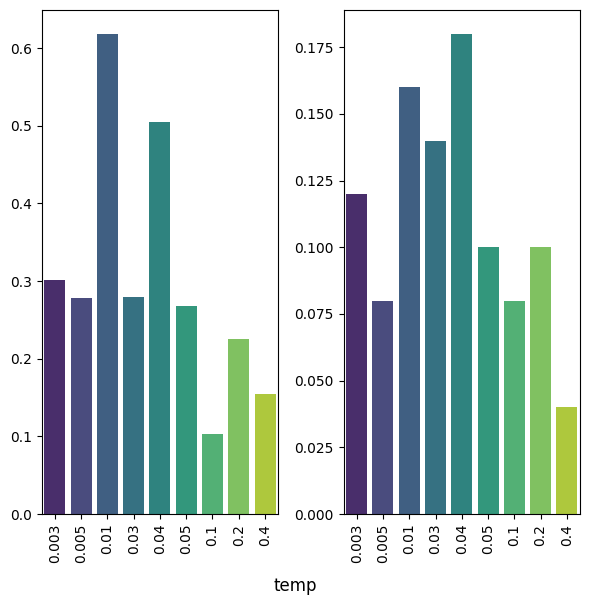

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax1, data=parameter_percentile, x=parameter, y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax2, data=top_5_runs, x=parameter, palette='viridis', stat='proportion')


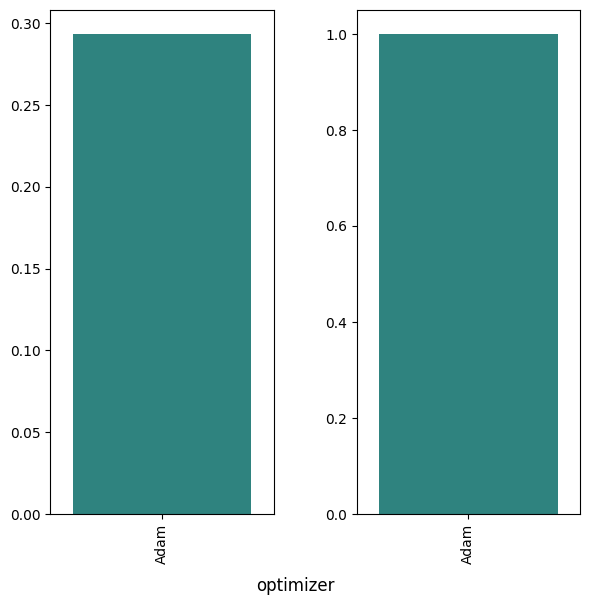

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax1, data=parameter_percentile, x=parameter, y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax2, data=top_5_runs, x=parameter, palette='viridis', stat='proportion')


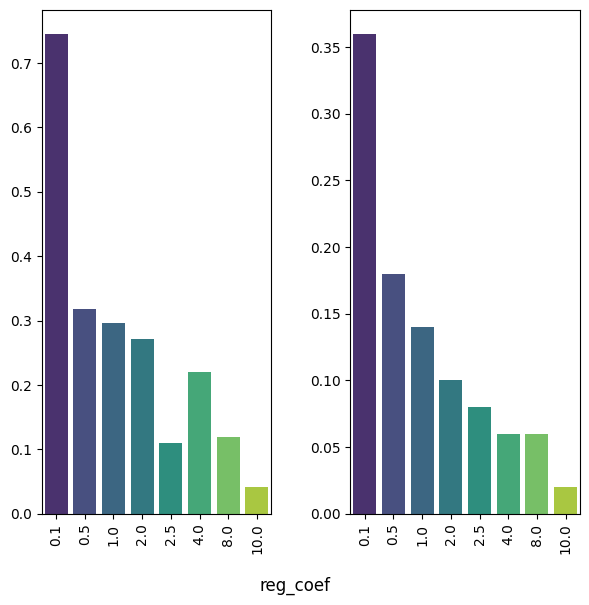

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax1, data=parameter_percentile, x=parameter, y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax2, data=top_5_runs, x=parameter, palette='viridis', stat='proportion')


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax1, data=parameter_percentile, x=parameter, y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax2, data=top_5_runs, x=parameter, palette='viridis', stat='proportion')


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax1, data=parameter_percentile, x=parameter, y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax2, data=top_5_runs, x=parameter, palette='viridis', stat='proportion')


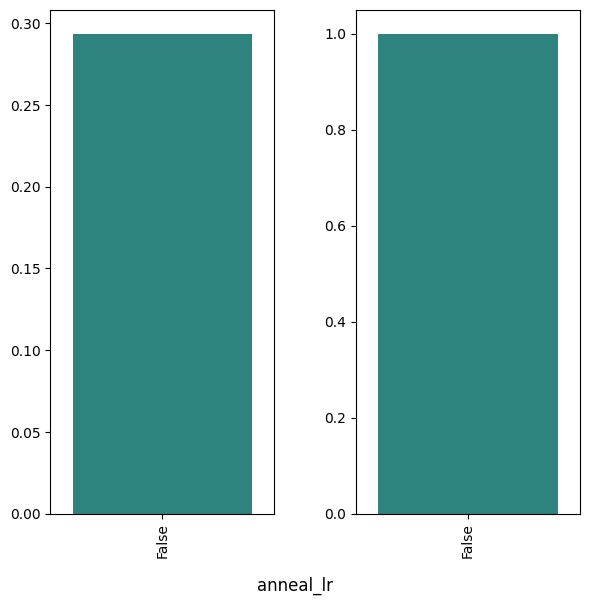

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax1, data=parameter_percentile, x=parameter, y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax2, data=top_5_runs, x=parameter, palette='viridis', stat='proportion')


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax1, data=parameter_percentile, x=parameter, y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax2, data=top_5_runs, x=parameter, palette='viridis', stat='proportion')


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax1, data=parameter_percentile, x=parameter, y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax2, data=top_5_runs, x=parameter, palette='viridis', stat='proportion')


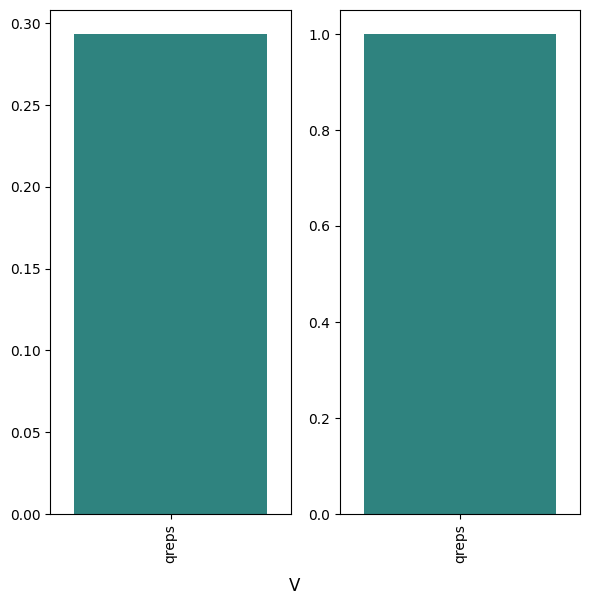

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax1, data=parameter_percentile, x=parameter, y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax2, data=top_5_runs, x=parameter, palette='viridis', stat='proportion')


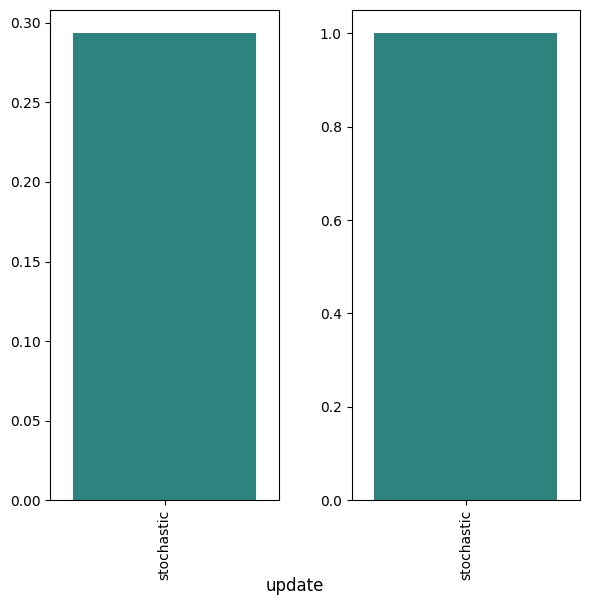

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax1, data=parameter_percentile, x=parameter, y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax2, data=top_5_runs, x=parameter, palette='viridis', stat='proportion')


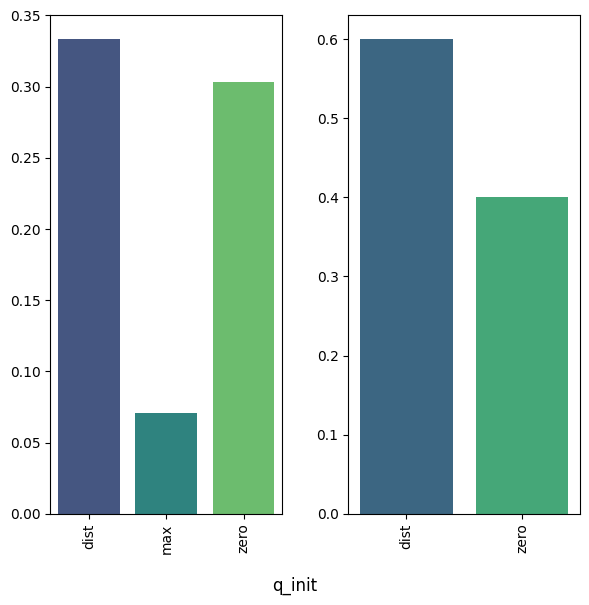

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax1, data=parameter_percentile, x=parameter, y='mean_reward', palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_97867/510953278.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax2, data=top_5_runs, x=parameter, palette='viridis', stat='proportion')


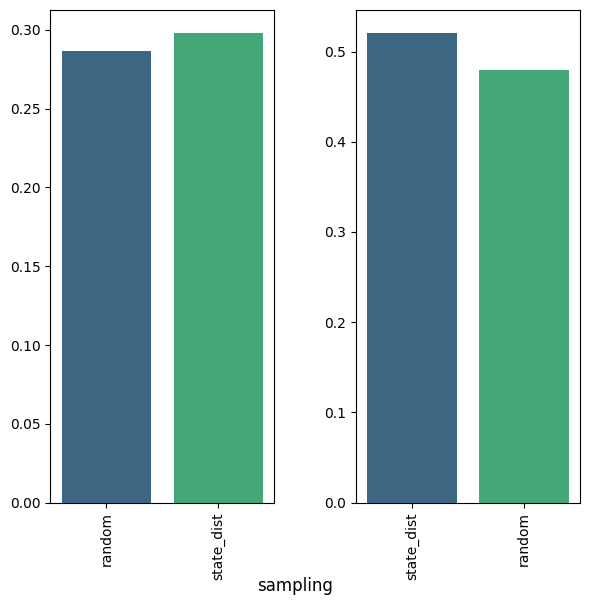

In [360]:
plot_percentiles(configs_path, data_folder_path, algo='dual')
plot_percentiles(configs_path_qreps, data_folder_path_qreps, algo='qreps')